In [1]:
from permutated_CNN.model.ResNet_structure import *
from permutated_CNN.model.CNN_structure import *
## Pytorch Version
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd
import os
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Function

In [2]:
batch_size = 8
input_shape = (1,100,200)
num_outputs = 10

network_name = ["line", "two_triangles", "star", "full_connected"]
table_columns = ['beta_12', 'beta_13', 'beta_14', 'beta_15', 'beta_23', 'beta_24', 'beta_25', 'beta_34', 'beta_35', 'beta_45']
network_all_types = ['line', 'star', 'two_triangles', 'fully_connected'] 

In [3]:
X_test = np.load(f'/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/pure_uniform_4million/49_random_tree_gene_image.npy')
y_test = pd.read_csv(f'/media/eeepc/3866FF5566FF127C/uniform_datta/uniform_random_tree_5_genes_4000000_records_2024_02_15_01_30_28/rates/49_concatenated_rates.csv')
# print(y_test.value_counts())
y_test = y_test.iloc[:, 10:].values

# # Get the number of columns in the second dimension
# num_columns = X_test.shape[1]

# # Create a random permutation of column indices
# permuted_indices = np.random.permutation(num_columns)

# # Use the permutation to shuffle the columns of the 3D matrix along axis 1
# shuffled_matrix_3d = np.take_along_axis(X_test, permuted_indices[None, :, None], axis=1)

# X_test = shuffled_matrix_3d



X_test = X_test[:, None, :, :]

test_dataset = RegressionDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [68]:
prediction_list = []
truth_list = []

test_loss = 0

model.eval()
with torch.no_grad():
    for test_inputs, test_targets in test_dataloader:
        # Transfer validation data to GPU
        test_inputs = test_inputs.to(device)
        prediction_tf = model.forward(test_inputs)
        test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
        predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
        prediction_list.append(predictions)
        truth_list.append(pd.DataFrame(test_targets.numpy()))
        

predictions = pd.concat(prediction_list, axis=0)
predictions.columns = table_columns
truth = pd.concat(truth_list, axis=0)
truth.columns = table_columns

test_loss = test_loss / len(test_dataloader)

In [69]:
np.sqrt(test_loss)

0.25467115198657997

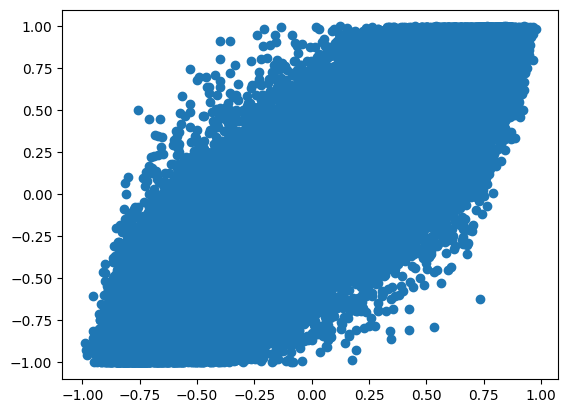

In [11]:
plt.plot(predictions['beta_12'], truth['beta_12'], 'o')

In [70]:
melt_truth = pd.melt(truth)
melt_truth.drop('variable', axis=1, inplace=True)
melt_truth.columns = ['truth']
melt_predictions = pd.melt(predictions)
melt_predictions.drop('variable', axis=1, inplace=True)
melt_predictions.columns = ['predictions']
total_melt = pd.concat([melt_truth, melt_predictions], axis=1)

In [71]:
# total_melt.loc[total_melt['truth'] == round(i,2) ]
total_melt['error'] = round(np.sqrt(
    (total_melt['truth'] - total_melt['predictions'])**2)
    ,2)

total_melt['truth'] = round(total_melt['truth'],2)

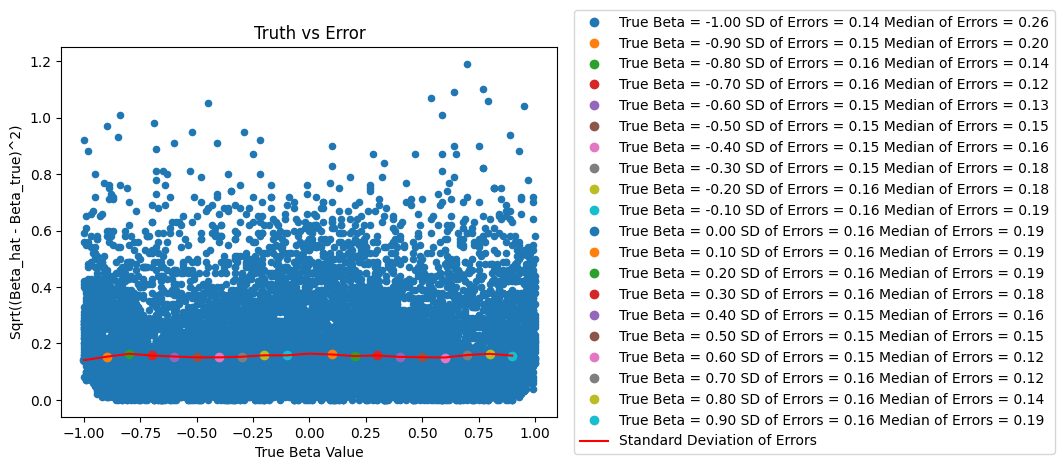

In [75]:
total_melt.iloc[:10000,].plot.scatter(x='truth', y='error')
# 

# sns.regplot(data=total_melt, x="truth", y="error", x_bins=np.arange(-1, 1, 10), order=2)

# sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", robust=True)
# sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", x_bins=np.arange(-1, 1, 200), order=2, color= 'r')

x_axis  = np.linspace(-1, 1, 20)
x = []
y = []

y_median = []


for i in [round(x * 0.1, 1) for x in range(-10, 10)]:
    # print(i, "%" , total_melt.loc[total_melt['truth'] == round(i,2) ].error.mean())
    x.append(i)
    y.append(total_melt.loc[total_melt['truth'] == round(i,2) ].error.std())
    plt.plot(i, total_melt.loc[total_melt['truth'] == round(i,2) ].error.std(), 'o', label = 
             f"True Beta = {round(i,1):.2f} SD of Errors = {total_melt.loc[total_melt['truth'] == round(i,2)].error.std():.2f} Median of Errors = {total_melt.loc[total_melt['truth'] == round(i,2)].error.median():.2f}")
    # sns.boxplot(total_melt.loc[total_melt['truth'] == round(i,2)].error)
plt.plot(x, y, 'r', label = 'Standard Deviation of Errors')
plt.legend()

plt.xlabel('True Beta Value')
plt.ylabel('Sqrt((Beta_hat - Beta_true)^2)')
plt.title(f'Truth vs Error')
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

# plt.yticks(np.arange(0, 1.01, step=0.05))
# plt.xticks(np.arange(0, 1.01, step=0.05))

# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()


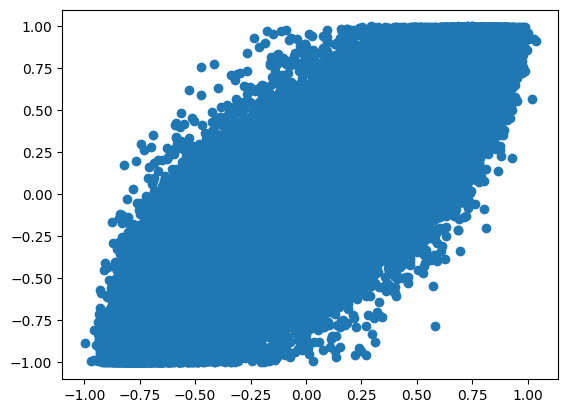

In [9]:
plt.plot(predictions.iloc[:, 1], truth.iloc[:, 1], 'o')

In [12]:
my_array = np.arange(1, 101, 1)

In [29]:
from scipy.stats import norm
# Calculate the 0.25, 0.5, and 0.75 quantiles for a standard normal distribution
q25 = norm.ppf(0.01/2)
q50 = norm.ppf(0.5)
q75 = norm.ppf(0.75)

z_score = []

for i in range(1, 100, 1):
    q25 = norm.ppf(0.01 * i/2)
    z_score.append(np.abs(q25))
    print(f"Q1 (25th percentile): {q25}")


Q1 (25th percentile): -2.575829303548901
Q1 (25th percentile): -2.3263478740408408
Q1 (25th percentile): -2.1700903775845606
Q1 (25th percentile): -2.053748910631823
Q1 (25th percentile): -1.9599639845400545
Q1 (25th percentile): -1.880793608151251
Q1 (25th percentile): -1.8119106729525978
Q1 (25th percentile): -1.75068607125217
Q1 (25th percentile): -1.6953977102721358
Q1 (25th percentile): -1.6448536269514729
Q1 (25th percentile): -1.5981931399228175
Q1 (25th percentile): -1.5547735945968535
Q1 (25th percentile): -1.5141018876192835
Q1 (25th percentile): -1.4757910281791706
Q1 (25th percentile): -1.4395314709384563
Q1 (25th percentile): -1.4050715603096329
Q1 (25th percentile): -1.372203808998726
Q1 (25th percentile): -1.3407550336902165
Q1 (25th percentile): -1.3105791121681285
Q1 (25th percentile): -1.2815515655446004
Q1 (25th percentile): -1.2535654384704504
Q1 (25th percentile): -1.2265281200366098
Q1 (25th percentile): -1.200358858030859
Q1 (25th percentile): -1.1749867920660904

In [22]:
# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


In [24]:
truth_edge = pd.melt(truth*2)
(truth_edge.iloc[:, 1] == 0).sum()

16000

In [43]:
predictions_edge = np.abs(predictions.divide(0.12)) > 2.6
truth_edge = pd.melt(truth*2)
predictions_edge = pd.melt(predictions_edge)
total_melt = pd.concat([truth_edge, predictions_edge], axis=1)

In [47]:
total_melt[truth_edge.iloc[:,1] == False].iloc[:, 3].sum() / len(total_melt[truth_edge.iloc[:,1] == False].iloc[:, 3])

0.209875

In [36]:
predictions_edge

variable  value
0      beta_12   True
1      beta_12   True
2      beta_12   True
3      beta_12   True
4      beta_12   True
...        ...    ...
39995  beta_45  False
39996  beta_45   True
39997  beta_45  False
39998  beta_45   True
39999  beta_45   True

[40000 rows x 2 columns]

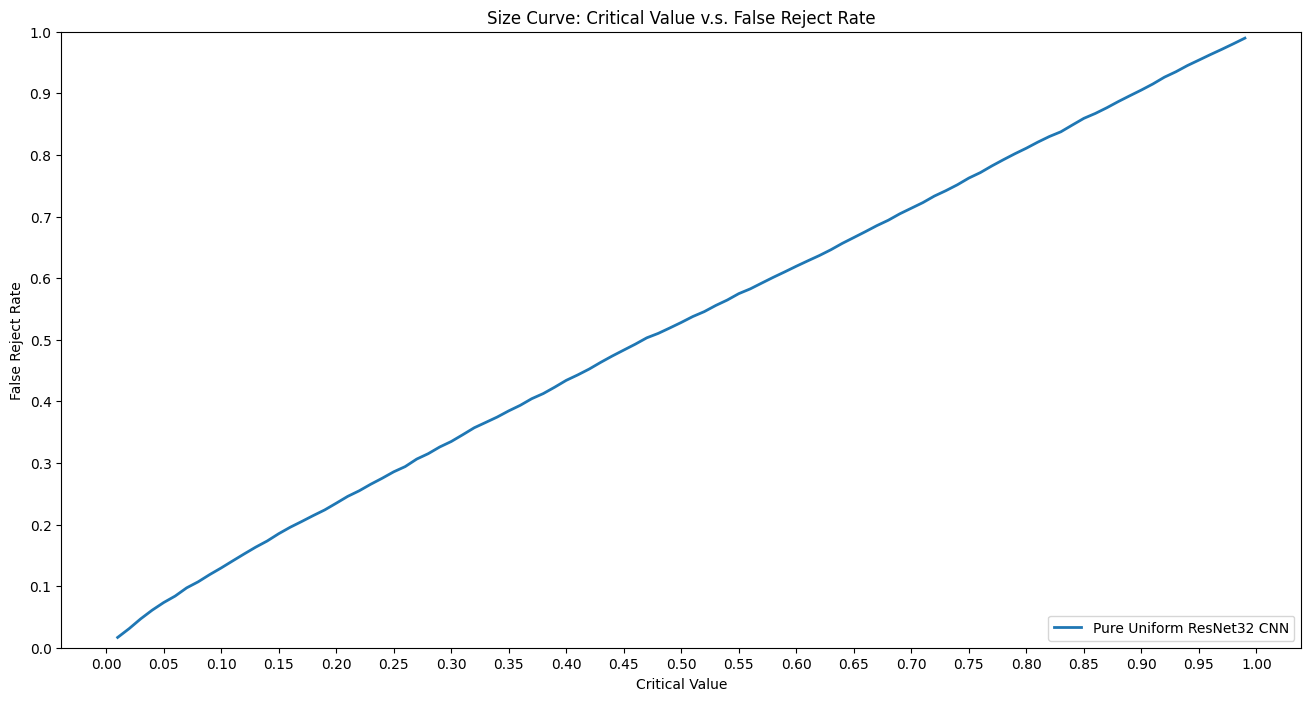

In [55]:

plt.figure(figsize=(16, 8))
x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]

index = 0

for z in z_score:
    predictions_edge = np.abs(predictions.divide(0.23)) > z
    truth_edge = pd.melt(truth*2)
    truth_edge = (truth_edge == 1)
    predictions_edge = pd.melt(predictions_edge)
    total_melt = pd.concat([truth_edge, predictions_edge], axis=1)
    # Plot ROC curve
    x_axis.append(my_array[index] * 0.01)
    # y_axis.append(((truth_edge.iloc[:, 1] == 0) == (predictions_edge.iloc[:, 1] == 1) ).sum() / (truth_edge.iloc[:, 1] == 0).sum())
    y_axis.append(total_melt[truth_edge.iloc[:,1] == False].iloc[:, 3].sum() / len(total_melt[truth_edge.iloc[:,1] == False].iloc[:, 3]))
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    index += 1
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('Critical Value')
plt.ylabel('False Reject Rate')
plt.title(f'Size Curve: Critical Value v.s. False Reject Rate')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.05))
plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()

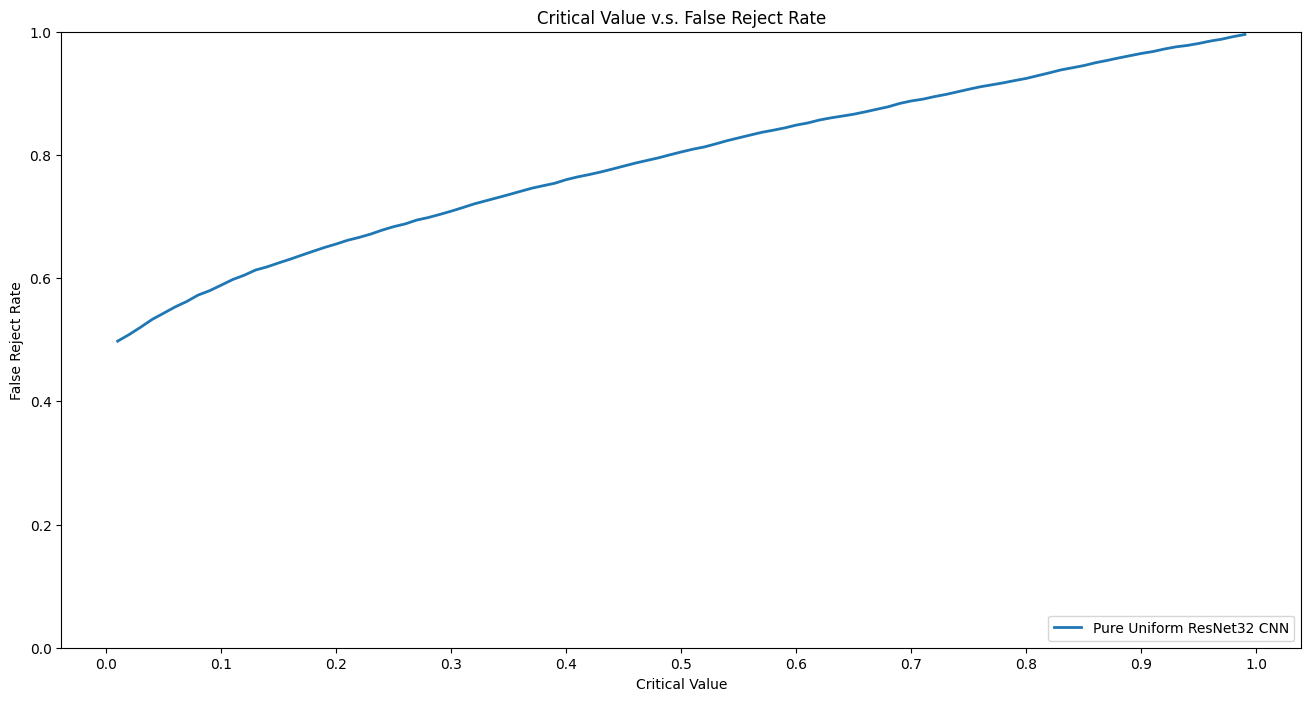

In [192]:

plt.figure(figsize=(16, 8))
x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]

index = 0

for z in z_score:
    predictions_edge = np.abs(predictions.divide(0.11)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    # Plot ROC curve
    x_axis.append(my_array[index] * 0.01)
    y_axis.append(((truth_edge.iloc[:, 1] == 1) == (predictions_edge.iloc[:, 1] == 0) ).sum() / (truth_edge.iloc[:, 1] == 0).sum())
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    index += 1
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('Critical Value')
plt.ylabel('False Reject Rate')
plt.title(f'Critical Value v.s. False Reject Rate')
plt.legend(loc='lower right')
# plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()

In [181]:
len(my_array)

100

In [159]:
z_score

[2.575829303548901,
 2.3263478740408408,
 2.1700903775845606,
 2.053748910631823,
 1.9599639845400545,
 1.880793608151251,
 1.8119106729525978,
 1.75068607125217,
 1.6953977102721358,
 1.6448536269514729,
 1.5981931399228175,
 1.5547735945968535,
 1.5141018876192835,
 1.4757910281791706,
 1.4395314709384563,
 1.4050715603096329,
 1.372203808998726,
 1.3407550336902165,
 1.3105791121681285,
 1.2815515655446004,
 1.2535654384704504,
 1.2265281200366098,
 1.200358858030859,
 1.1749867920660904,
 1.1503493803760079,
 1.1263911290388007,
 1.1030625561995975,
 1.0803193408149558,
 1.0581216176847767,
 1.0364333894937898,
 1.0152220332170279,
 0.994457883209753,
 0.9741138770593092,
 0.9541652531461943,
 0.93458929107348,
 0.915365087842814,
 0.8964733640019162,
 0.8778962950512288,
 0.8596173642419115,
 0.8416212335729142,
 0.8238936303385574,
 0.8064212470182404,
 0.7891916526582226,
 0.7721932141886848,
 0.7554150263604693,
 0.7388468491852137,
 0.7224790519280627,
 0.7063025628400874,
 0.

In [17]:
total_melt['error'] = round(np.sqrt(
    (total_melt['truth'] - total_melt['predictions'])**2)
    ,2)

total_melt['truth'] = round(total_melt['truth'],2)

In [18]:
total_melt

truth  predictions  error
0       -0.28     0.230773   0.51
1        0.32     0.301123   0.02
2       -0.83    -0.732734   0.10
3       -0.96    -0.712582   0.25
4        0.50     0.456935   0.04
...       ...          ...    ...
799995   0.96     0.847450   0.11
799996   0.48     0.514822   0.03
799997  -0.04    -0.073947   0.03
799998  -0.41    -0.365065   0.04
799999  -0.75    -0.258302   0.49

[800000 rows x 3 columns]

In [19]:
round(total_melt.describe(), 2)

truth  predictions      error
count  800000.00    800000.00  800000.00
mean        0.00        -0.00       0.20
std         0.58         0.51       0.16
min        -1.00        -1.04       0.00
25%        -0.50        -0.48       0.08
50%         0.00        -0.00       0.17
75%         0.50         0.47       0.28
max         1.00         1.04       1.50

<AxesSubplot:xlabel='truth', ylabel='error'>

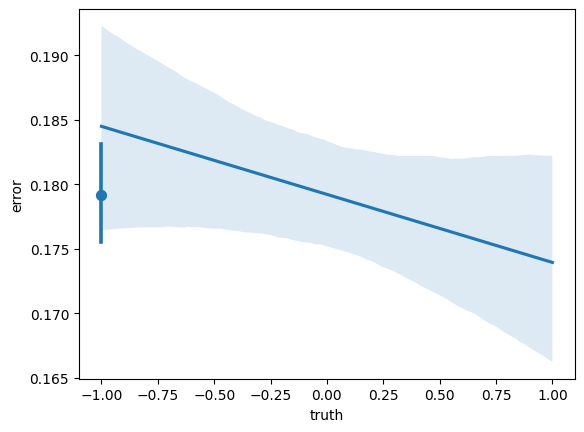

TypeError: range() takes no keyword arguments

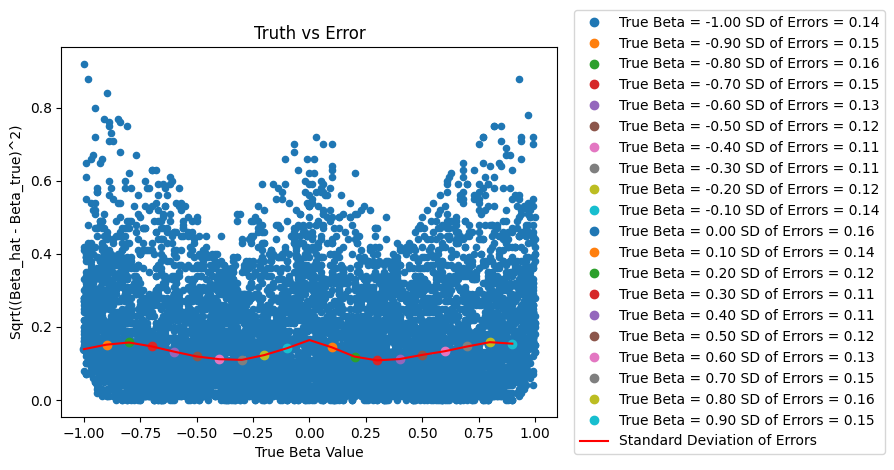

In [128]:
total_melt.iloc[:8000,].plot.scatter(x='truth', y='error')
# 

# sns.regplot(data=total_melt, x="truth", y="error", x_bins=np.arange(-1, 1, 10), order=2)

# sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", robust=True)
# sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", x_bins=np.arange(-1, 1, 200), order=2, color= 'r')

x_axis  = np.linspace(-1, 1, 20)
x = []
y = []

for i in [round(x * 0.1, 1) for x in range(-10, 10)]:
    # print(i, "%" , total_melt.loc[total_melt['truth'] == round(i,2) ].error.mean())
    x.append(i)
    y.append(total_melt.loc[total_melt['truth'] == round(i,2) ].error.std())
    plt.plot(i, total_melt.loc[total_melt['truth'] == round(i,2) ].error.std(), 'o', label = f"True Beta = {round(i,1):.2f} SD of Errors = {total_melt.loc[total_melt['truth'] == round(i,2)].error.std():.2f}")

plt.plot(x, y, 'r', label = 'Standard Deviation of Errors')
plt.legend()

plt.xlabel('True Beta Value')
plt.ylabel('Sqrt((Beta_hat - Beta_true)^2)')
plt.title(f'Truth vs Error')
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

# plt.yticks(np.arange(0, 1.01, step=0.05))
# plt.xticks(np.arange(0, 1.01, step=0.05))

# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()


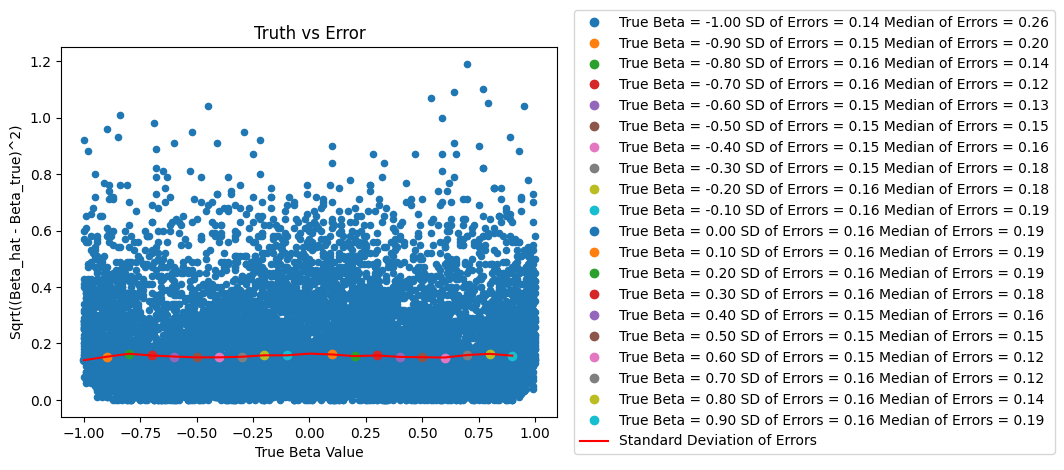

In [22]:
total_melt.iloc[:10000,].plot.scatter(x='truth', y='error')
# 

# sns.regplot(data=total_melt, x="truth", y="error", x_bins=np.arange(-1, 1, 10), order=2)

# sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", robust=True)
# sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", x_bins=np.arange(-1, 1, 200), order=2, color= 'r')

x_axis  = np.linspace(-1, 1, 20)
x = []
y = []

y_median = []


for i in [round(x * 0.1, 1) for x in range(-10, 10)]:
    # print(i, "%" , total_melt.loc[total_melt['truth'] == round(i,2) ].error.mean())
    x.append(i)
    y.append(total_melt.loc[total_melt['truth'] == round(i,2) ].error.std())
    plt.plot(i, total_melt.loc[total_melt['truth'] == round(i,2) ].error.std(), 'o', label = 
             f"True Beta = {round(i,1):.2f} SD of Errors = {total_melt.loc[total_melt['truth'] == round(i,2)].error.std():.2f} Median of Errors = {total_melt.loc[total_melt['truth'] == round(i,2)].error.median():.2f}")

plt.plot(x, y, 'r', label = 'Standard Deviation of Errors')
plt.legend()

plt.xlabel('True Beta Value')
plt.ylabel('Sqrt((Beta_hat - Beta_true)^2)')
plt.title(f'Truth vs Error')
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

# plt.yticks(np.arange(0, 1.01, step=0.05))
# plt.xticks(np.arange(0, 1.01, step=0.05))

# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()


In [51]:
total_melt.loc[total_melt['truth'] == 1]

truth  predictions  error
290       1.0     0.622377   0.38
521       1.0     0.788595   0.21
559       1.0     0.865316   0.13
686       1.0     0.601331   0.40
1086      1.0     0.820298   0.18
...       ...          ...    ...
798577    1.0     0.683924   0.32
798686    1.0     0.715624   0.28
798966    1.0     0.744855   0.25
799020    1.0     0.467118   0.53
799488    1.0     0.645211   0.35

[2061 rows x 3 columns]

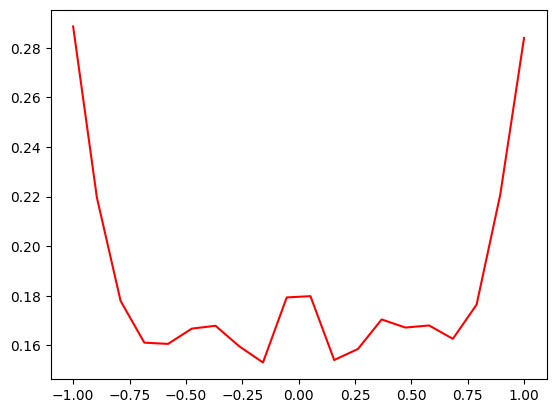

In [74]:
x_axis  = np.linspace(-1, 1, 20)
x = []
y = []

for i in x_axis:
    # print(i, "%" , total_melt.loc[total_melt['truth'] == round(i,2) ].error.mean())
    x.append(i)
    y.append(total_melt.loc[total_melt['truth'] == round(i,2) ].error.mean())

plt.plot(x, y, 'r')
# plt.plot(i, total_meelt.loc[total_melt['truth'] == round(i,2) ].error.mean(), 'ro')

<AxesSubplot:xlabel='truth', ylabel='error'>

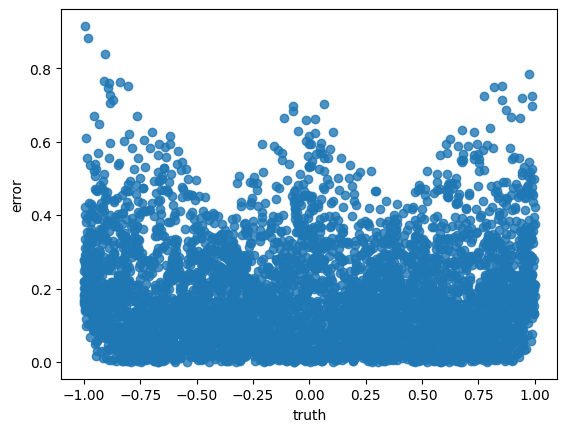

In [34]:
sns.regplot(data=total_melt.iloc[:5000,], x="truth", y="error", robust=True)

In [2]:
network_type = 'line'

In [4]:
X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_profile_image.npy')

y_test = pd.read_csv(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_rates_data.csv')
# print(y_test.value_counts())
y_test = y_test.iloc[:, 10:].values

# Get the number of columns in the second dimension
num_columns = X_test.shape[1]

# Create a random permutation of column indices
permuted_indices = np.random.permutation(num_columns)

# Use the permutation to shuffle the columns of the 3D matrix along axis 1
shuffled_matrix_3d = np.take_along_axis(X_test, permuted_indices[None, :, None], axis=1)

In [19]:
X_test[0] - shuffled_matrix_3d[0]

array([[ 0,  0,  1, ...,  1,  0,  1],
       [ 1,  0,  1, ...,  1,  1,  0],
       [-1,  0,  0, ...,  0,  1,  1],
       ...,
       [ 0, -1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [4]:
def get_network_result(select_type, model, device, criterion, table_columns, batch_size=8):
    network_type = select_type
    print(network_type.upper())
    # X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
    X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_profile_image.npy')
    
    y_test = pd.read_csv(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_rates_data.csv')
    # print(y_test.value_counts())
    y_test = y_test.iloc[:, 10:].values

#    # Get the number of columns in the second dimension
#     num_columns = X_test.shape[1]

#     # Create a random permutation of column indices
#     permuted_indices = np.random.permutation(num_columns)

#     # Use the permutation to shuffle the columns of the 3D matrix along axis 1
#     shuffled_matrix_3d = np.take_along_axis(X_test, permuted_indices[None, :, None], axis=1)

#     X_test = shuffled_matrix_3d
    
    X_test = X_test[:, None, :, :]
    

    test_dataset = RegressionDataset(X_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    prediction_list = []
    truth_list = []

    test_loss = 0

    model.eval()
    with torch.no_grad():
        for test_inputs, test_targets in test_dataloader:
            # Transfer validation data to GPU
            test_inputs = test_inputs.to(device)
            prediction_tf = model.forward(test_inputs)
            test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
            predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
            prediction_list.append(predictions)
            truth_list.append(pd.DataFrame(test_targets.numpy()))
            

    predictions = pd.concat(prediction_list, axis=0)
    predictions.columns = table_columns
    truth = pd.concat(truth_list, axis=0)
    truth.columns = table_columns

    return predictions, truth, network_type



def get_CI_predictions(select_type, predictions, truth, SEs, z_score, index):    
    print(f'{predictions.columns[index]}' , end = ' : ')
    # print(f'SEs {SEs}')
    # print(f'Z score {z_score}')
    CI_values = z_score * SEs
    # print(f'CI {round(CI_values.iloc[:, index],2)}')
    predict_p = (np.abs(predictions - truth).iloc[:, index] < CI_values.iloc[:, index].values.item())
    return predict_p


def get_compare_result(evolCCM_select, models, models_name, device, criterion, table_columns, batch_size):
    directory ='/home/eeepc/Documents/image_genes/'
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = [0.4040456, 0.4531348, 0.4104203, 0.3955997, 0.4090854, 0.4456595, 0.4339634, 0.4251135, 0.4557958, 0.4352029]

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

    plt.figure(figsize=(8, 6))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


    for model_id, model in enumerate(models):
        predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
        shape_index = 0
        x_axis = []
        y_axis = []

        # SEs_df_mle = (predictions - truth.iloc[:100,]).std()

        for z in z_score:
            predictions_edge = np.abs(predictions / 0.23) > z
            truth_edge = pd.melt(truth*2)
            predictions_edge = pd.melt(predictions_edge)
            conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
            # Extract values from the confusion matrix
            TN, FP, FN, TP = conf_matrix.ravel()

            # Calculate sensitivity and specificity
            sensitivity = TP / (TP + FN)
            specificity = TN / (TN + FP)
            # Calculate ROC curve
            fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

            # Calculate Area Under the Curve (AUC)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            x_axis.append(1 - specificity)
            y_axis.append(sensitivity)

        plt.plot(x_axis, y_axis, lw=2, label=f'{models_name[model_id]} CNN {network_type.upper()}')


    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'{evolCCM_select.upper()} Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    plt.show()

    # print(x_axis)
    return x_axis, y_axis
    

In [5]:
model_parameters={}
model_parameters['resnet18'] = ([64,128,256,512],[2,2,2,2],1,False)
model_parameters['resnet34'] = ([64,128,256,512],[3,4,6,3],1,False)
model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
model_parameters['resnet101'] = ([64,128,256,512],[3,4,23,3],4,True)
model_parameters['resnet152'] = ([64,128,256,512],[3,8,36,3],4,True)

# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

# architecture_setting = model_parameters['resnet34']

architecture_setting = model_parameters['resnet50']


# Initialize your model
# Define the path to the checkpoint file
# checkpoint_path = "./temperary_data_saver/model_checkpoints/02_12_00_08_01_duplicates_ResNet_18_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.085.pth"

# checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/mixture_uniform/model_checkpoints/02_12_01_49_31_duplicates_ResNet_34_no_dropout_1e4/batch_best_model_0.053.pth"

checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/pure_uniform_4million/model_checkpoints/02_15_15_00_07_random_sampled_pure_uniform_permutated_ResNet_34_1e3/batch_best_model_0.066.pth"


model = ResNet(architecture_setting, in_channels=1, num_classes = num_outputs)

# Load the state dictionary from the checkpoint file
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into your model
model.load_state_dict(checkpoint)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pure_uniform_model = model 

In [5]:
model_parameters={}
model_parameters['resnet18'] = ([64,128,256,512],[2,2,2,2],1,False)
model_parameters['resnet34'] = ([64,128,256,512],[3,4,6,3],1,False)
model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
model_parameters['resnet101'] = ([64,128,256,512],[3,4,23,3],4,True)
model_parameters['resnet152'] = ([64,128,256,512],[3,8,36,3],4,True)

# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

architecture_setting = model_parameters['resnet34']

# architecture_setting = model_parameters['resnet50']


# Initialize your model
# Define the path to the checkpoint file
# checkpoint_path = "./temperary_data_saver/model_checkpoints/02_12_00_08_01_duplicates_ResNet_18_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.085.pth"

checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/mixture_uniform/model_checkpoints/02_12_01_49_31_duplicates_ResNet_34_no_dropout_1e4/batch_best_model_0.053.pth"

# checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/pure_uniform_4million/model_checkpoints/02_15_15_00_07_random_sampled_pure_uniform_permutated_ResNet_34_1e3/batch_best_model_0.066.pth"


model = ResNet(architecture_setting, in_channels=1, num_classes = num_outputs)

# Load the state dictionary from the checkpoint file
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into your model
model.load_state_dict(checkpoint)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

mixture_uniform_model = model

# Get New CCM data


In [9]:
network_name = ["line", "two_triangles", "star", "full_connected"]
table_columns = ['beta_12', 'beta_13', 'beta_14', 'beta_15', 'beta_23', 'beta_24', 'beta_25', 'beta_34', 'beta_35', 'beta_45']
network_all_types = ['line', 'star', 'two_triangles', 'fully_connected'] 

In [10]:
# directory = '/home/eeepc/Documents/random_tree/code_base/test_data/prediction/'

directory = '/home/eeepc/Documents/random_tree/code_base/test_data/prediction/200_new_version/'

In [24]:
line = pd.read_csv("/home/eeepc/Documents/random_tree/code_base/test_data/prediction/200_new_version/line/estP.csv")

<AxesSubplot:>

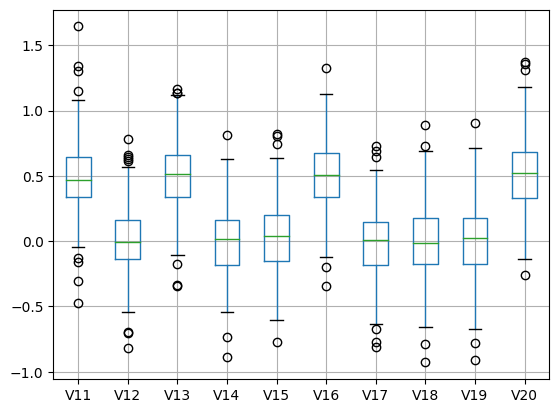

In [25]:
line.iloc[:, 10:].boxplot()

In [6]:
# line_2_estP = pd.read_csv("/home/eeepc/Documents/random_tree/code_base/test_data/prediction/line_2/estP.csv")

In [11]:
# line_2_ses = pd.read_csv("/home/eeepc/Documents/random_tree/code_base/test_data/prediction/line_2/estSE.csv")

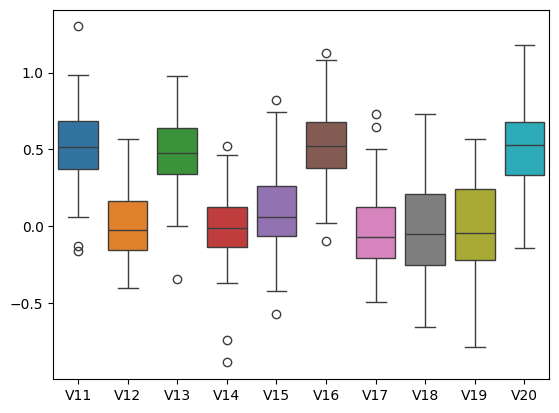

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Create subplots with 1 row and 2 columns
# # fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)

# df_to_raw = line_2_estP.iloc[:, 10:]
# # df_to_raw.columns = table_columns
# sns.boxplot(df_to_raw)
# # axes[i][j].set_title(f'{network_name[index].upper()}: evolCCM estimated Beta values')
# # index += 1
# # Show the plot
# plt.show()


In [11]:
estimate_rates_array = []
for types_name in network_name:
    estimate_rates_array.append(pd.read_csv(directory + types_name + '/estP.csv'))
estimate_rates = pd.concat(estimate_rates_array, axis = 0)
estimate_rates = estimate_rates.iloc[:, 10:]

estimate_SE_array = []
for types_name in network_name:
    estimate_SE_array.append(pd.read_csv(directory + types_name + '/estSE.csv'))
estimate_SE = pd.concat(estimate_SE_array, axis = 0)
estimate_SE = estimate_SE.iloc[:, 10:]

truth_rates_array = []
for types_name in network_name:
    truth_rates_array.append(pd.read_csv(directory + types_name + '/rates_data.csv'))
truth_rates = pd.concat(truth_rates_array, axis = 0)
truth_rates = truth_rates.iloc[:, 10:]

In [15]:
len(estimate_rates_array)

4

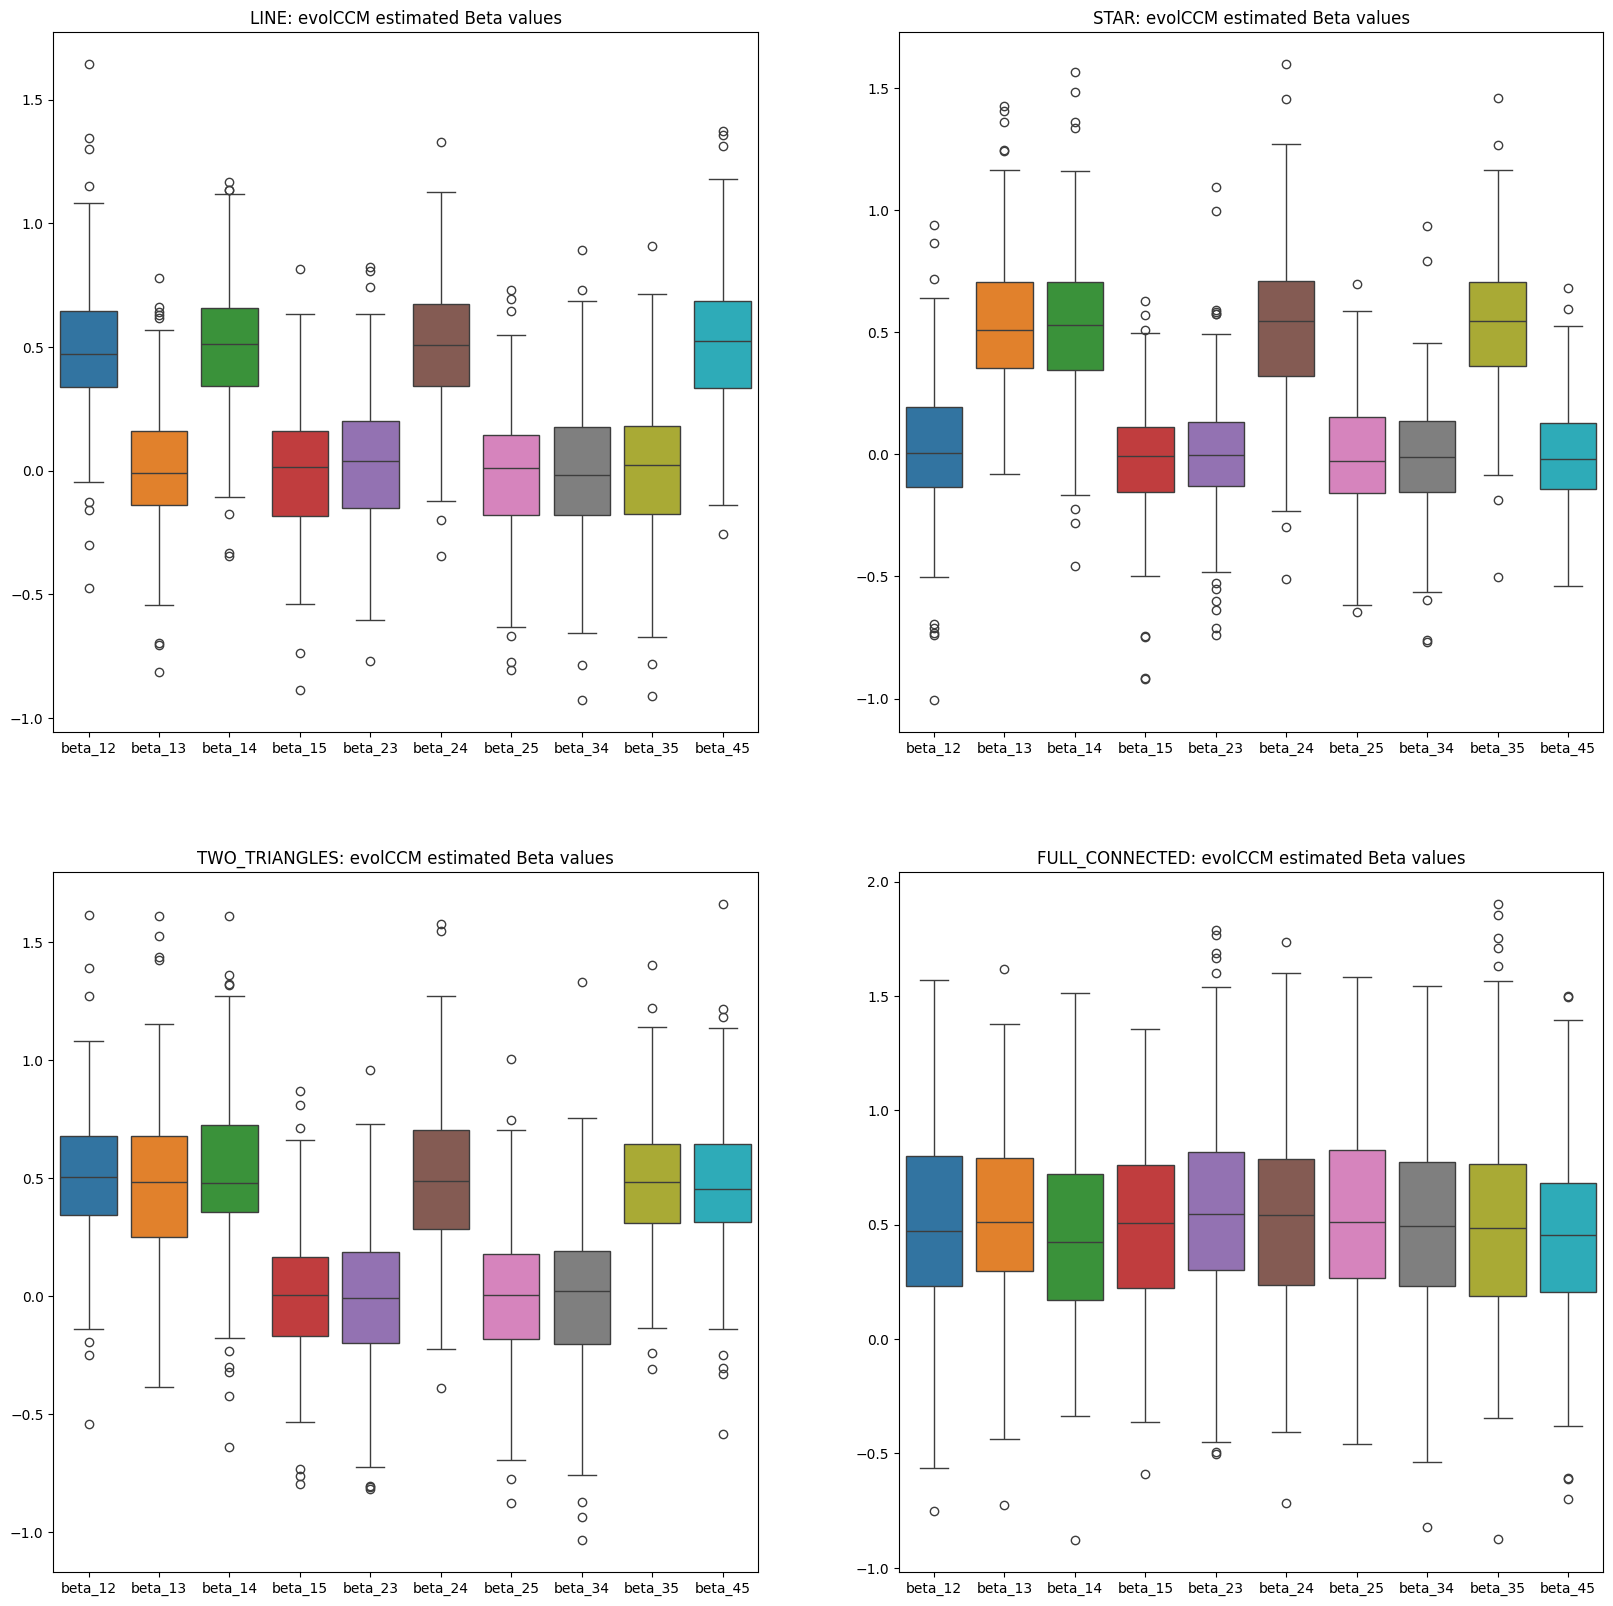

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = estimate_rates_array[index].iloc[:, 10:]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: evolCCM estimated Beta values')
        index += 1
# Show the plot
plt.show()


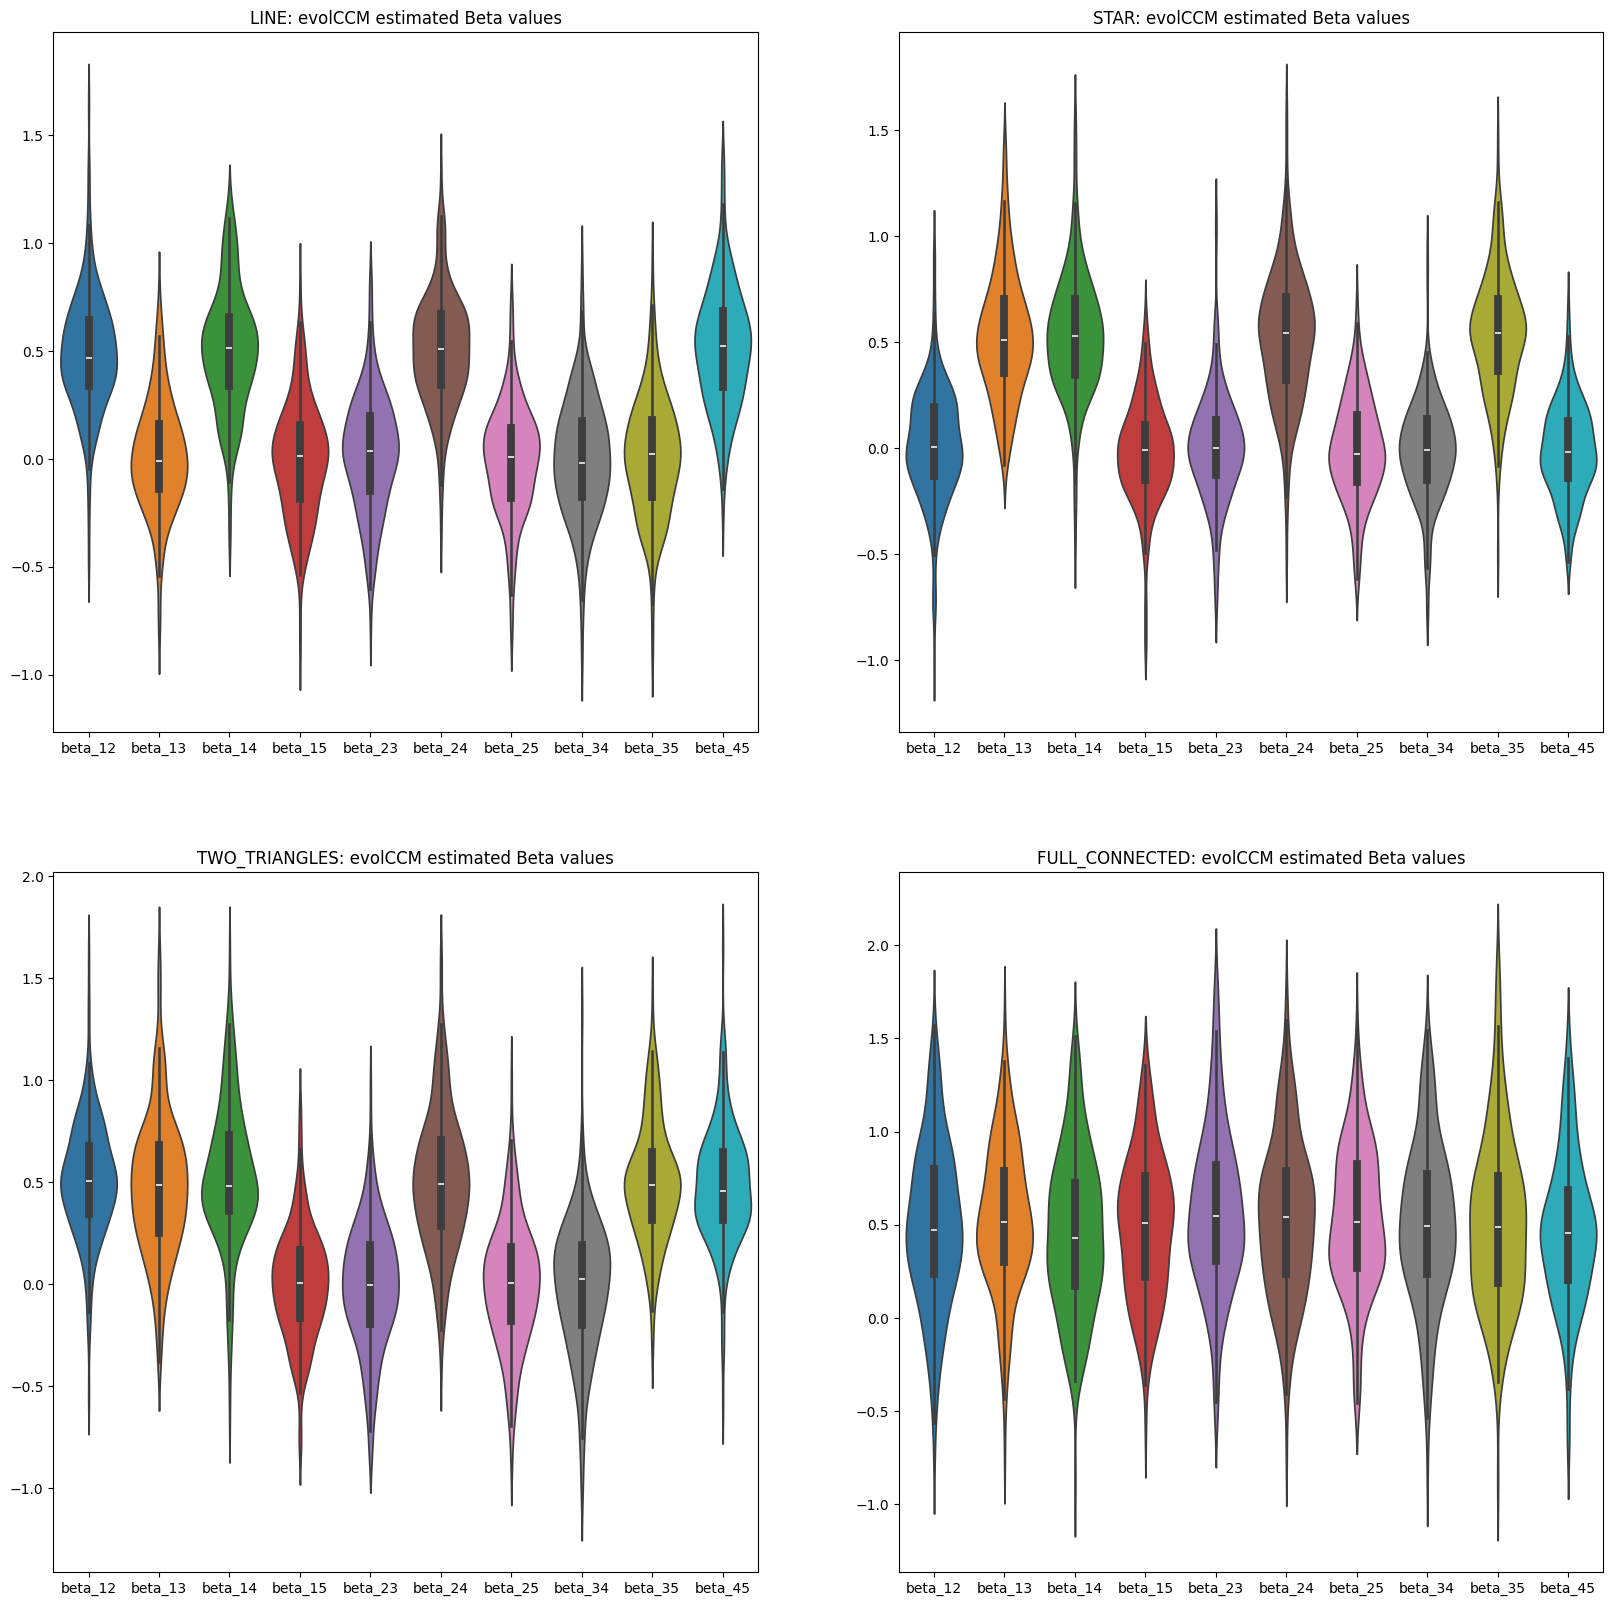

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = estimate_rates_array[index].iloc[:, 10:]
        df_to_raw.columns = table_columns
        sns.violinplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: evolCCM estimated Beta values')
        index += 1
# Show the plot
plt.show()


In [12]:
estimate_SE_array = []
for types_name in network_name:
    estimate_SE_array.append(pd.read_csv(directory + types_name + '/estSE.csv'))
estimate_SE = pd.concat(estimate_SE_array, axis = 0)
estimate_SE = estimate_SE.iloc[:, 10:]



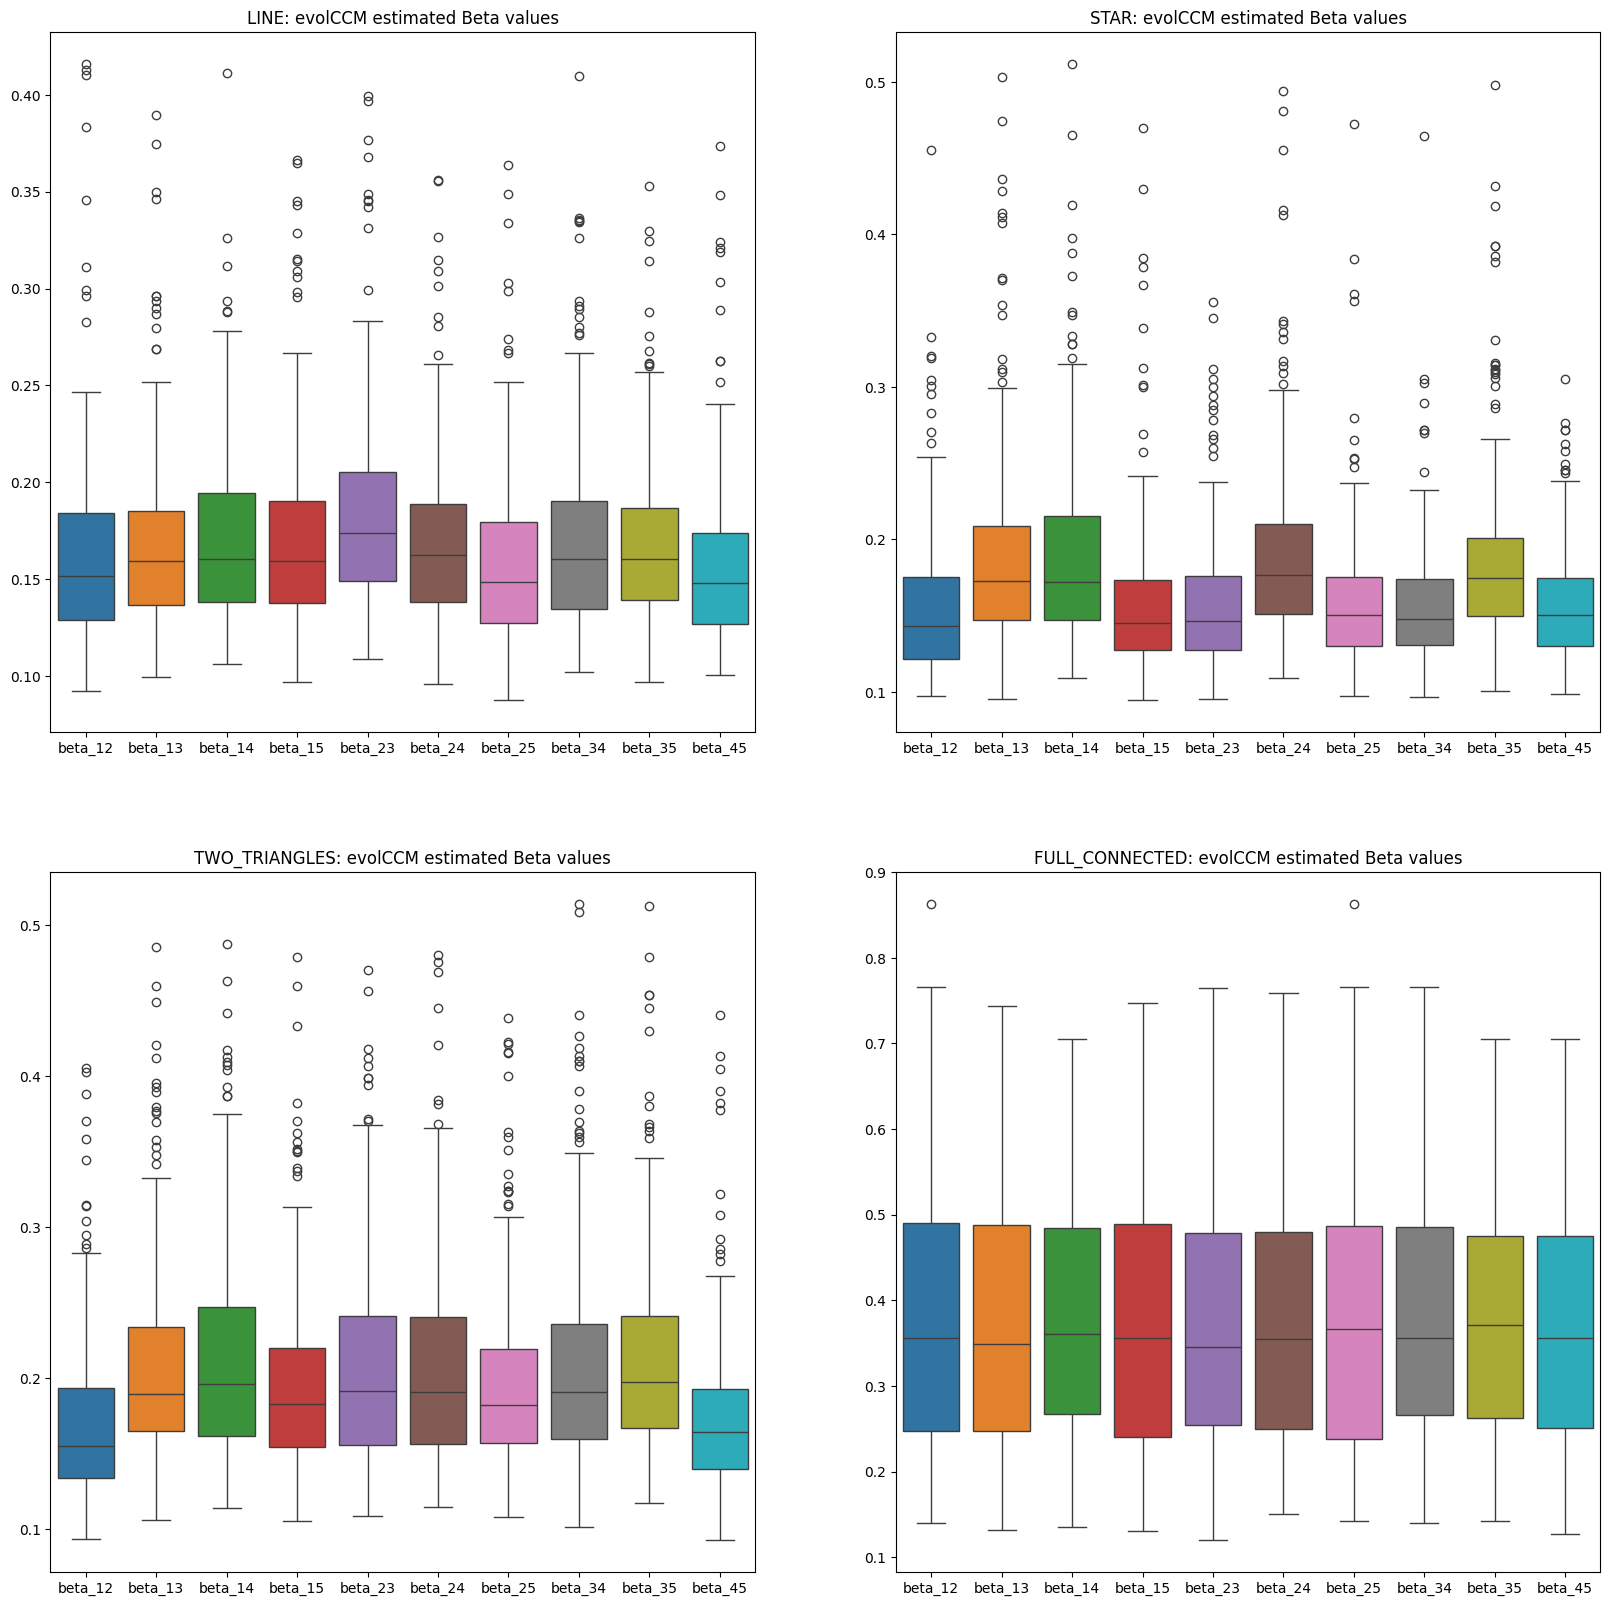

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = estimate_SE_array[index].iloc[:, 10:]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: evolCCM estimated SE values')
        index += 1
# Show the plot
plt.show()


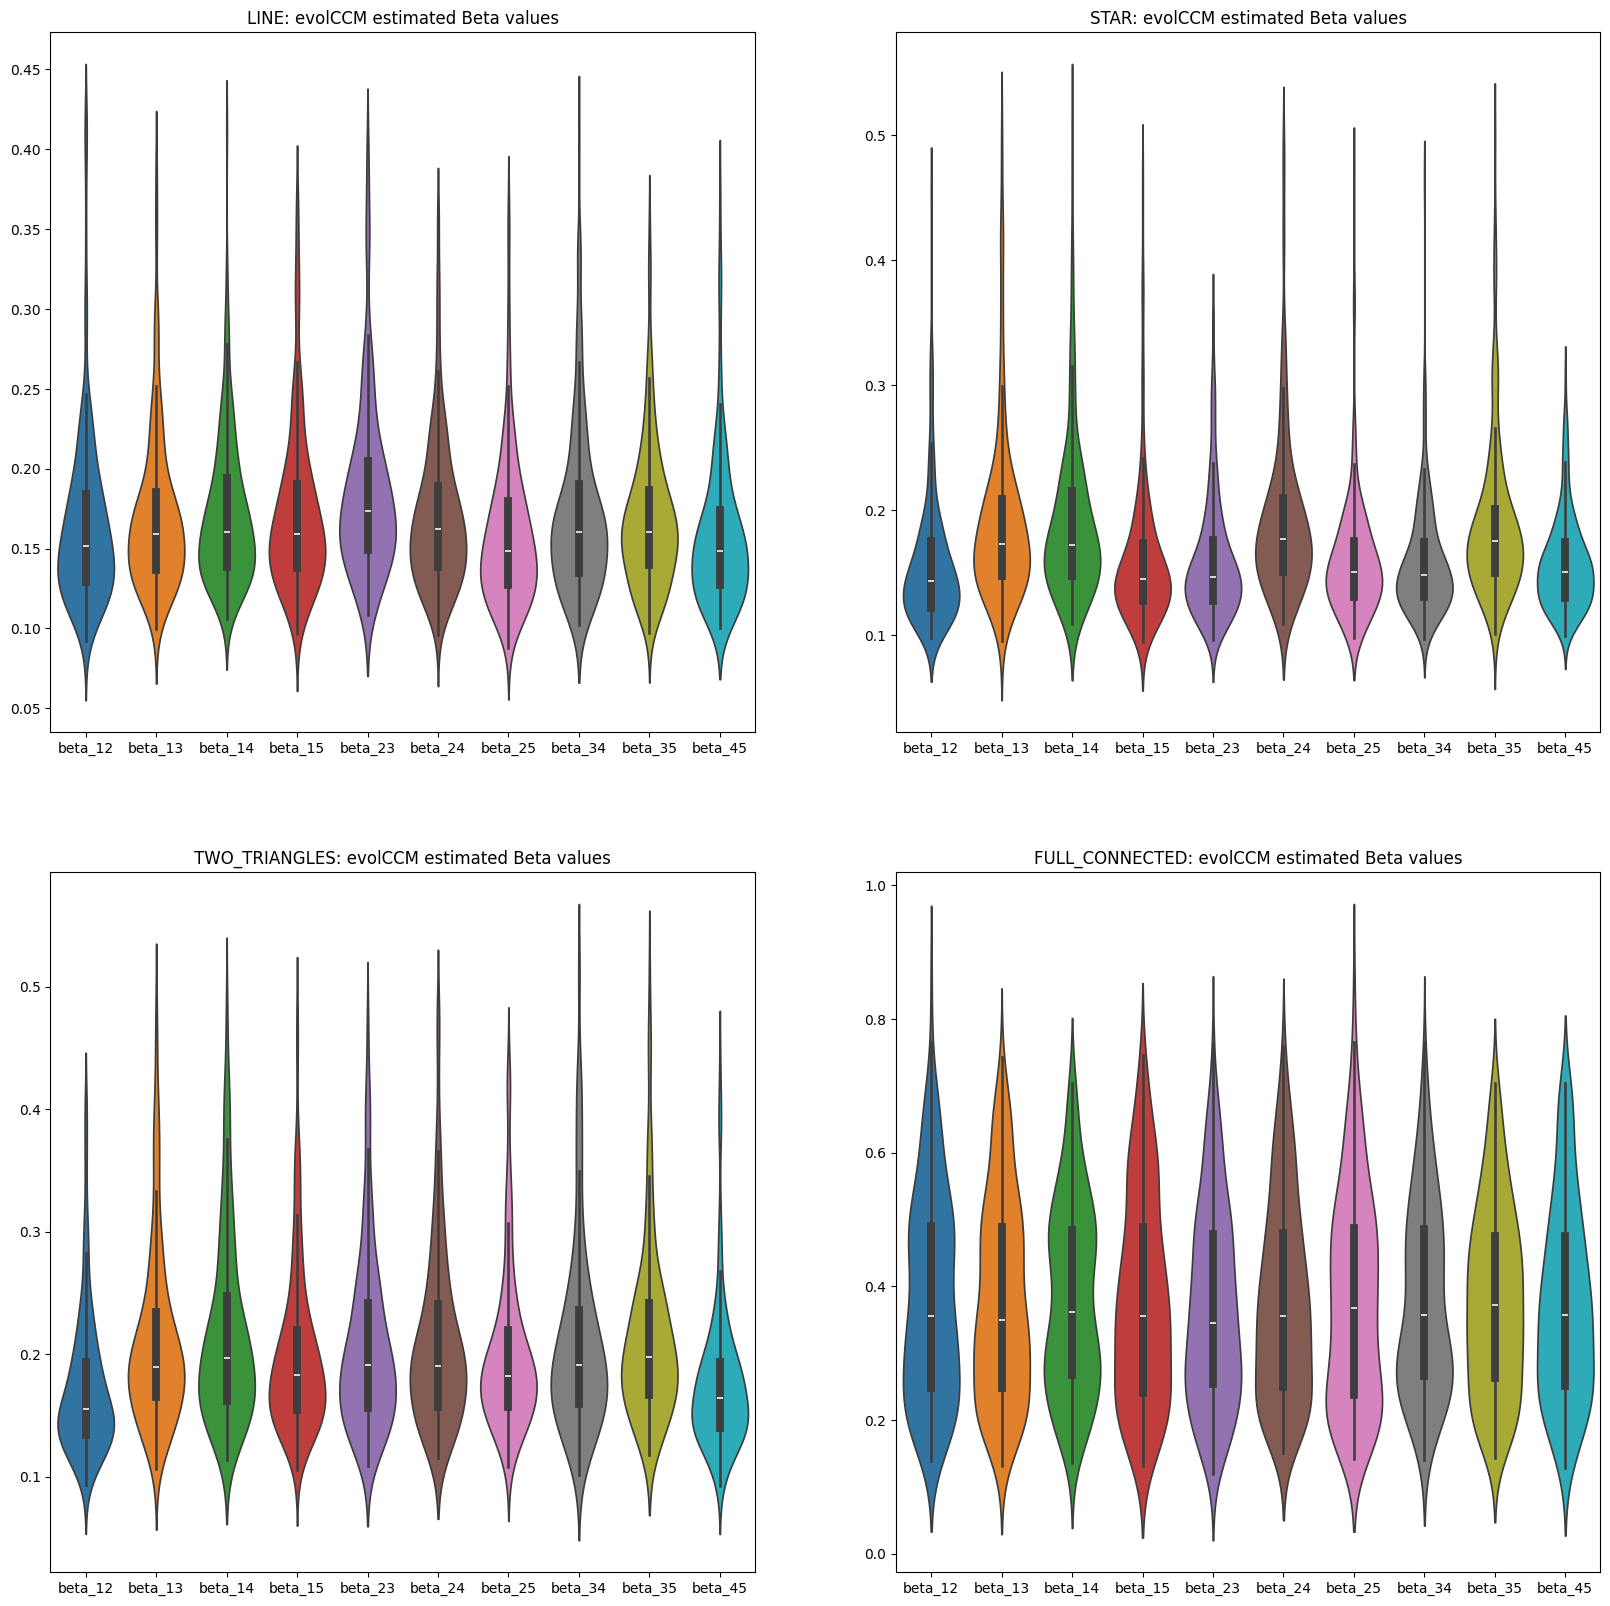

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = estimate_SE_array[index].iloc[:, 10:]
        df_to_raw.columns = table_columns
        sns.violinplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: evolCCM estimated SE values')
        index += 1
# Show the plot
plt.show()


In [83]:
len(estimate_rates)

800

In [86]:
estimate_rates

V11       V12       V13       V14       V15       V16       V17  \
0    0.528499  0.356739 -0.345696 -0.007213 -0.387178  0.620403  0.410376   
1   -0.127052 -0.158619  0.522661  0.165475 -0.182462  0.416557  0.729063   
2    0.435413  0.051670  0.467879 -0.129537  0.425651  0.169634 -0.060007   
3    0.885594  0.147639  0.376654 -0.737437  0.634004  0.521029 -0.207403   
4    0.611252  0.236086  0.640923 -0.096747  0.259988  1.126209 -0.008951   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.849281  0.384532  1.418201  0.750781  0.927727 -0.042501  0.599771   
196  0.712155  0.772080  0.377688  0.352801  0.254951  0.960761  0.132205   
197  0.439333  0.317599  0.316861  0.763294  1.269864  0.898085  0.237894   
198  0.905064  1.023171  0.420170 -0.273568  0.570840  1.212443  0.982446   
199  1.189895 -0.248015  0.441436  0.950562 -0.084373  0.434227  0.431785   

          V18       V19       V20  
0    0.056278  0.029099  0.686946  
1    0.241241  0.211033  0.238515  
2   -0.656576  0.517728  0.238489  
3   -0.429986  0.390404  0.802906  
4    0.062426 -0.200535  0.591685  
..        ...       ...       ...  
195  0.685575  0.687832 -0.005593  
196  0.770391  0.258504  0.538544  
197  0.466072  0.557581  1.104045  
198  0.813205  0.080339  0.482754  
199  0.309199  0.550804  0.802744  

[800 rows x 10 columns]

In [91]:
len(predictions)

4000

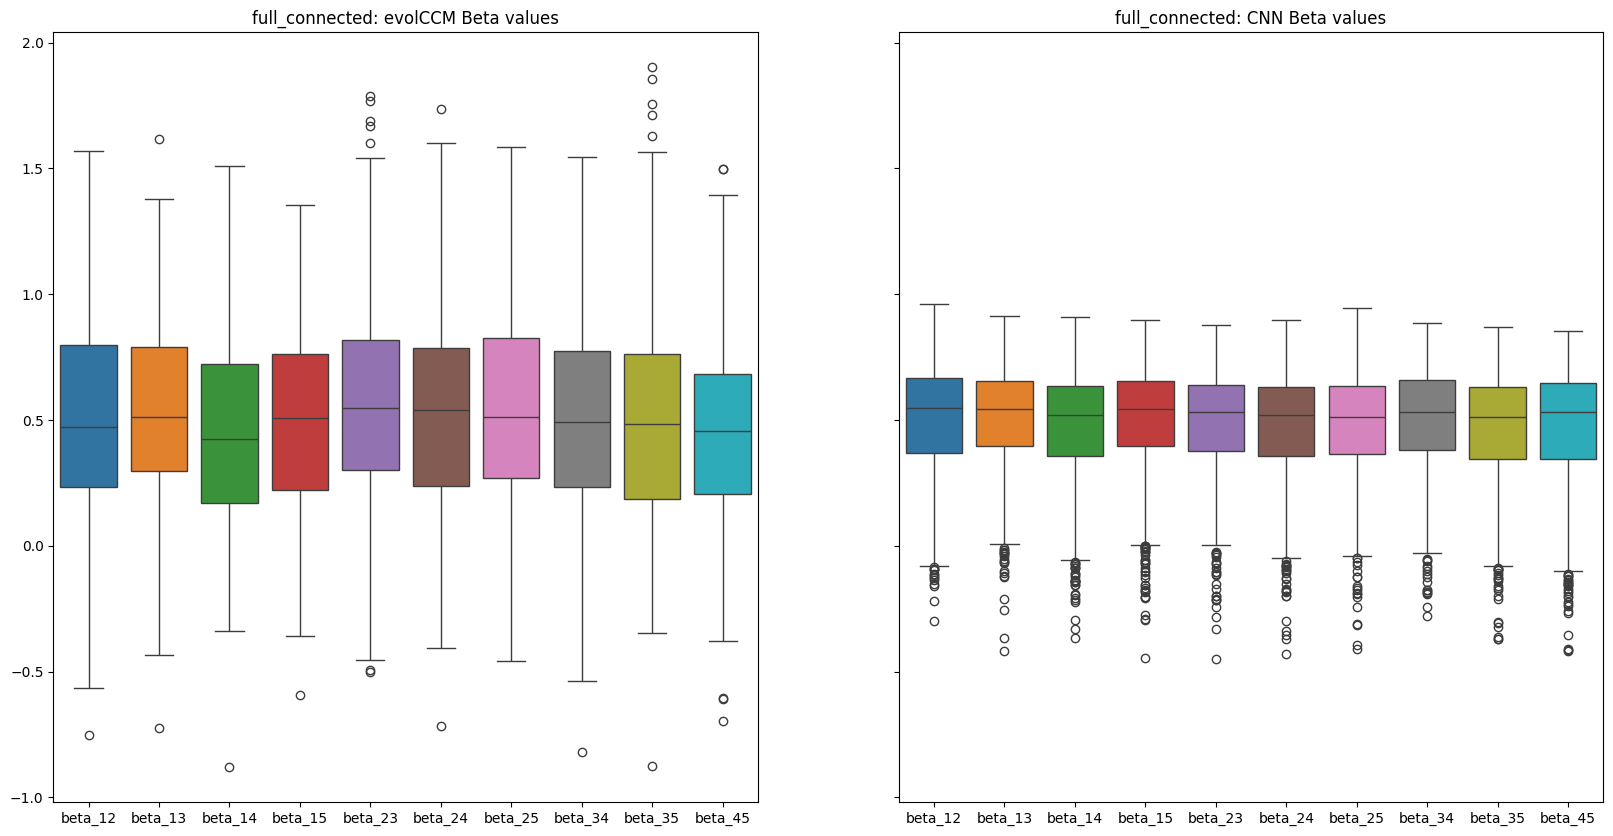

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
# for i in range(4):
df_to_raw = estimate_rates.iloc[600:800, ]
df_to_raw.columns = table_columns
sns.boxplot(df_to_raw, ax=axes[0])
axes[0].set_title(f'{network_name[3]}: evolCCM Beta values')
# Show the plot


df_to_raw = predictions.iloc[3000:4000, ]
df_to_raw.columns = table_columns
sns.boxplot(df_to_raw, ax=axes[1])
axes[1].set_title(f'{network_name[3]}: CNN Beta values')

plt.show()

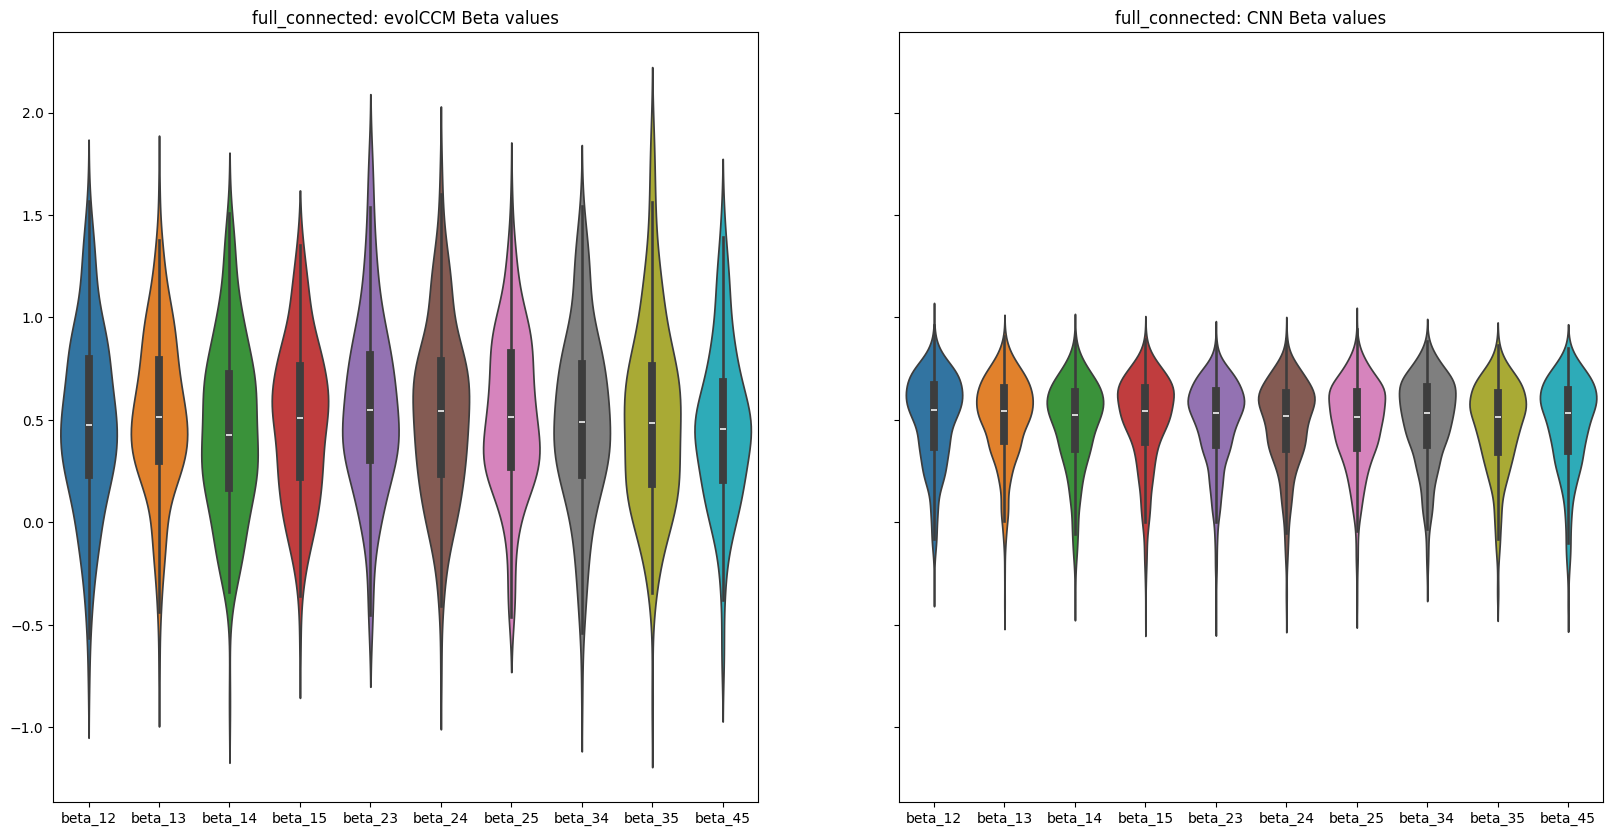

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
# for i in range(4):
df_to_raw = estimate_rates.iloc[600:800, ]
df_to_raw.columns = table_columns
sns.violinplot(df_to_raw, ax=axes[0])
axes[0].set_title(f'{network_name[3]}: evolCCM Beta values')
# Show the plot


df_to_raw = predictions.iloc[3000:4000, ]
df_to_raw.columns = table_columns
sns.violinplot(df_to_raw, ax=axes[1])
axes[1].set_title(f'{network_name[3]}: CNN Beta values')

plt.show()

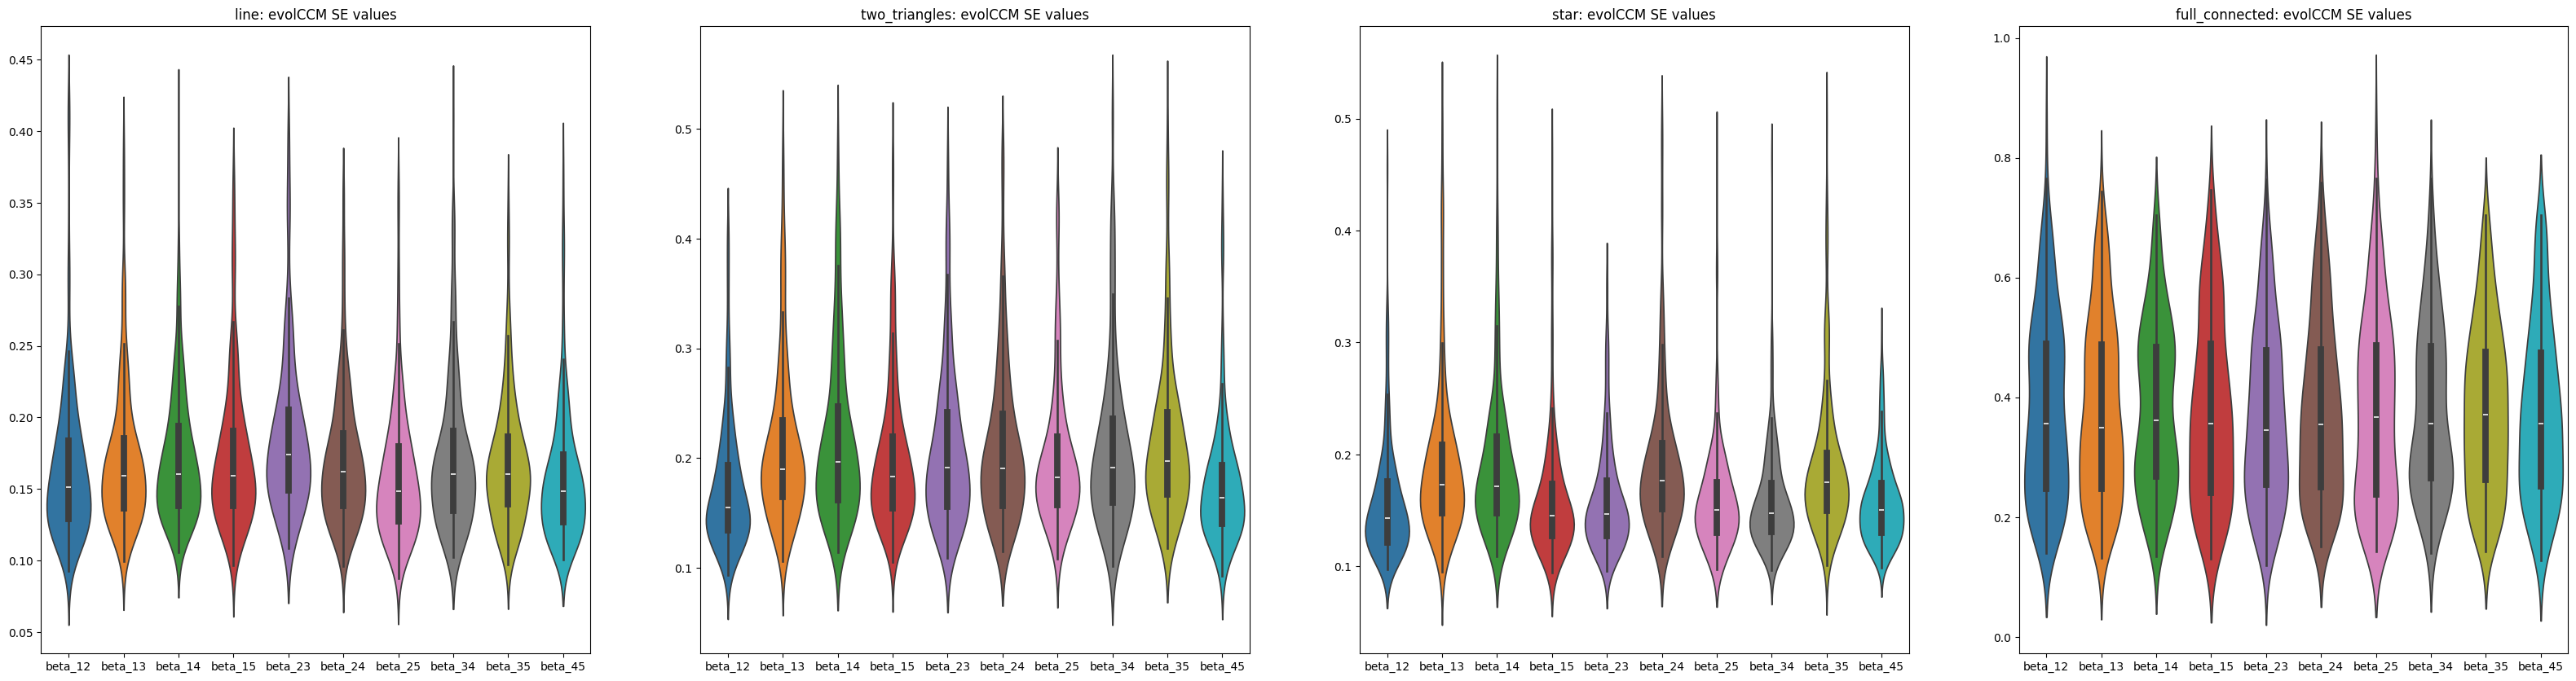

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 4, figsize=(40, 10), sharey=False)
for i in range(4):
    df_to_raw = estimate_SE_array[i].iloc[:, 10:]
    df_to_raw.columns = table_columns
    sns.violinplot(df_to_raw, ax=axes[i])
    axes[i].set_title(f'{network_name[i]}: evolCCM SE values')
# Show the plot
plt.show()


In [13]:
truth_rates_array = []
for types_name in network_name:
    truth_rates_array.append(pd.read_csv(directory + types_name + '/rates_data.csv'))
truth_rates = pd.concat(truth_rates_array, axis = 0)
truth_rates = truth_rates.iloc[:, 10:]

## Pure_uniform_model

In [121]:
# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0
    
predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


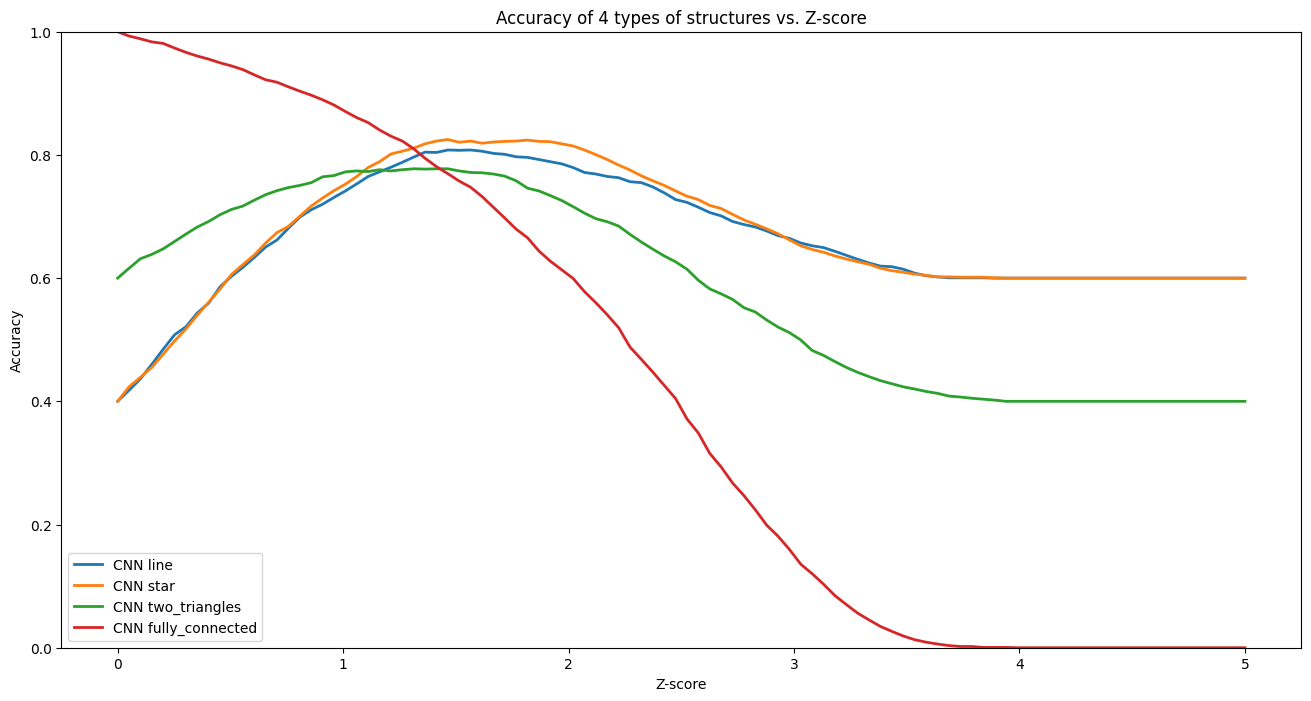

In [125]:

plt.figure(figsize=(16, 8))

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23]
z_score = np.linspace(0, 5, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
# z_score = np.linspace(0, 10, 100)
shape_index = 0



for type_i in range(4):
    start_index = type_i * 1000
    type_of_network = type_i * 1000 + 200
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(predictions.iloc[start_index:type_of_network, ] / SEs_df_mle) > z
        truth_edge = pd.melt(truth.iloc[start_index:type_of_network, ] *2)
        predictions_edge = pd.melt(predictions_edge)
        # Plot ROC curve
        x_axis.append(z)
        y_axis.append((predictions_edge.iloc[:, 1] == truth_edge.iloc[:, 1]).sum() / len(predictions_edge))

        # if np.round(z,2) == 1.92:
        #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'CNN {network_all_types[type_i]}')


plt.xlabel('Z-score')
plt.ylabel('Accuracy')
plt.title(f'Accuracy of 4 types of structures vs. Z-score')
plt.legend(loc='lower left')
# plt.yticks(np.arange(0, 1.01, step=0.1))
# plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()

In [29]:
len(predictions_array)

4

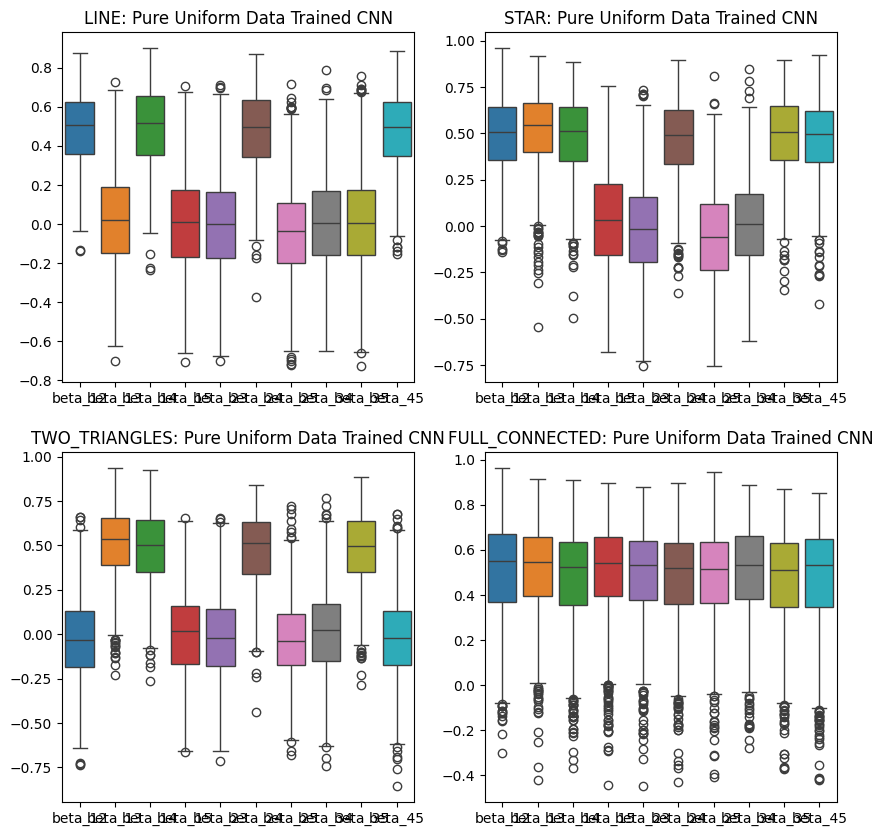

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Pure Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


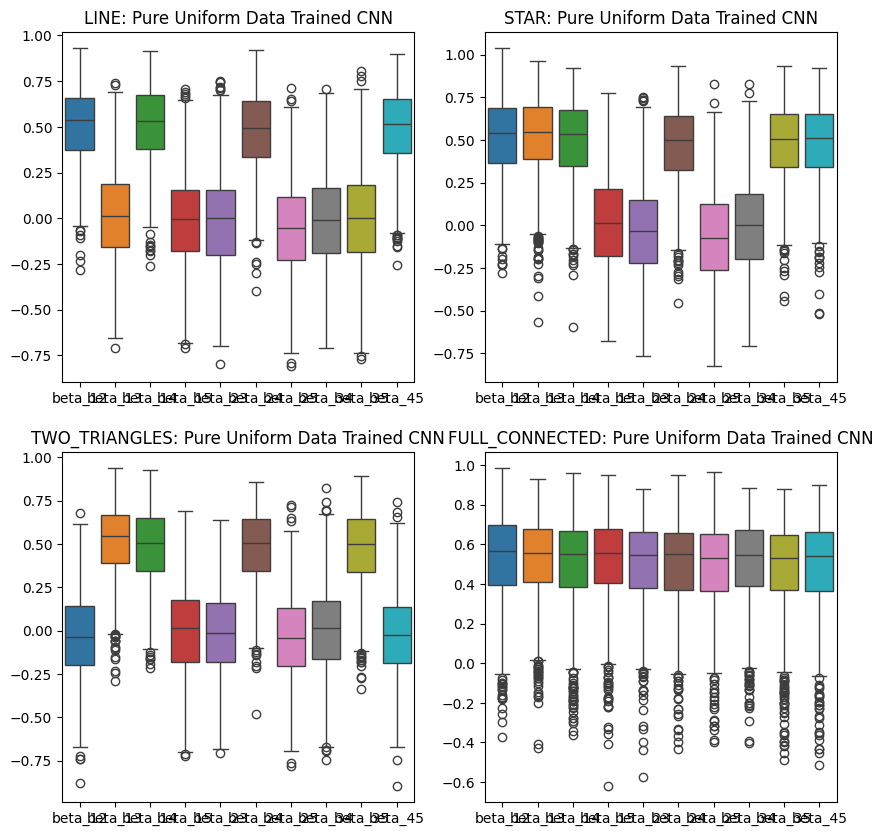

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Pure Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


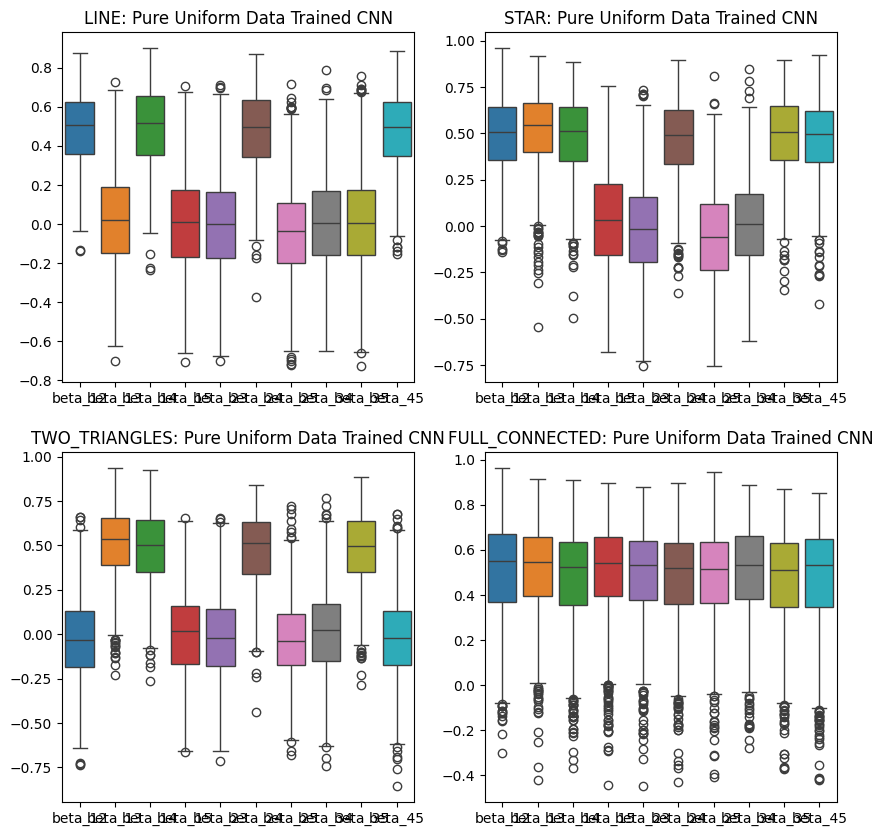

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Pure Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


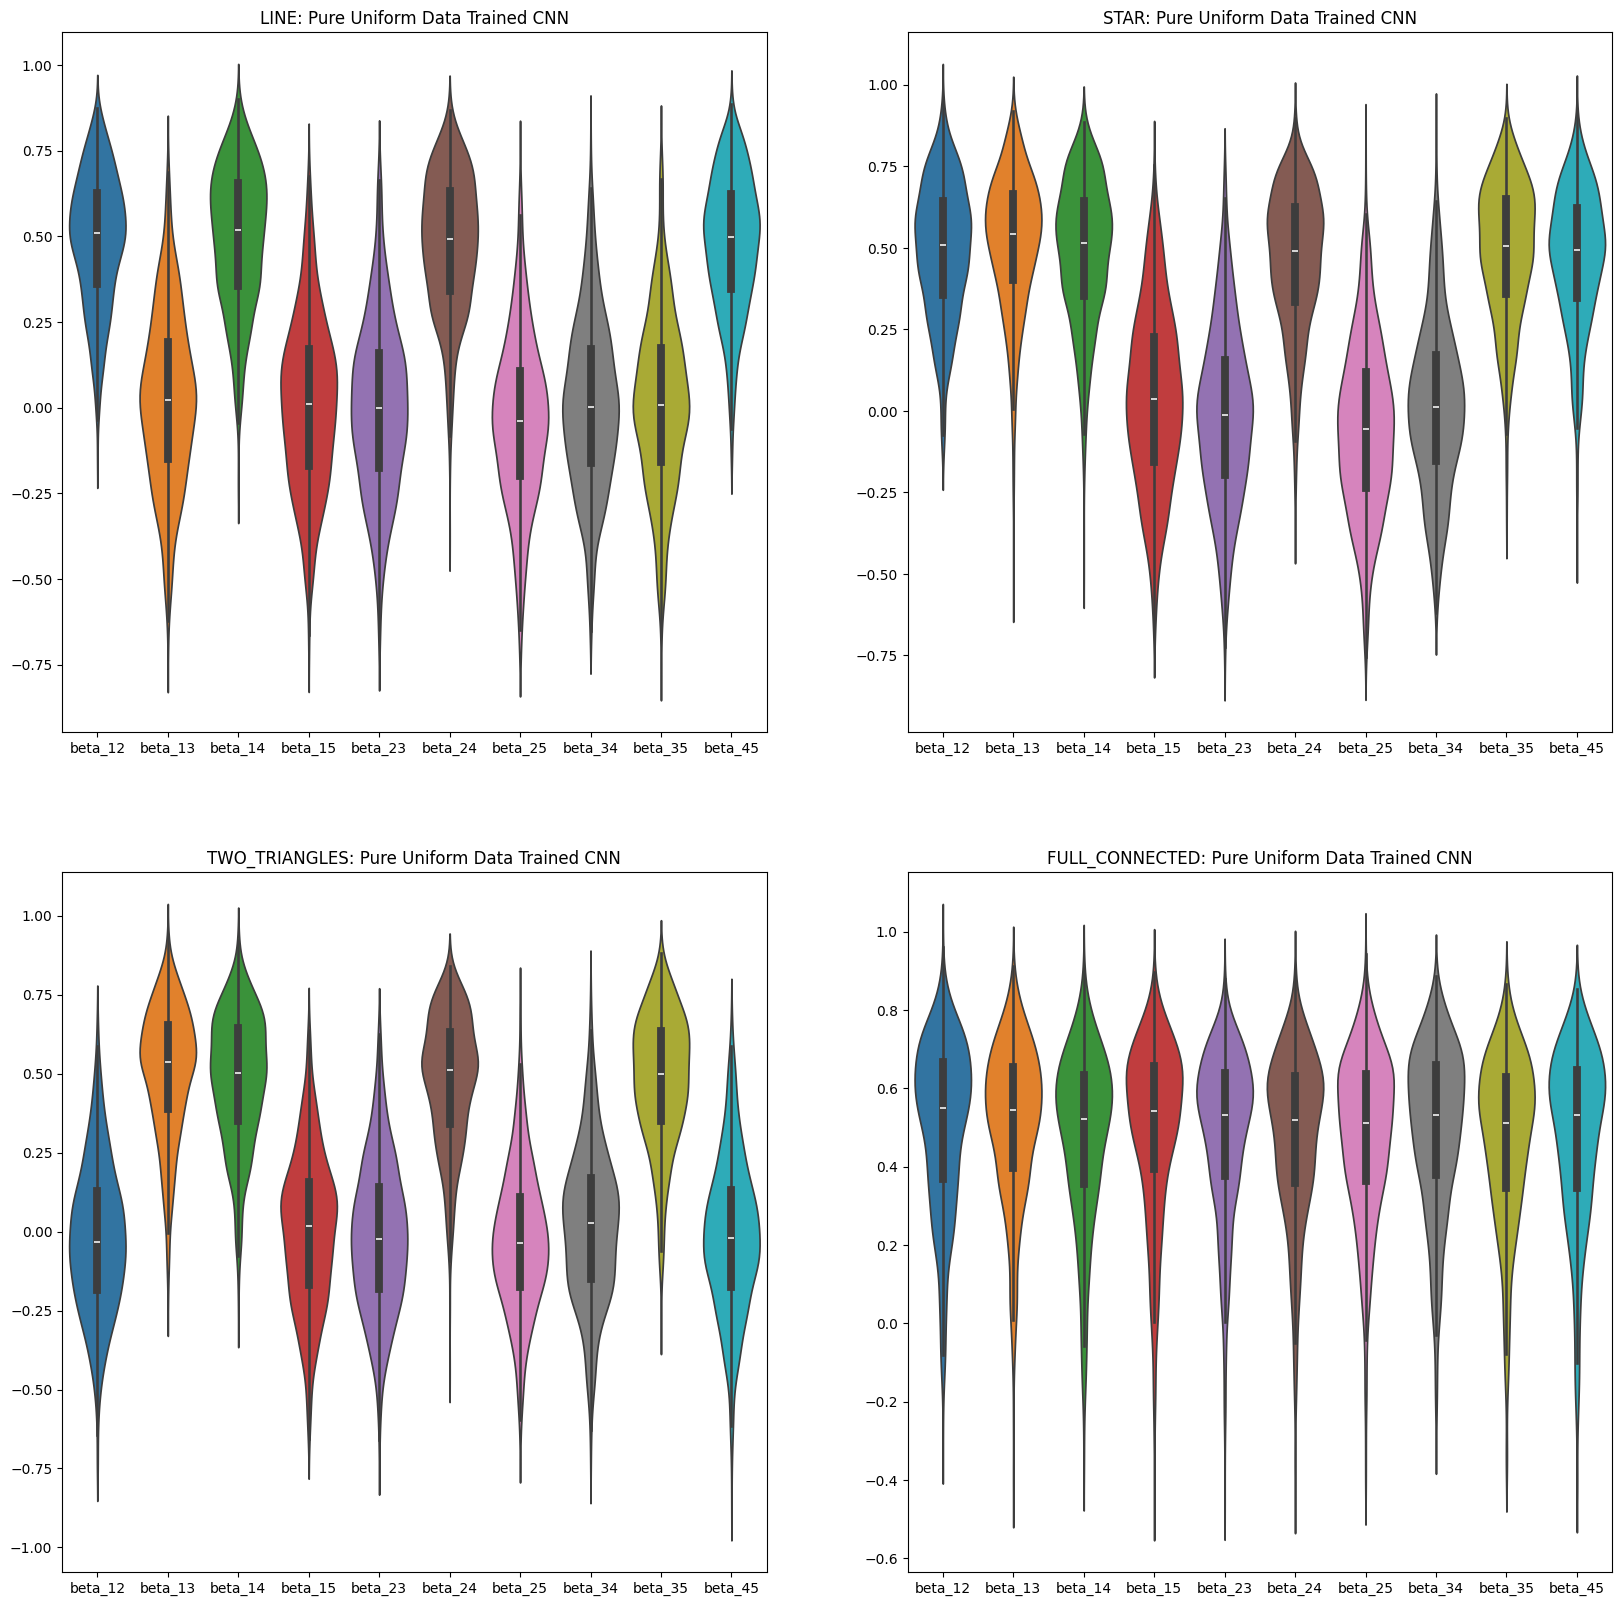

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.violinplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Pure Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


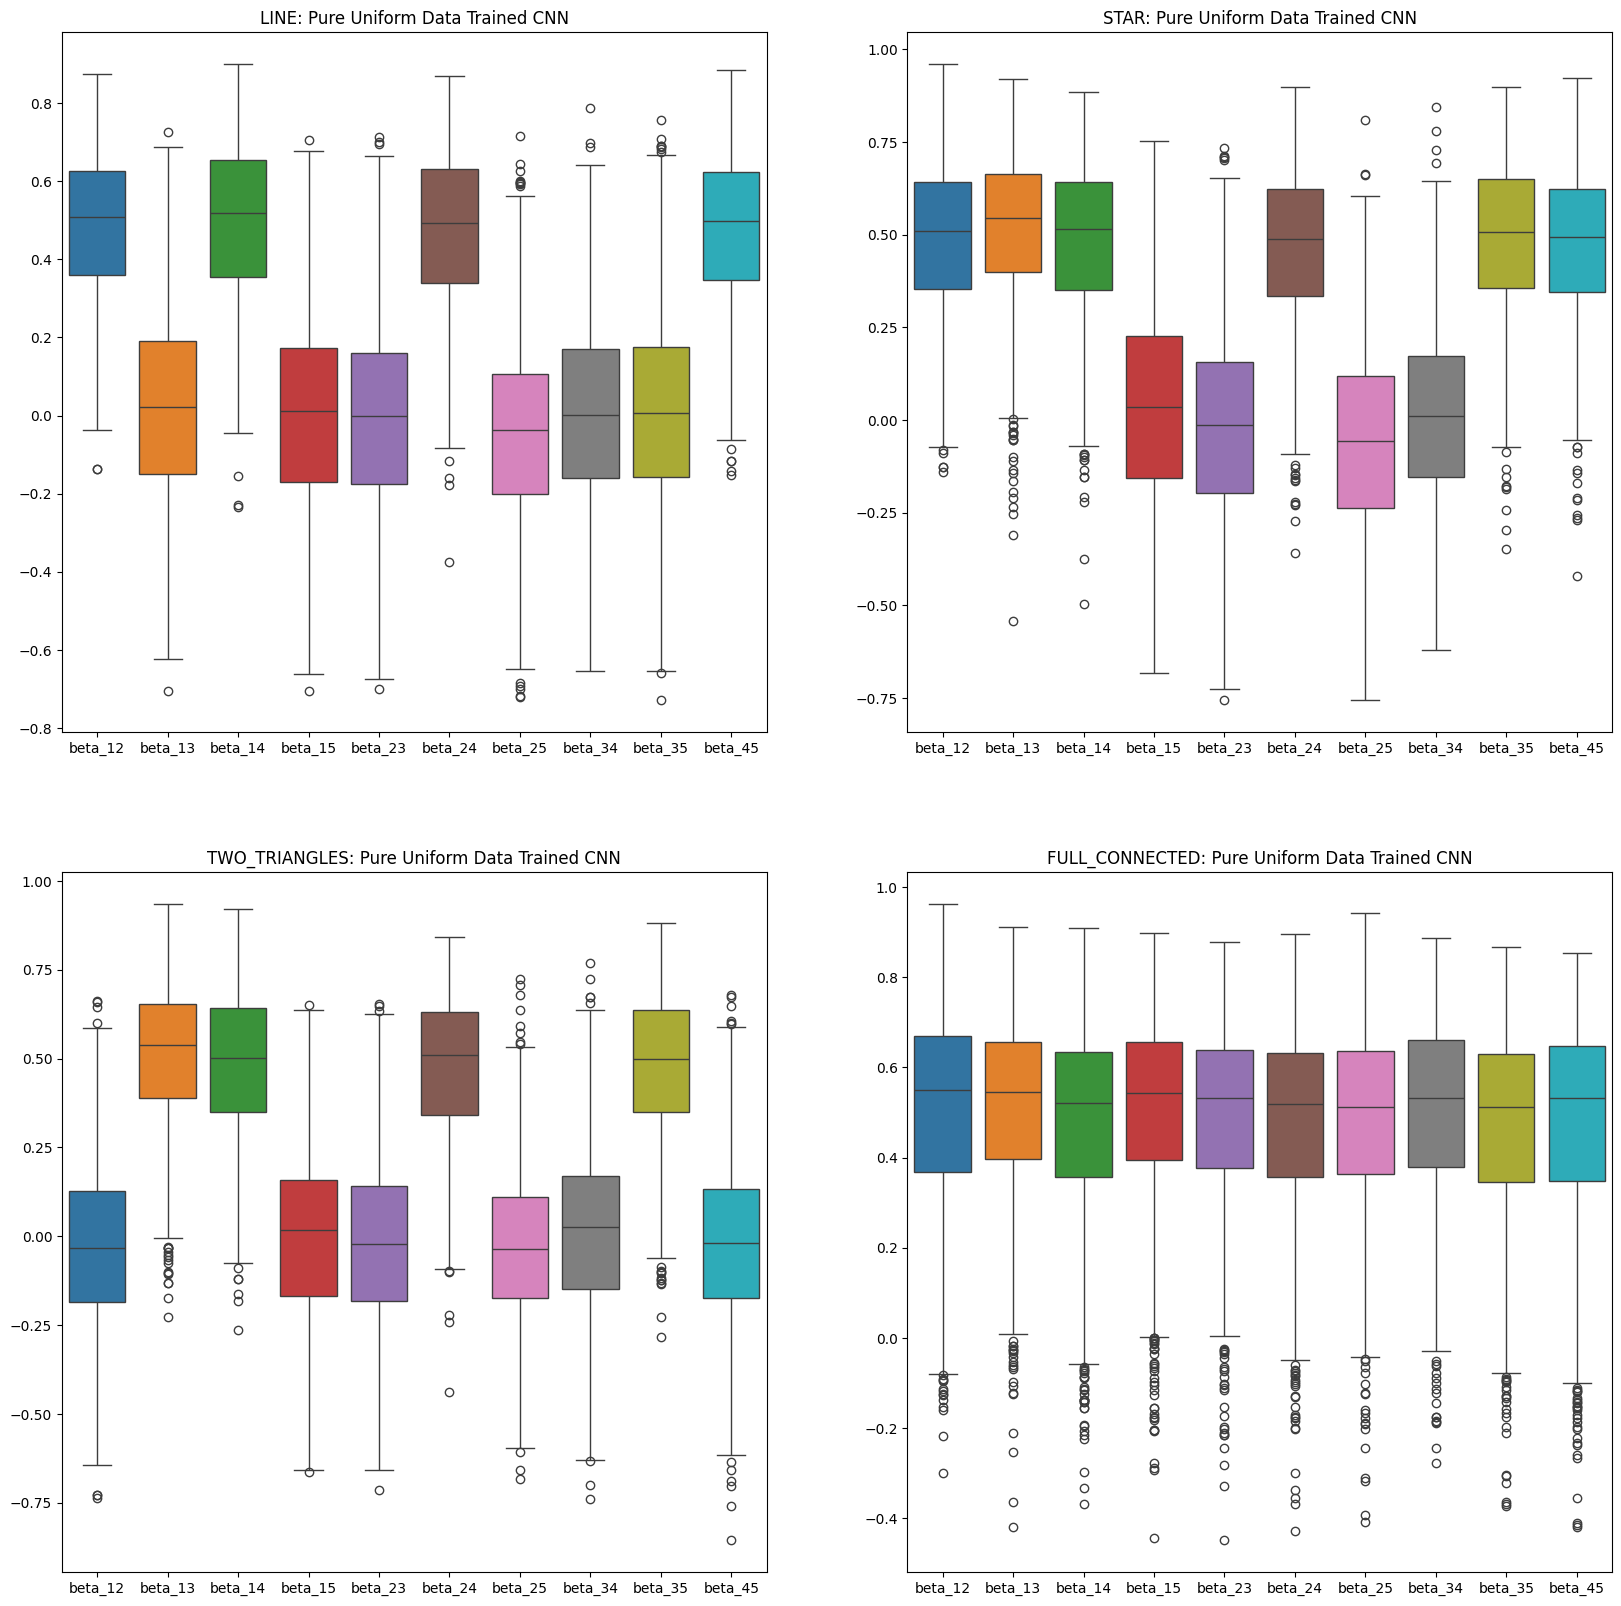

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Pure Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


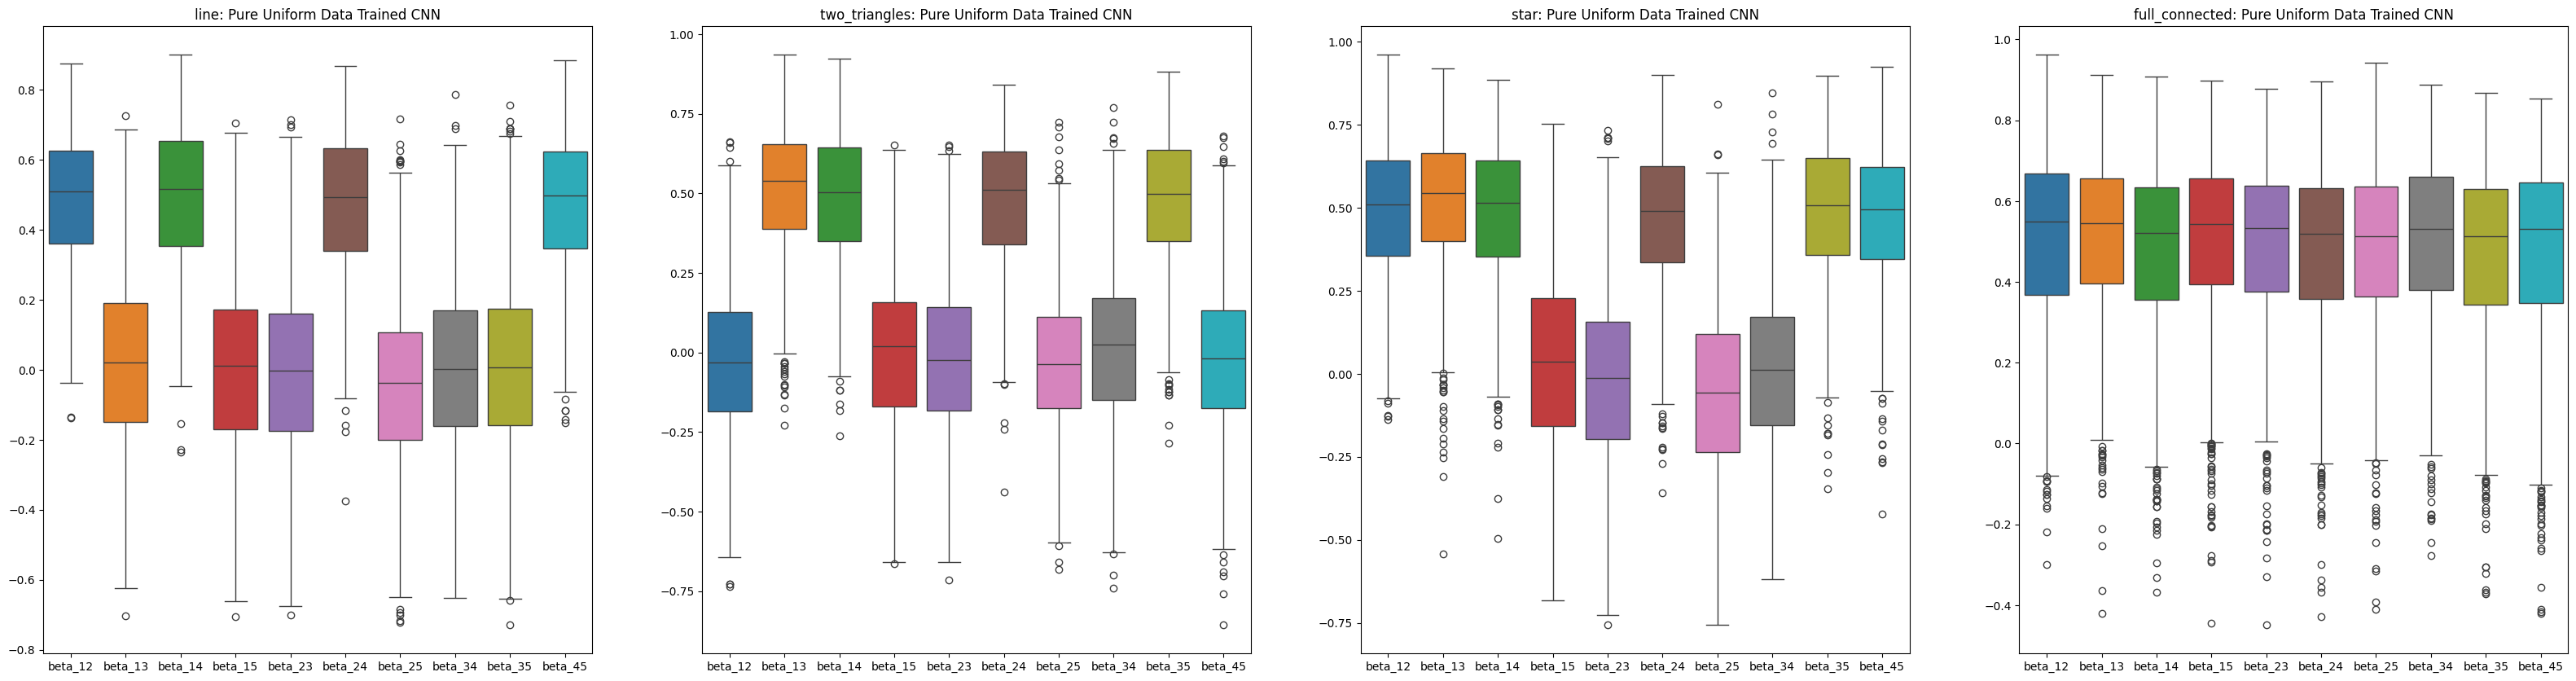

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 4, figsize=(40, 10), sharey=False)
for i in range(4):
    df_to_raw = predictions_array[i]
    df_to_raw.columns = table_columns
    sns.boxplot(df_to_raw, ax=axes[i])
    axes[i].set_title(f'{network_name[i]}: Pure Uniform Data Trained CNN')
# Show the plot
plt.show()


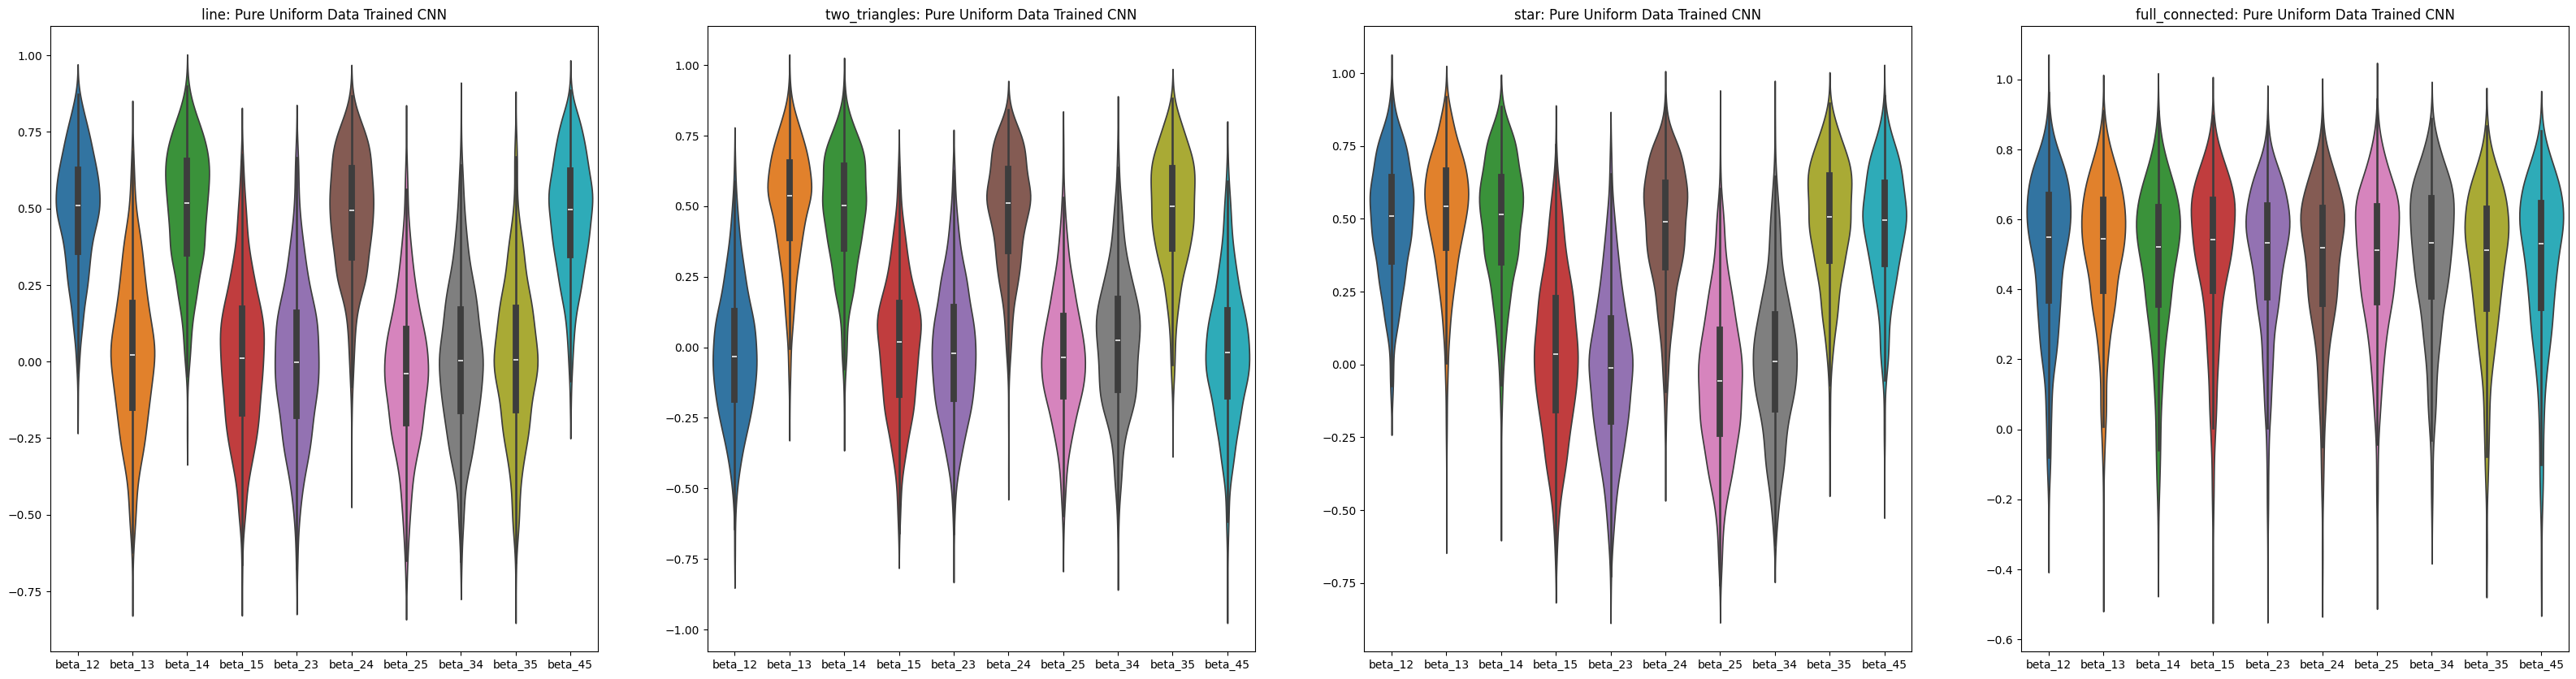

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 4, figsize=(40, 10), sharey=False)
for i in range(4):
    df_to_raw = predictions_array[i]
    df_to_raw.columns = table_columns
    sns.violinplot(df_to_raw, ax=axes[i])
    axes[i].set_title(f'{network_name[i]}: Pure Uniform Data Trained CNN')
# Show the plot
plt.show()


Mixture Uniform Model

In [64]:
# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0
    
predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


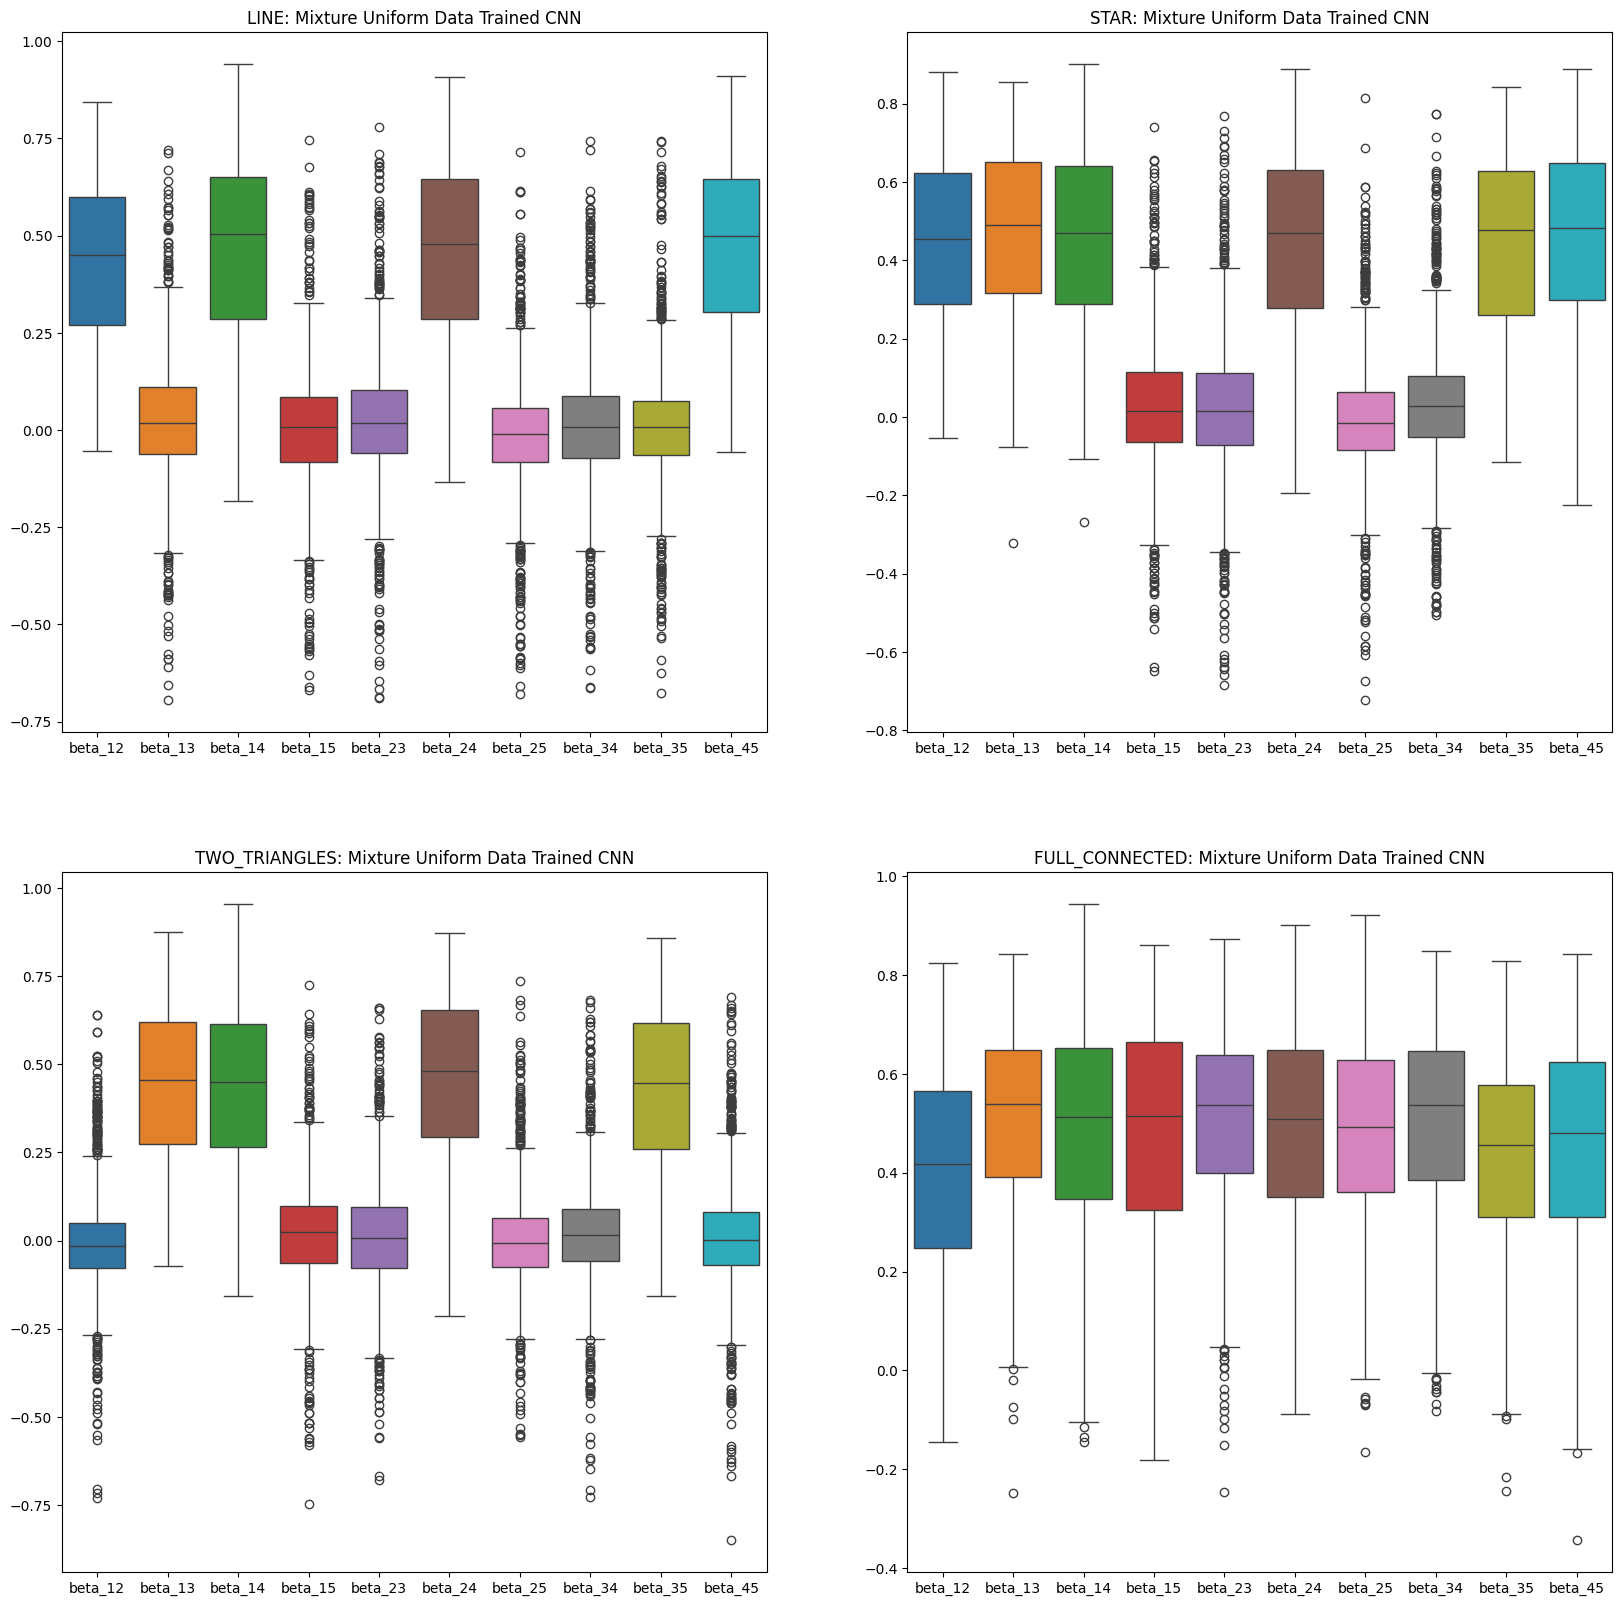

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.boxplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Mixture Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


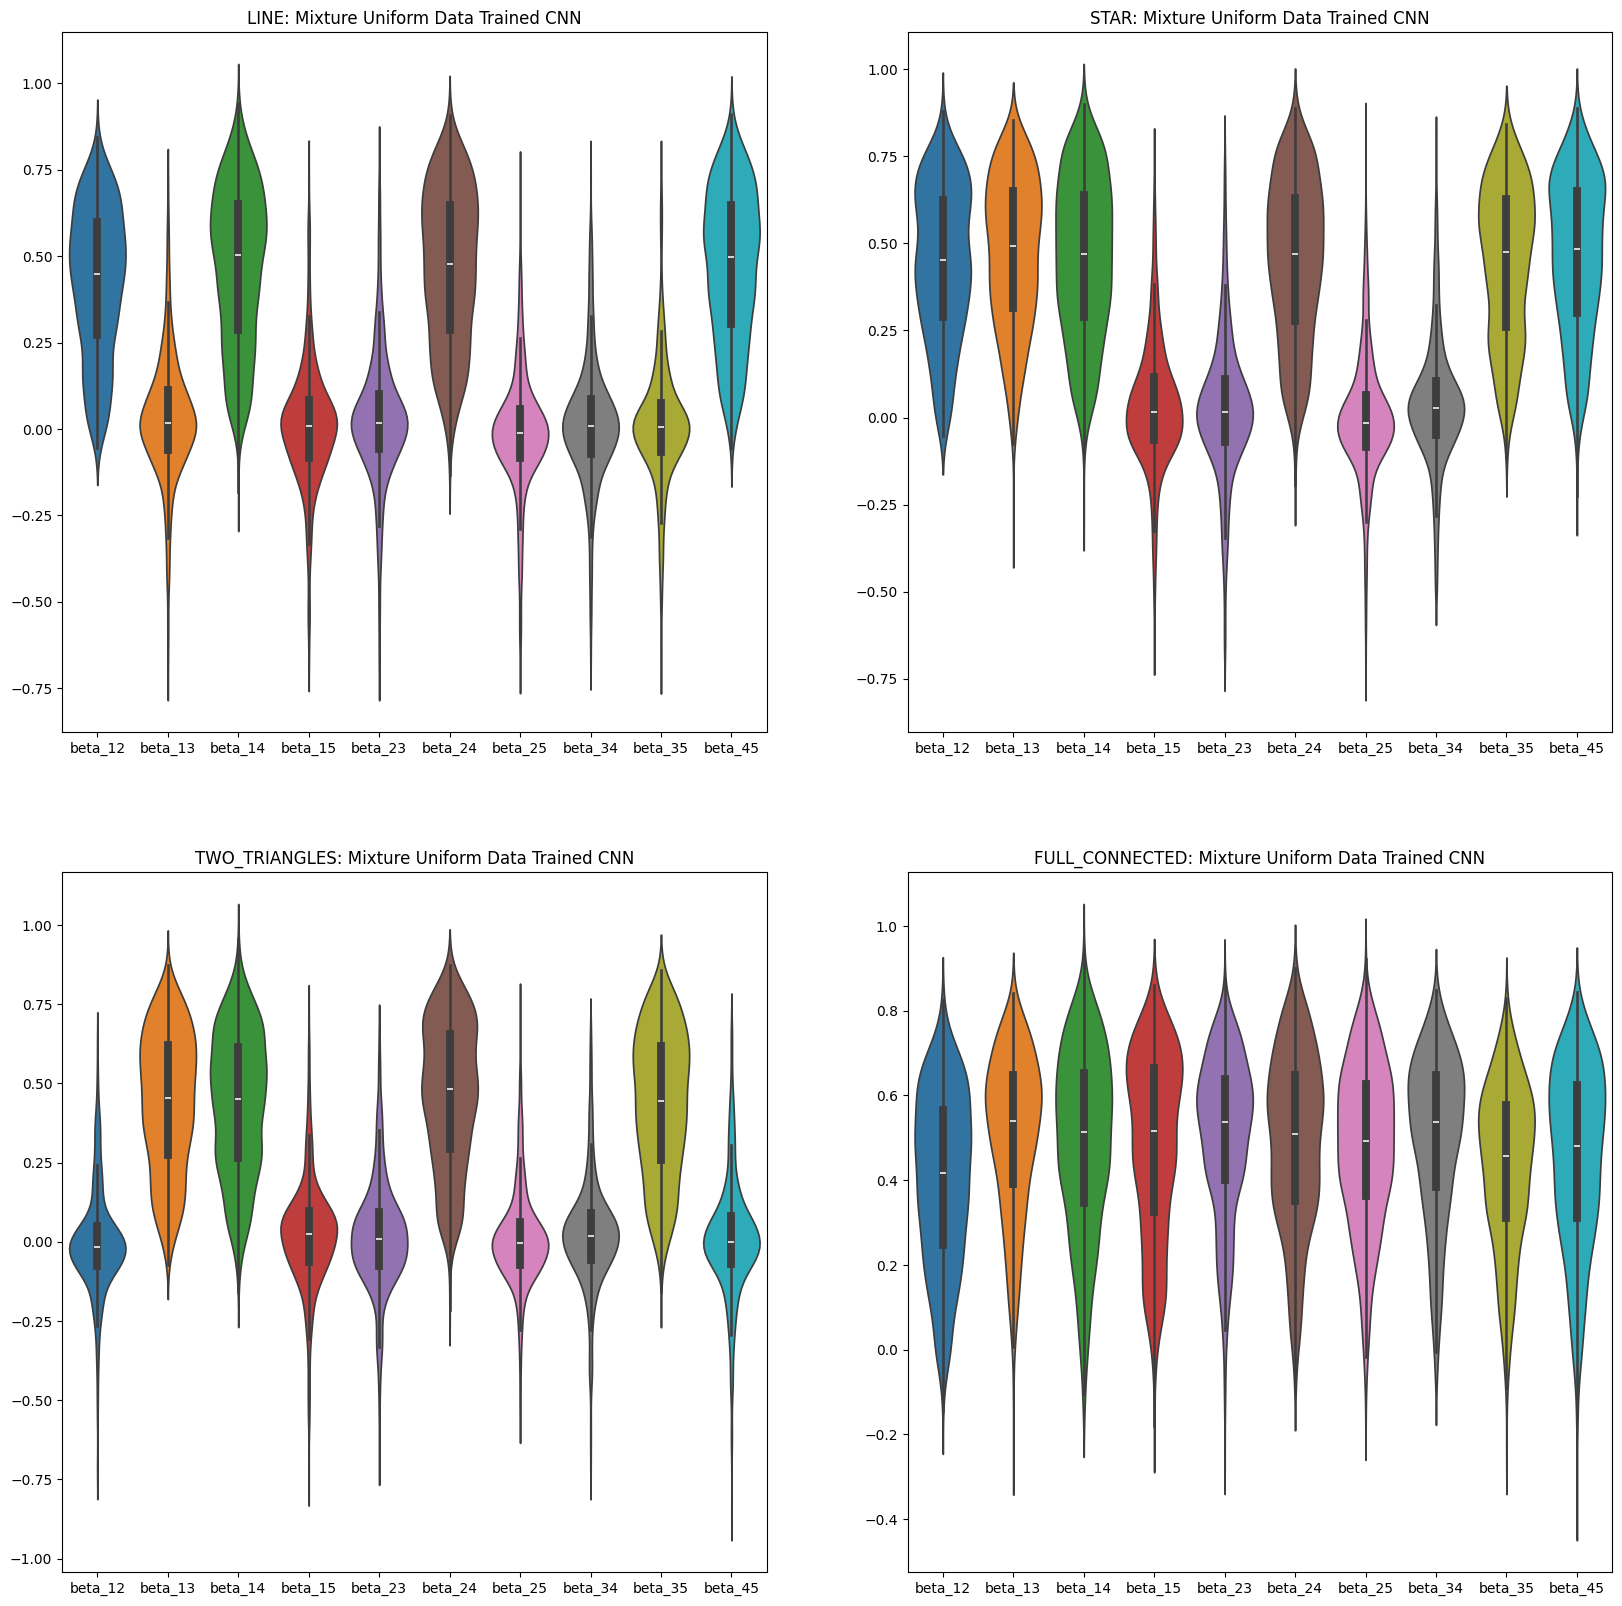

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharey=False)
index = 0
for j in range(2):
    for i in range(2):
        df_to_raw = predictions_array[index]
        df_to_raw.columns = table_columns
        sns.violinplot(df_to_raw, ax=axes[i][j])
        axes[i][j].set_title(f'{network_name[index].upper()}: Mixture Uniform Data Trained CNN')
        index += 1
# Show the plot
plt.show()


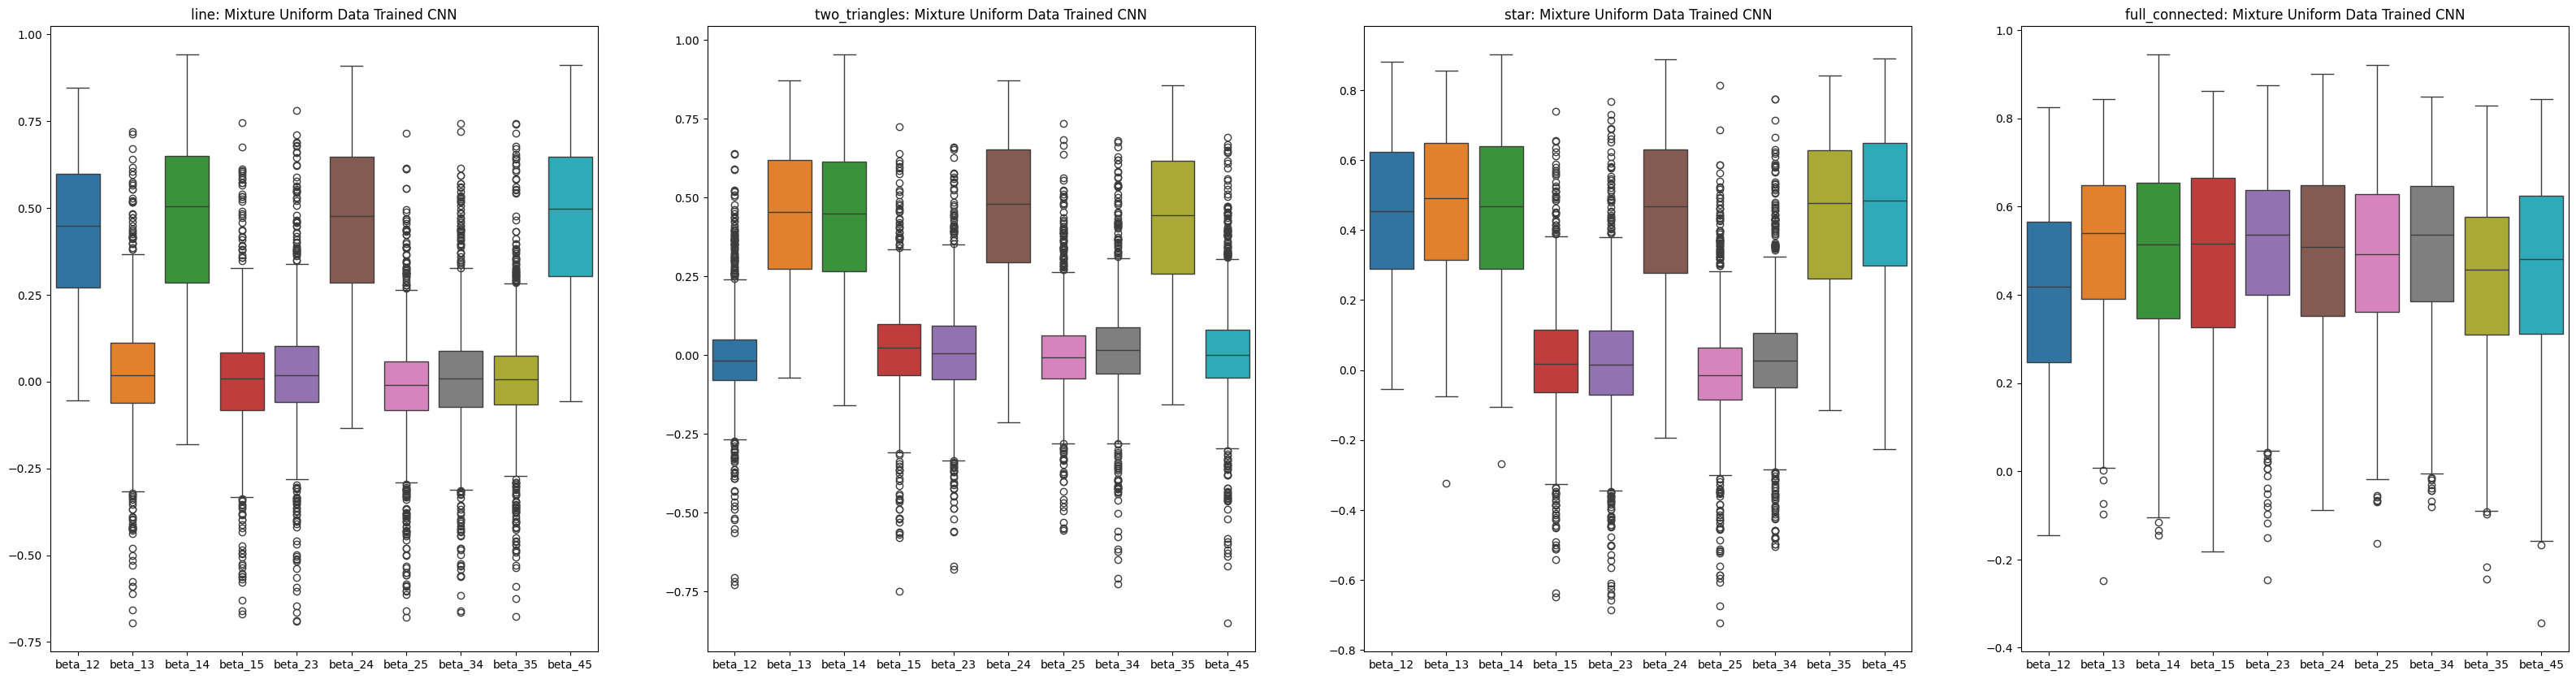

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 4, figsize=(40, 10), sharey=False)
for i in range(4):
    df_to_raw = predictions_array[i]
    df_to_raw.columns = table_columns
    sns.boxplot(df_to_raw, ax=axes[i])
    axes[i].set_title(f'{network_name[i]}: Mixture Uniform Data Trained CNN')
# Show the plot
plt.show()


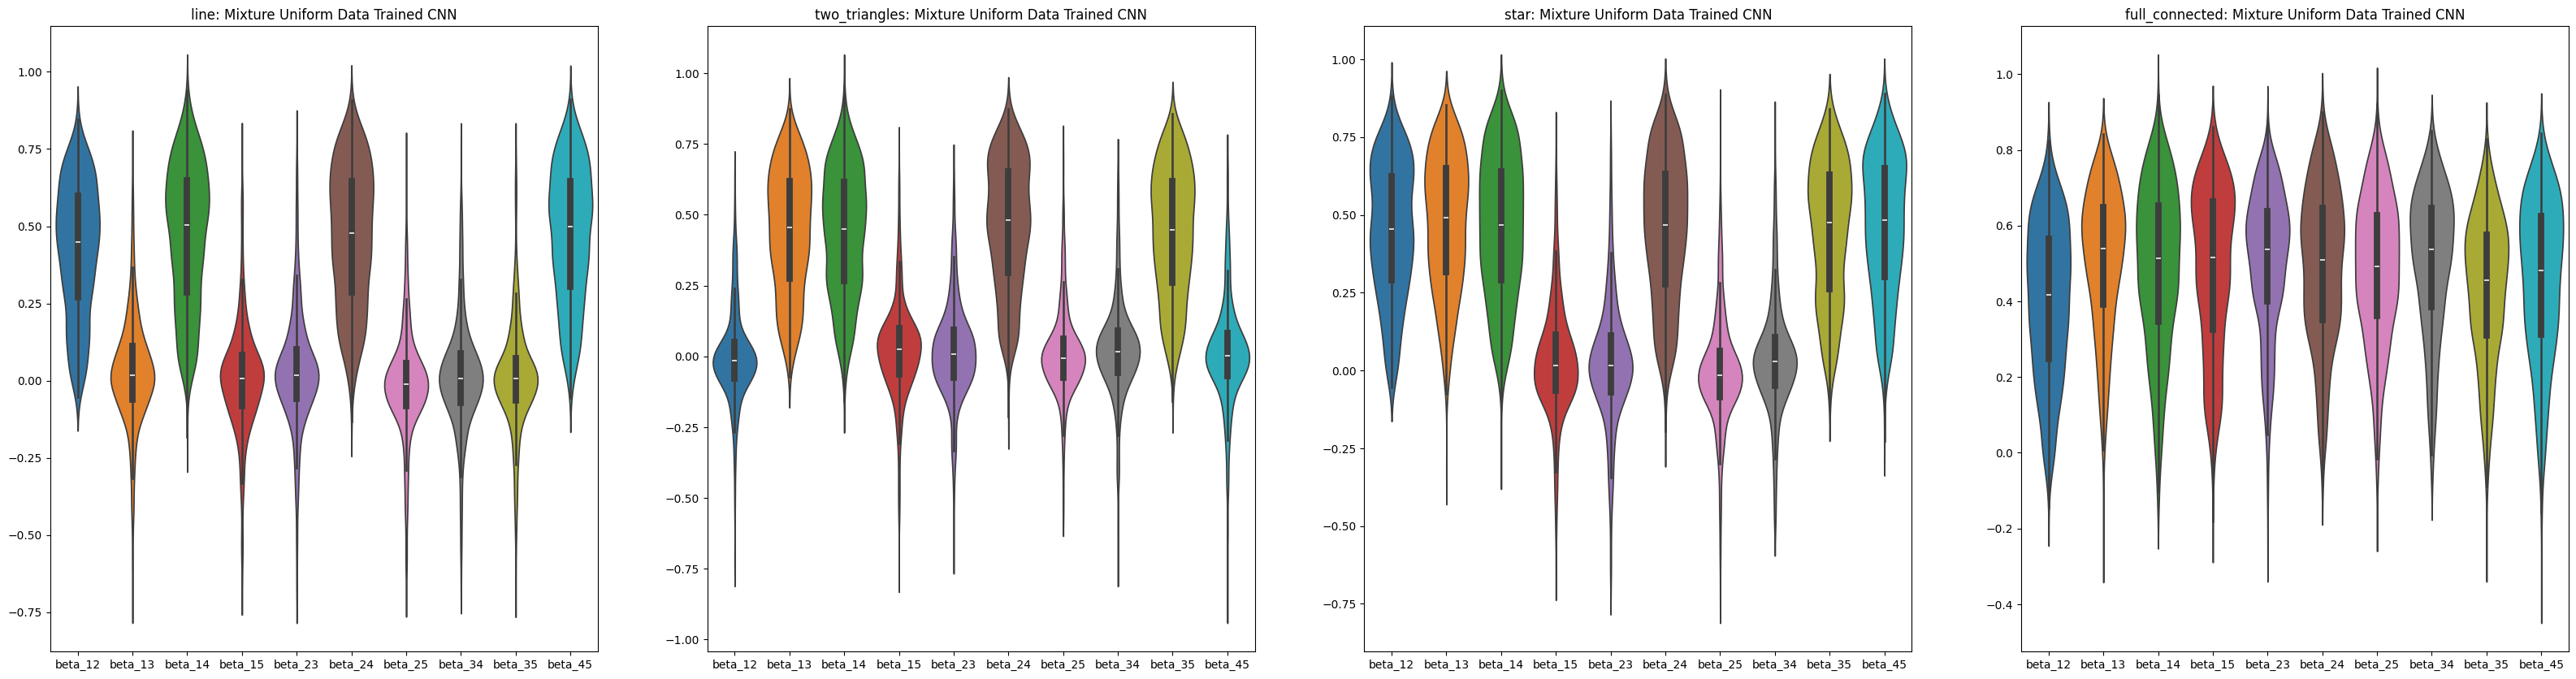

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 4, figsize=(40, 10), sharey=False)
for i in range(4):
    df_to_raw = predictions_array[i]
    df_to_raw.columns = table_columns
    sns.violinplot(df_to_raw, ax=axes[i])
    axes[i].set_title(f'{network_name[i]}: Mixture Uniform Data Trained CNN')
# Show the plot
plt.show()


In [88]:
# df_transposed = (np.abs(estimate_rates / (estimate_SE)) > z).T

# # Concatenate rows into a single row
# merged_row = df_transposed.apply(lambda x: ','.join(x.astype(str)), axis=1).str.cat(sep=',')

# # Create a new DataFrame from the merged row
# new_df = pd.DataFrame([merged_row.split(',')]).T

# new_df

In [37]:
z = 1
predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
(predictions_edge == (truth_rates*2 == 1)).sum() / 800

V11    0.73125
V12    0.72250
V13    0.81375
V14    0.54750
V15    0.55375
V16    0.82125
V17    0.53250
V18    0.52375
V19    0.70375
V20    0.72875
dtype: float64

In [39]:
z = 1.04
predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
truth_edge = pd.melt((truth_rates*2 == 1))
predictions_edge = pd.melt(predictions_edge)
conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate sensitivity and specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
print(f" Accuracy {(TP + TN) / 8000} TP {TP / 8000} True Positive Rate {round(sensitivity,2)} False Positive Rate {round(1 - specificity,2)}")

 Accuracy 0.671125 TP 0.46575 True Positive Rate 0.78 False Positive Rate 0.49


In [60]:
len(predictions_edge)

4000

In [15]:
truth_rates = pd.read_csv("/home/eeepc/Documents/random_tree/code_base/test_data/prediction/line_2/rates_data (1).csv")

In [17]:
truth_rates = truth_rates.iloc[:, 10:]

In [20]:
len(line_2_estP)

40

In [22]:
predictions_edge = np.abs(line_2_estP.iloc / (line_2_ses)) > z
truth_edge = pd.melt(truth_rates*2)
predictions_edge = pd.melt(predictions_edge)

In [26]:
line_2_ses

V1        V2        V3        V4        V5        V6        V7  \
0   0.622931  0.596597  0.506125  0.503935  0.213847  0.581632  0.657402   
1   0.455417  0.620424  0.215241  0.245649  0.391737  0.383519  0.394098   
2   0.217260  0.272264  0.308354  0.238822  0.473646  0.168832  0.254462   
3   0.380569  0.272882  0.224537  0.404864  0.272092  0.336649  0.278778   
4   0.269206  0.333547  0.287643  0.609039  0.246964  0.340290  0.250121   
5   0.484810  0.551426  0.232693  0.266671  0.260581  0.493259  0.316231   
6   0.351865  0.532222  0.356290  0.506804  0.214670  0.340656  0.508650   
7   0.222578  0.302402  0.228973  0.220872  0.229622  0.219576  0.287100   
8   0.360499  0.395872  0.263439  0.263147  0.333011  0.381226  0.354652   
9   0.227495  0.436766  0.306675  0.250767  0.592503  0.239978  0.386878   
10  0.258561  0.257495  0.249228  0.431528  0.283024  0.245567  0.294898   
11  0.461705  0.306132  0.298482  0.272836  0.273589  0.453369  0.215289   
12  0.297992  0.236327  0.241979  0.328818  0.446534  0.316554  0.205875   
13  0.469162  0.255024  0.347941  0.288221  0.282853  0.485789  0.293599   
14  0.238361  0.652542  0.234644  0.380858  0.350298  0.340655  0.630973   
15  0.296330  0.335332  0.345778  0.290369  0.216924  0.256275  0.291849   
16  0.228625  0.287301  0.343095  0.282341  0.262131  0.254824  0.256006   
17  0.268209  0.612530  0.243179  0.287092  0.330323  0.321228  0.270311   
18  0.280733  0.355121  0.333095  0.274064  0.325038  0.261720  0.223138   
19  0.322914  0.222651  0.234218  0.274626  0.216437  0.286162  0.221011   
20  0.226213  0.321007  0.227095  0.243950  0.230316  0.174505  0.223183   
21  0.265027  0.231867  0.286368  0.530073  0.262536  0.365052  0.382812   
22  0.355546  0.271230  0.260015  0.250181  0.278164  0.334296  0.282246   
23  0.249129  0.249452  0.235798  0.377406  0.237217  0.193265  0.276189   
24  0.284560  0.259421  0.326308  0.289619  0.255441  0.314700  0.219034   
25  0.327817  0.264037  0.402937  0.219122  0.254175  0.297802  0.163184   
26  0.334947  0.272959  0.218217  0.633941  0.395317  0.373384  0.451725   
27  0.244113  0.256900  0.226130  0.230439  0.249211  0.276642  0.168917   
28  0.228996  0.494594  0.252654  0.282296  0.385280  0.172776  0.506218   
29  0.223106  0.622294  0.358934  0.290310  0.247337  0.301830  0.560007   
30  0.300134  0.340568  0.274953  0.452694  0.218255  0.220775  0.311220   
31  0.221895  0.247410  0.406988  0.297685  0.217937  0.211361  0.233765   
32  0.234697  0.324429  0.478712  0.292773  0.206451  0.240324  0.293488   
33  0.255221  0.242498  0.249986  0.597484  0.412955  0.402496  0.259216   
34  0.250958  0.207252  0.460246  0.348185  0.256344  0.307515  0.255321   
35  0.361315  0.282311  0.318491  0.472312  0.255378  0.388238  0.369269   
36  0.273647  0.255555  0.488808  0.315063  0.205420  0.274090  0.214574   
37  0.263736  0.296254  0.248884  0.465676  0.352522  0.337109  0.405501   
38  0.315326  0.461215  0.257346  0.583413  0.771016  0.461725  0.389954   
39  0.644521  0.339253  0.377544  0.280341  0.292149  0.593328  0.339442   

          V8        V9       V10       V11       V12       V13       V14  \
0   0.510274  0.404788  0.348507  0.299042  0.293673  0.411458  0.242700   
1   0.310282  0.349117  0.371200  0.345964  0.187742  0.228456  0.183548   
2   0.309290  0.232679  0.327462  0.124470  0.117671  0.155347  0.115502   
3   0.238724  0.362916  0.227330  0.167881  0.155687  0.139624  0.189750   
4   0.273536  0.484851  0.200476  0.133418  0.171232  0.146703  0.241272   
5   0.286697  0.289536  0.236523  0.217974  0.171387  0.202827  0.178079   
6   0.314060  0.508102  0.280844  0.162901  0.158647  0.180819  0.171505   
7   0.179496  0.162733  0.152985  0.169942  0.120586  0.138666  0.126311   
8   0.343101  0.295826  0.282705  0.239658  0.240454  0.277888  0.203427   
9   0.272311  0.178185  0.554999  0.150848  0.150873  0.149025  0.118033   
10  0.306222  0.359474  0.156350  0.130678  0.147379  0.1

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED
LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


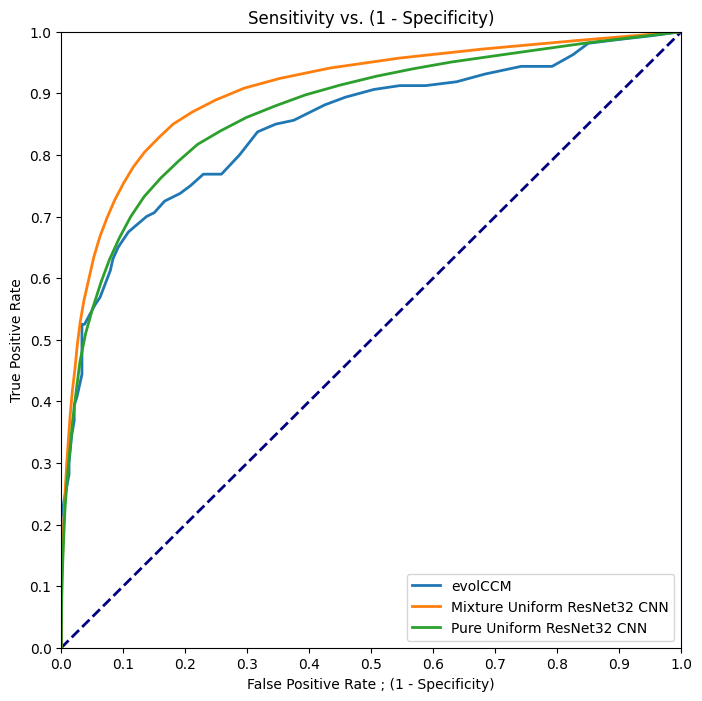

In [29]:

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(line_2_estP.iloc[:, 10:] / (line_2_ses.iloc[:, 10:])) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [41]:
estimate_rates

V11       V12       V13       V14       V15       V16       V17  \
0    0.528499  0.356739 -0.345696 -0.007213 -0.387178  0.620403  0.410376   
1   -0.127052 -0.158619  0.522661  0.165475 -0.182462  0.416557  0.729063   
2    0.435413  0.051670  0.467879 -0.129537  0.425651  0.169634 -0.060007   
3    0.885594  0.147639  0.376654 -0.737437  0.634004  0.521029 -0.207403   
4    0.611252  0.236086  0.640923 -0.096747  0.259988  1.126209 -0.008951   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.849281  0.384532  1.418201  0.750781  0.927727 -0.042501  0.599771   
196  0.712155  0.772080  0.377688  0.352801  0.254951  0.960761  0.132205   
197  0.439333  0.317599  0.316861  0.763294  1.269864  0.898085  0.237894   
198  0.905064  1.023171  0.420170 -0.273568  0.570840  1.212443  0.982446   
199  1.189895 -0.248015  0.441436  0.950562 -0.084373  0.434227  0.431785   

          V18       V19       V20  
0    0.056278  0.029099  0.686946  
1    0.241241  0.211033  0.238515  
2   -0.656576  0.517728  0.238489  
3   -0.429986  0.390404  0.802906  
4    0.062426 -0.200535  0.591685  
..        ...       ...       ...  
195  0.685575  0.687832 -0.005593  
196  0.770391  0.258504  0.538544  
197  0.466072  0.557581  1.104045  
198  0.813205  0.080339  0.482754  
199  0.309199  0.550804  0.802744  

[800 rows x 10 columns]

In [56]:
len(estimate_rates)

400

In [78]:
(estimate_rates.iloc[0:300] / (estimate_SE.iloc[0:300, ]) > 0.9).sum().sum() / 3000

0.5233333333333333

In [75]:
(estimate_rates.iloc[300:400] / (estimate_SE.iloc[300:400, ]) > 1).sum().sum() / 1000

0.525

In [102]:
y_axis

[variable    1.0
 value       1.0
 dtype: float64,
 variable    1.0000
 value       0.9625
 dtype: float64,
 variable    1.00
 value       0.93
 dtype: float64,
 variable    1.000
 value       0.889
 dtype: float64,
 variable    1.000
 value       0.848
 dtype: float64,
 variable    1.0000
 value       0.8185
 dtype: float64,
 variable    1.0000
 value       0.7835
 dtype: float64,
 variable    1.0000
 value       0.7515
 dtype: float64,
 variable    1.0000
 value       0.7095
 dtype: float64,
 variable    1.0000
 value       0.6655
 dtype: float64,
 variable    1.000
 value       0.635
 dtype: float64,
 variable    1.0000
 value       0.6035
 dtype: float64,
 variable    1.0000
 value       0.5685
 dtype: float64,
 variable    1.000
 value       0.534
 dtype: float64,
 variable    1.0000
 value       0.5045
 dtype: float64,
 variable    1.0000
 value       0.4775
 dtype: float64,
 variable    1.0000
 value       0.4525
 dtype: float64,
 variable    1.0000
 value       0.4305
 dtype: f

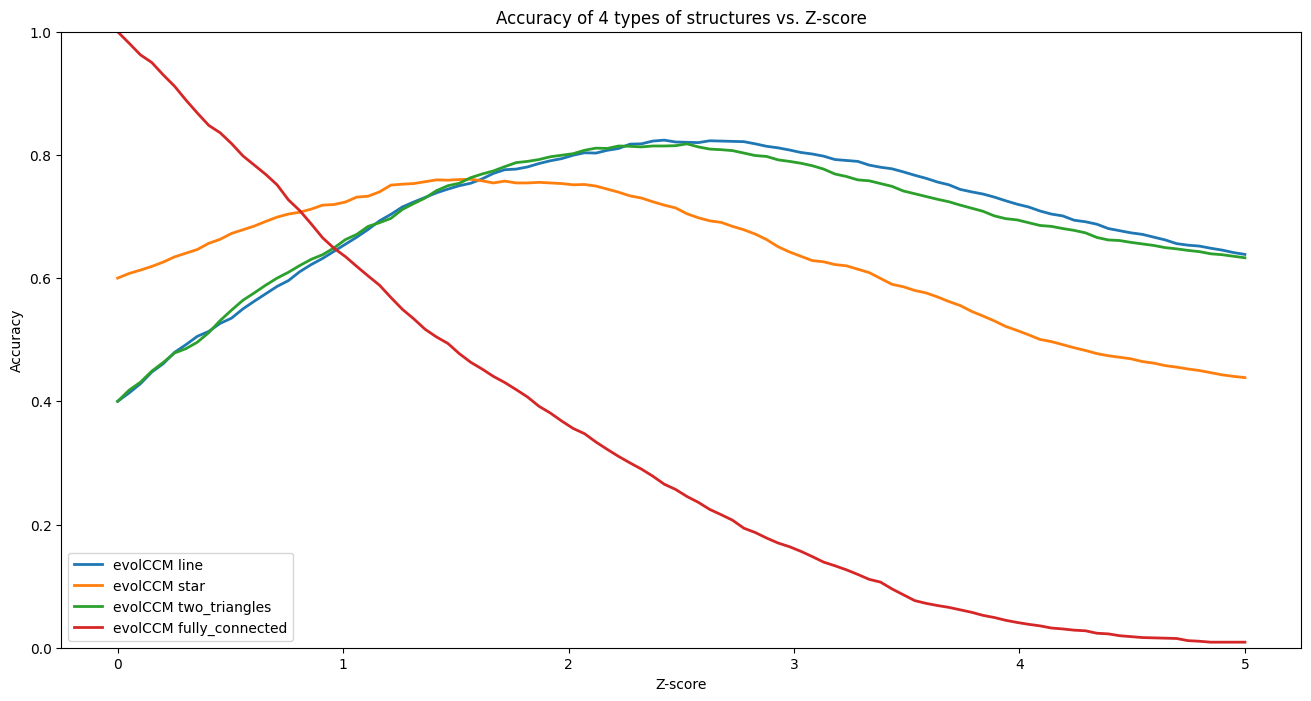

In [117]:

plt.figure(figsize=(16, 8))

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23]
z_score = np.linspace(0, 5, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
# z_score = np.linspace(0, 10, 100)
shape_index = 0



for type_i in range(4):
    start_index = type_i * 200
    type_of_network = type_i * 200 + 200
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(estimate_rates.iloc[start_index:type_of_network, ] / (estimate_SE.iloc[start_index:type_of_network, ])) > z
        truth_edge = pd.melt(truth_rates.iloc[start_index:type_of_network, ] *2)
        predictions_edge = pd.melt(predictions_edge)
        # Plot ROC curve
        x_axis.append(z)
        y_axis.append((predictions_edge.iloc[:, 1] == truth_edge.iloc[:, 1]).sum() / len(predictions_edge))

        # if np.round(z,2) == 1.92:
        #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {network_all_types[type_i]}')


plt.xlabel('Z-score')
plt.ylabel('Accuracy')
plt.title(f'Accuracy of 4 types of structures vs. Z-score')
plt.legend(loc='lower left')
# plt.yticks(np.arange(0, 1.01, step=0.1))
# plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()

In [120]:
len(predictions)

4000

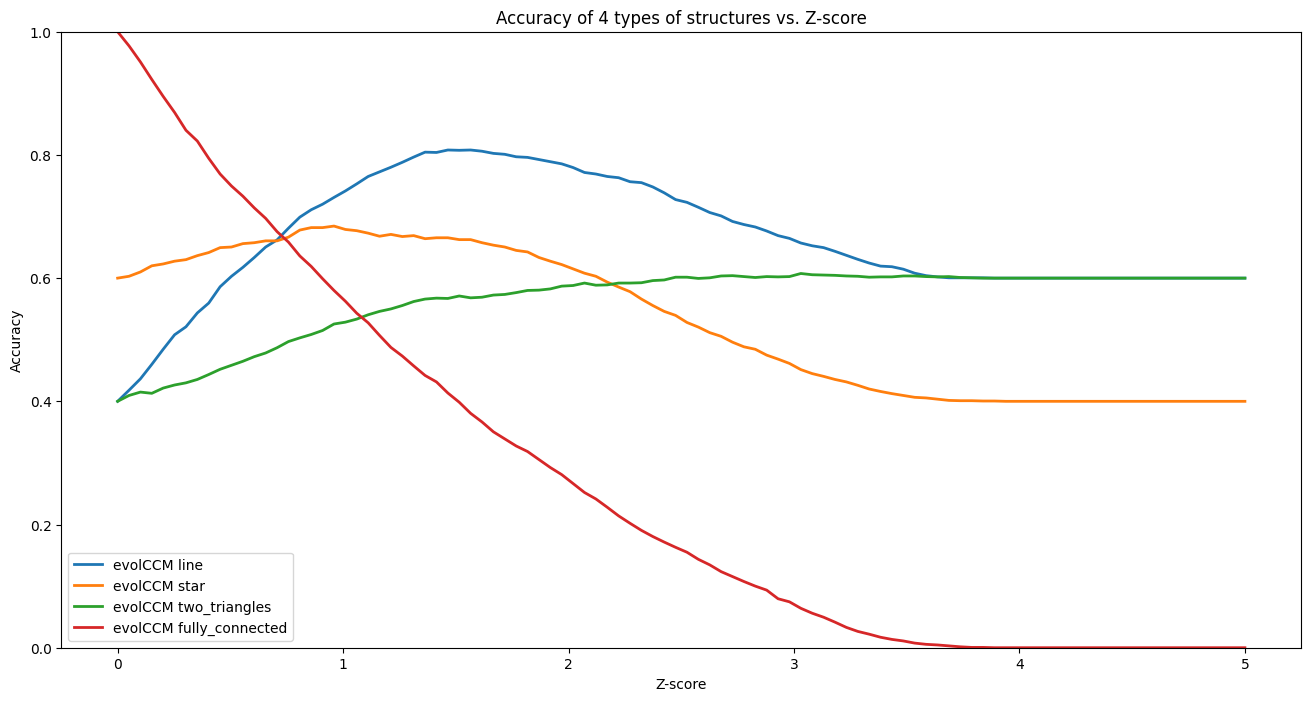

In [118]:

plt.figure(figsize=(16, 8))

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23]
z_score = np.linspace(0, 5, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
# z_score = np.linspace(0, 10, 100)
shape_index = 0



for type_i in range(4):
    start_index = type_i * 200
    type_of_network = type_i * 200 + 200
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(predictions.iloc[start_index:type_of_network, ] / SEs_df_mle) > z
        truth_edge = pd.melt(truth_rates.iloc[start_index:type_of_network, ] *2)
        predictions_edge = pd.melt(predictions_edge)
        # Plot ROC curve
        x_axis.append(z)
        y_axis.append((predictions_edge.iloc[:, 1] == truth_edge.iloc[:, 1]).sum() / len(predictions_edge))

        # if np.round(z,2) == 1.92:
        #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {network_all_types[type_i]}')


plt.xlabel('Z-score')
plt.ylabel('Accuracy')
plt.title(f'Accuracy of 4 types of structures vs. Z-score')
plt.legend(loc='lower left')
# plt.yticks(np.arange(0, 1.01, step=0.1))
# plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


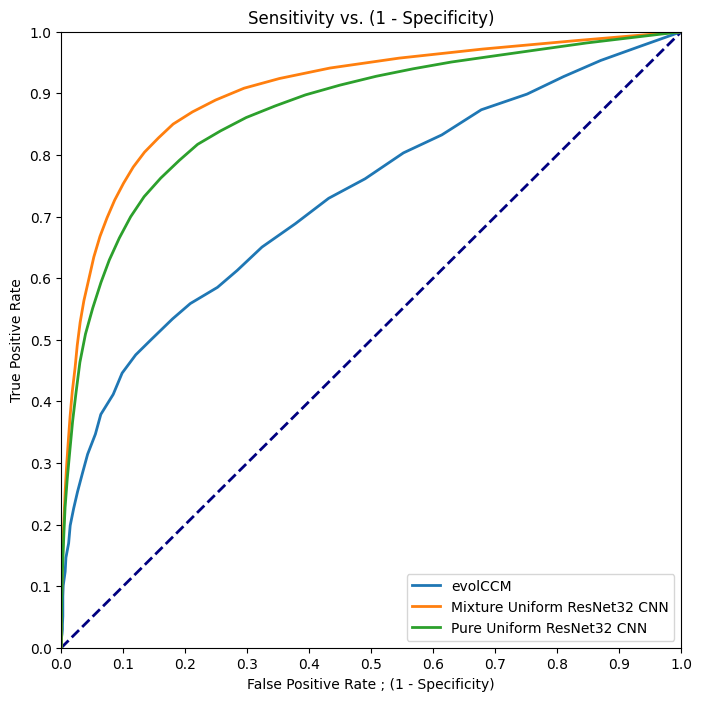

In [63]:

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

start_index = 0
type_of_network = 600

for z in z_score:
    predictions_edge = np.abs(estimate_rates.iloc[start_index:type_of_network, ] / (estimate_SE.iloc[start_index:type_of_network, ])) > z
    truth_edge = pd.melt(truth_rates.iloc[start_index:type_of_network, ] *2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [64]:
len(estimate_rates)

400

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED
LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


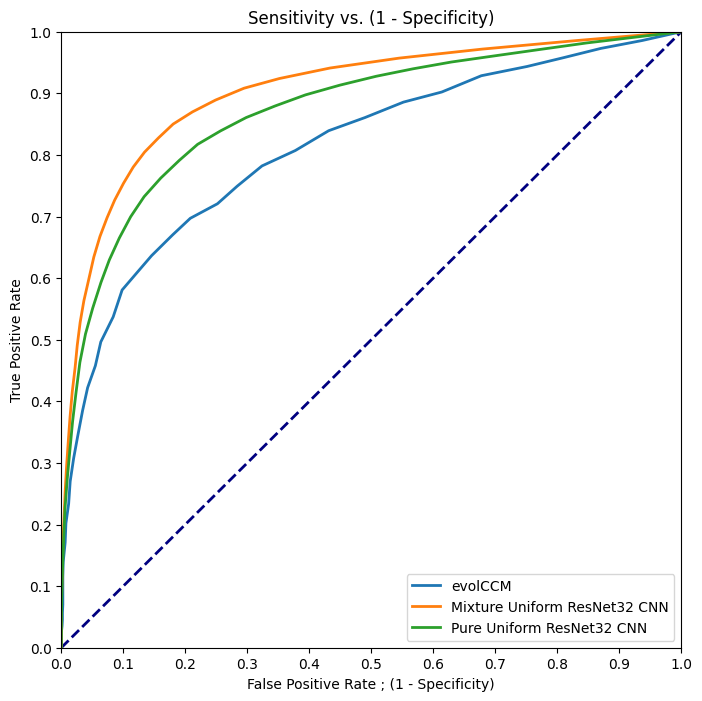

In [65]:

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

start_index = 0
type_of_network = 300

for z in z_score:
    predictions_edge = np.abs(estimate_rates.iloc[start_index:type_of_network, ] / (estimate_SE.iloc[start_index:type_of_network, ])) > z
    truth_edge = pd.melt(truth_rates.iloc[start_index:type_of_network, ] *2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


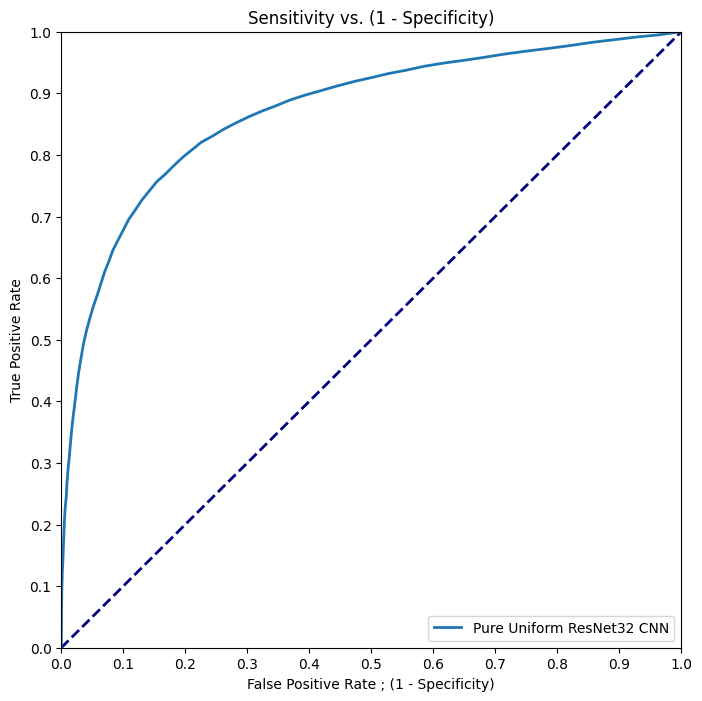

In [173]:

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# # z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
# z_score = np.linspace(0, 10, 100)
# shape_index = 0
# x_axis = []
# y_axis = []

# for z in z_score:
#     predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
#     truth_edge = pd.melt(truth_rates*2)
#     predictions_edge = pd.melt(predictions_edge)
#     conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
#     # Extract values from the confusion matrix
#     TN, FP, FN, TP = conf_matrix.ravel()

#     # Calculate sensitivity and specificity
#     sensitivity = TP / (TP + FN)
#     specificity = TN / (TN + FP)
#     # Calculate ROC curve
#     fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

#     # Calculate Area Under the Curve (AUC)
#     roc_auc = auc(fpr, tpr)

#     # Plot ROC curve
#     x_axis.append(1 - specificity)
#     y_axis.append(sensitivity)

#     # if np.round(z,2) == 1.92:
#     #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
# plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# # evolCCM_select = network_all_types[0]
# predictions_array = []
# truth_array = []
# for evolCCM_select in network_all_types:
#     predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
#     predictions_array.append(predictions)
#     truth_array.append(truth)
# # shape_index = 0

# predictions = pd.concat(predictions_array, axis = 0)
# truth = pd.concat(truth_array, axis = 0)


# x_axis = []
# y_axis = []
# SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
# for z in z_score:
#     predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
#     truth_edge = pd.melt(truth*2)
#     predictions_edge = pd.melt(predictions_edge)
#     conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
#     # Extract values from the confusion matrix
#     TN, FP, FN, TP = conf_matrix.ravel()

#     # Calculate sensitivity and specificity
#     sensitivity = TP / (TP + FN)
#     specificity = TN / (TN + FP)
#     # Calculate ROC curve
#     fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

#     # Calculate Area Under the Curve (AUC)
#     roc_auc = auc(fpr, tpr)

#     # Plot ROC curve
#     x_axis.append(1 - specificity)
#     y_axis.append(sensitivity)
#     # print(np.round(z,2))
#     # if np.round(z,2) == 1.92:
#         # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
# plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(0.11)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED
LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


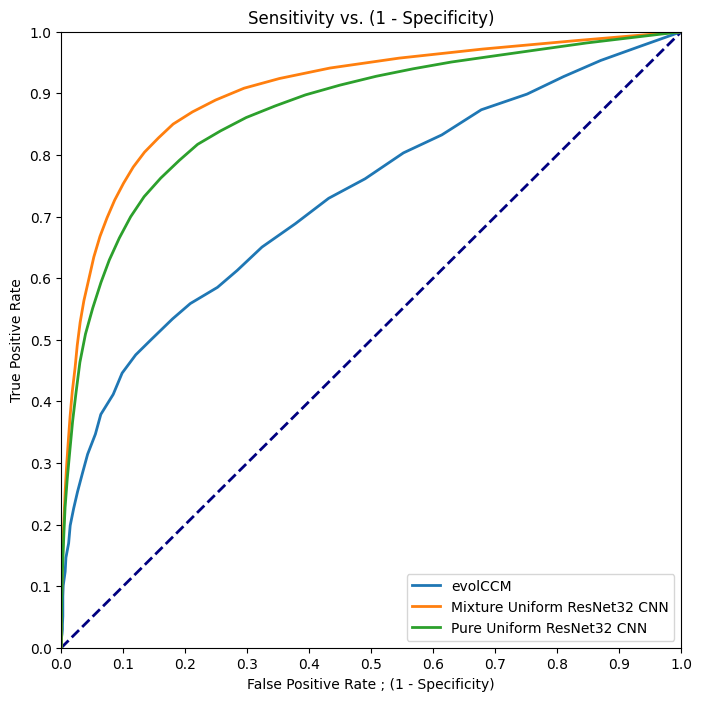

In [66]:

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.yticks(np.arange(0, 1.01, step=0.1))
plt.xticks(np.arange(0, 1.01, step=0.1))
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED
LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


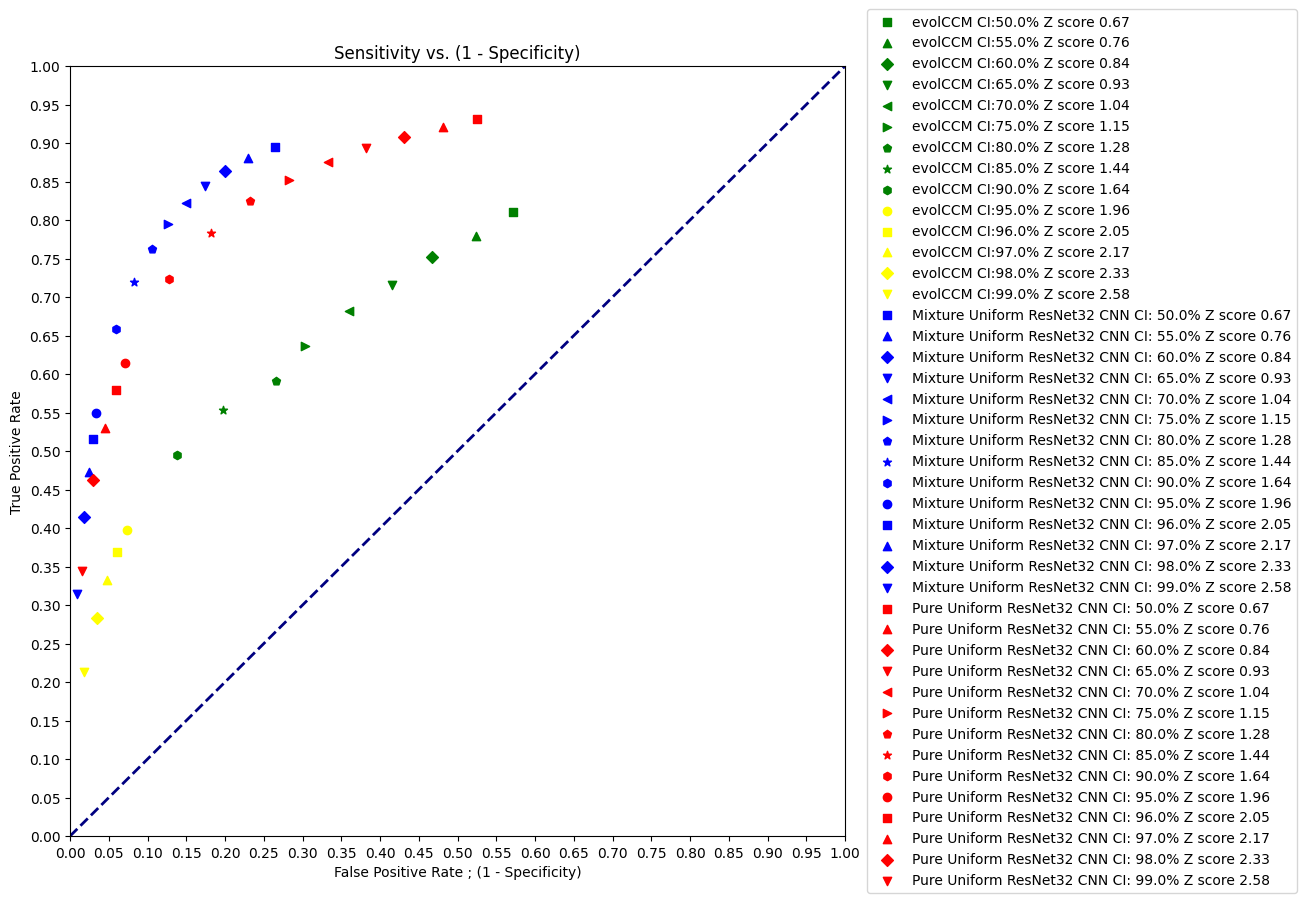

In [67]:

plt.figure(figsize=(10, 10))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]


CI_values = [0.5, 0.55,  0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
z_score = [0.674489750196082, 0.755415026360469,  0.841621233572914, 0.93458929107348, 1.03643338949379, 1.15034938037601, 1.2815515655446, 
           1.43953147093846, 1.64485362695147, 1.95996398454005, 2.05374891063182, 2.17009037758456, 
           2.32634787404084, 2.5758293035489]

# z_score = np.linspace(0, 10, 100)
# shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
# z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    shape_index += 1
    predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
    if shape_index < len(shapes):
        plt.scatter(1 - specificity, sensitivity,  color = 'green', marker = shapes[shape_index%len(shapes)], 
                    label=f'evolCCM CI:{round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}')
    else:
        plt.scatter(1 - specificity, sensitivity,  color = 'yellow', marker = shapes[shape_index%len(shapes)], 
                    label=f'evolCCM CI:{round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shape_index = 0
x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    shape_index += 1
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    plt.scatter(1 - specificity, sensitivity, color = 'blue', marker = shapes[shape_index%len(shapes)], 
                label=f'Mixture Uniform ResNet32 CNN CI: {round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}' )

# plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN {network_type.upper()}')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shape_index = 0
x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    shape_index += 1
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    plt.scatter(1 - specificity, sensitivity, color = 'red', marker = shapes[shape_index%len(shapes)], 
                label=f'Pure Uniform ResNet32 CNN CI: {round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}' )
    
# plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN {network_type.upper()}')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.yticks(np.arange(0, 1.01, step=0.05))
plt.xticks(np.arange(0, 1.01, step=0.05))

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE


STAR
TWO_TRIANGLES
FULLY_CONNECTED
LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


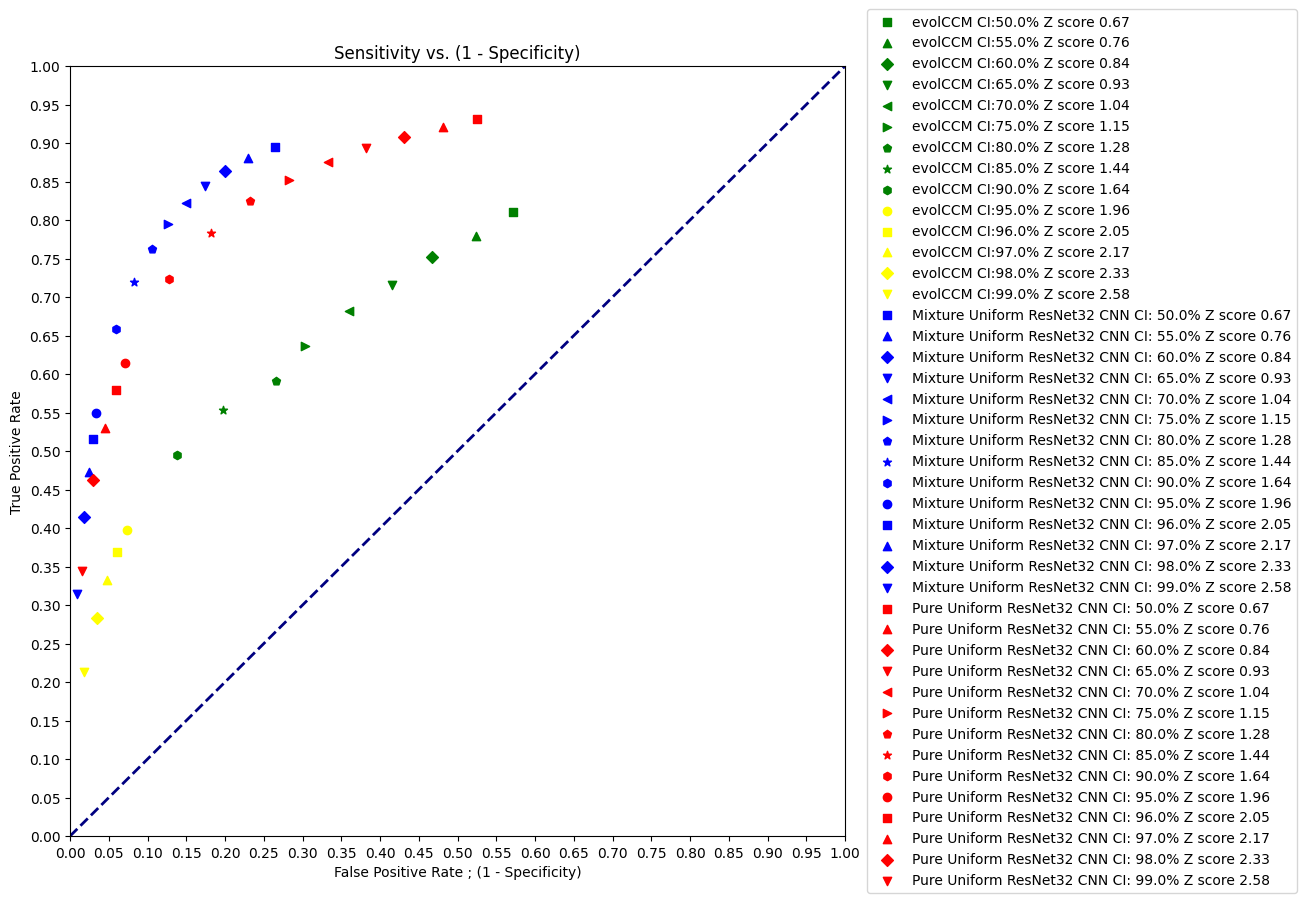

In [68]:

plt.figure(figsize=(10, 10))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]


CI_values = [0.5, 0.55,  0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99]
z_score = [0.674489750196082, 0.755415026360469,  0.841621233572914, 0.93458929107348, 1.03643338949379, 1.15034938037601, 1.2815515655446, 
           1.43953147093846, 1.64485362695147, 1.95996398454005, 2.05374891063182, 2.17009037758456, 
           2.32634787404084, 2.5758293035489]

# z_score = np.linspace(0, 10, 100)
# shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
# z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    shape_index += 1
    predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
    if shape_index < len(shapes):
        plt.scatter(1 - specificity, sensitivity,  color = 'green', marker = shapes[shape_index%len(shapes)], 
                    label=f'evolCCM CI:{round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}')
    else:
        plt.scatter(1 - specificity, sensitivity,  color = 'yellow', marker = shapes[shape_index%len(shapes)], 
                    label=f'evolCCM CI:{round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shape_index = 0
x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    shape_index += 1
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    plt.scatter(1 - specificity, sensitivity, color = 'blue', marker = shapes[shape_index%len(shapes)], 
                label=f'Mixture Uniform ResNet32 CNN CI: {round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}' )

# plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN {network_type.upper()}')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shape_index = 0
x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    shape_index += 1
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    plt.scatter(1 - specificity, sensitivity, color = 'red', marker = shapes[shape_index%len(shapes)], 
                label=f'Pure Uniform ResNet32 CNN CI: {round(CI_values[shape_index - 1] * 100,2)}% Z score {round(z_score[shape_index - 1],2)}' )
    
# plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN {network_type.upper()}')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
# plt.legend(loc='lower right')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.yticks(np.arange(0, 1.01, step=0.05))
plt.xticks(np.arange(0, 1.01, step=0.05))

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

# Draft

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


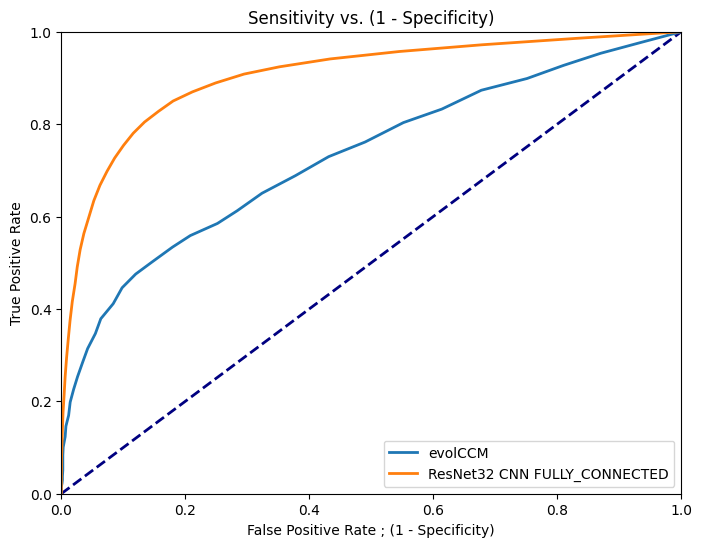

In [69]:

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')
plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED
LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


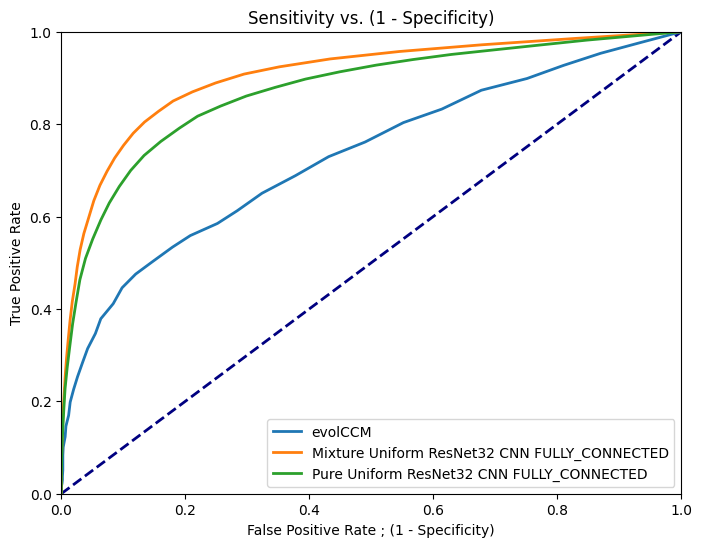

In [70]:

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, mixture_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Mixture Uniform ResNet32 CNN {network_type.upper()}')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, pure_uniform_model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
plt.plot(x_axis, y_axis, lw=2, label=f'Pure Uniform ResNet32 CNN {network_type.upper()}')
   

plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR


KeyboardInterrupt: 

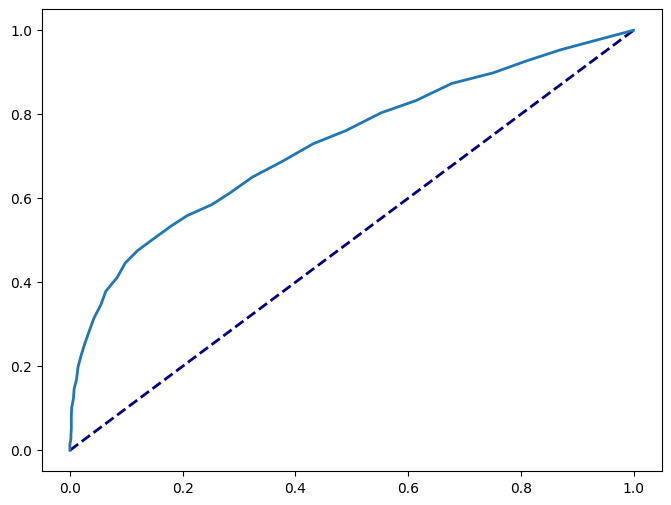

In [71]:

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(estimate_rates / (estimate_SE)) > z
    truth_edge = pd.melt(truth_rates*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
    #     plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')
plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES
FULLY_CONNECTED


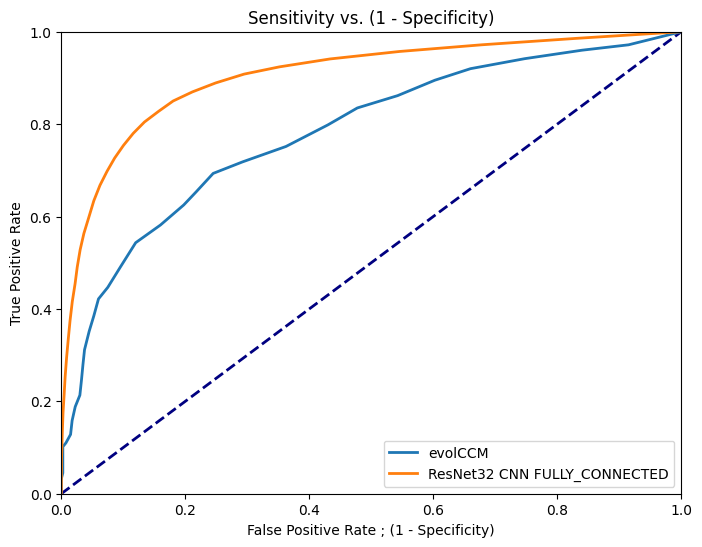

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

predictions_array = []
truth_array = []

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)
    predictions_array.append(predictions)
    truth_array.append(truth_mle)
    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
    truth_edge = pd.melt(truth_mle*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')



# evolCCM_select = network_all_types[0]
predictions_array = []
truth_array = []
for evolCCM_select in network_all_types:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    truth_array.append(truth)
# shape_index = 0

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)


x_axis = []
y_axis = []
SEs_df_mle = [0.23231547, 0.22970757, 0.23109926, 0.23222223, 0.23208608, 0.23138598, 0.23122062, 0.23031087, 0.23166709, 0.23061362]
for z in z_score:
    predictions_edge = np.abs(predictions.divide(SEs_df_mle)) > z
    truth_edge = pd.melt(truth*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)
    # print(np.round(z,2))
    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')
plt.xlabel('False Positive Rate ; (1 - Specificity)')
plt.ylabel('True Positive Rate')
plt.title(f'Sensitivity vs. (1 - Specificity)')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

LINE
STAR
TWO_TRIANGLES


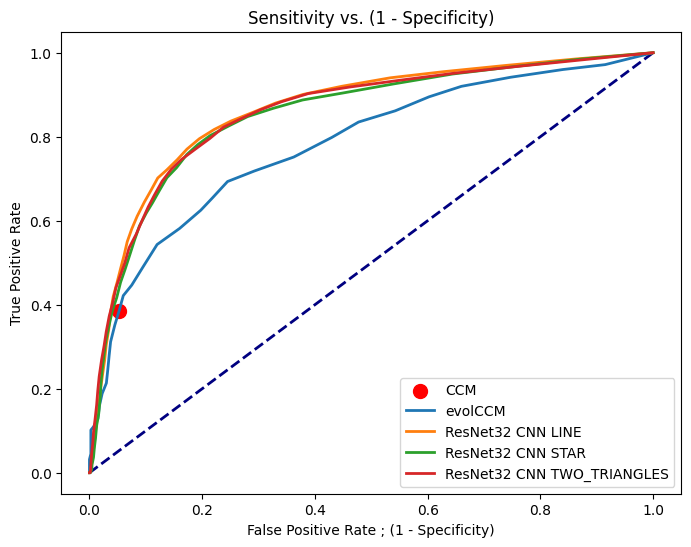

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

predictions_array = []
truth_array = []

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)
    predictions_array.append(predictions)
    truth_array.append(truth_mle)
    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
    truth_edge = pd.melt(truth_mle*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
for evolCCM_select in network_all_types[:3]:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    shape_index = 0
    x_axis = []
    y_axis = []
    SEs_df_mle = (predictions - truth).std()
    for z in z_score:
        predictions_edge = np.abs(predictions.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        # print(np.round(z,2))
        # if np.round(z,2) == 1.92:
            # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')
    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    
plt.show()

LINE
STAR
TWO_TRIANGLES


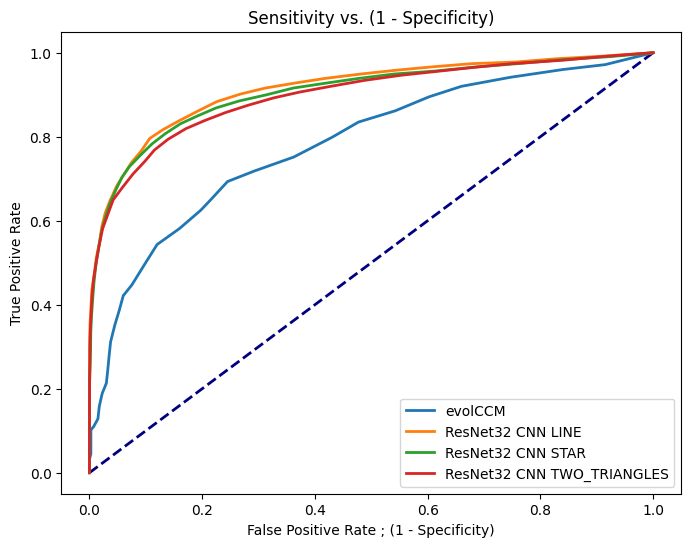

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

predictions_array = []
truth_array = []

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)
    predictions_array.append(predictions)
    truth_array.append(truth_mle)
    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc

predictions = pd.concat(predictions_array, axis = 0)
truth = pd.concat(truth_array, axis = 0)

shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


# z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0
x_axis = []
y_axis = []

for z in z_score:
    predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
    truth_edge = pd.melt(truth_mle*2)
    predictions_edge = pd.melt(predictions_edge)
    conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
    # Extract values from the confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

    # Calculate Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    x_axis.append(1 - specificity)
    y_axis.append(sensitivity)

    # if np.round(z,2) == 1.92:
        # plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
    
plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM')


# evolCCM_select = network_all_types[0]
predictions_array = []
for evolCCM_select in network_all_types[:3]:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    shape_index = 0
    x_axis = []
    y_axis = []
    SEs_df_mle = (predictions - truth).std()
    for z in z_score:
        predictions_edge = np.abs(predictions.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        # print(np.round(z,2))
        # if np.round(z,2) == 1.92:
            # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')
    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    
plt.show()

# Prediction

In [ ]:
batch_size = 8
input_shape = (1,100,200)
num_outputs = 10

In [ ]:
# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

In [28]:
draft_rates = pd.read_csv('/media/eeepc/3866FF5566FF127C/uniform_datta/uniform_random_tree_5_genes_400000_records_2024_02_12_14_29_06/rates/0_concatenated_rates.csv')

array([[<AxesSubplot:title={'center':'alpha_1'}>,
        <AxesSubplot:title={'center':'alpha_2'}>,
        <AxesSubplot:title={'center':'alpha_3'}>,
        <AxesSubplot:title={'center':'alpha_4'}>],
       [<AxesSubplot:title={'center':'alpha_5'}>,
        <AxesSubplot:title={'center':'beta_11'}>,
        <AxesSubplot:title={'center':'beta_22'}>,
        <AxesSubplot:title={'center':'beta_33'}>],
       [<AxesSubplot:title={'center':'beta_44'}>,
        <AxesSubplot:title={'center':'beta_55'}>,
        <AxesSubplot:title={'center':'beta_12'}>,
        <AxesSubplot:title={'center':'beta_13'}>],
       [<AxesSubplot:title={'center':'beta_14'}>,
        <AxesSubplot:title={'center':'beta_15'}>,
        <AxesSubplot:title={'center':'beta_23'}>,
        <AxesSubplot:title={'center':'beta_24'}>],
       [<AxesSubplot:title={'center':'beta_25'}>,
        <AxesSubplot:title={'center':'beta_34'}>,
        <AxesSubplot:title={'center':'beta_35'}>,
        <AxesSubplot:title={'center':'beta_45'

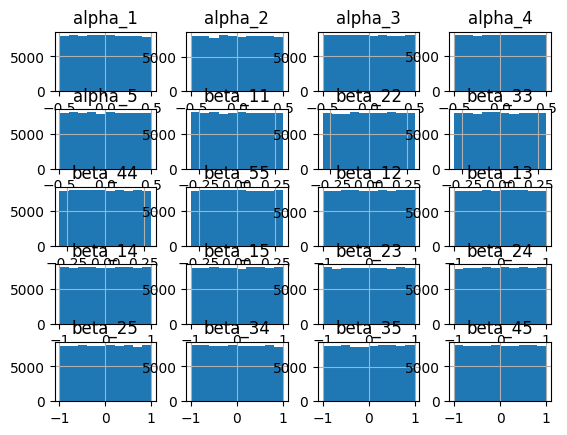

In [29]:
draft_rates.hist()

In [18]:
model_parameters={}
model_parameters['resnet18'] = ([64,128,256,512],[2,2,2,2],1,False)
model_parameters['resnet34'] = ([64,128,256,512],[3,4,6,3],1,False)
model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
model_parameters['resnet101'] = ([64,128,256,512],[3,4,23,3],4,True)
model_parameters['resnet152'] = ([64,128,256,512],[3,8,36,3],4,True)

# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

# architecture_setting = model_parameters['resnet34']

architecture_setting = model_parameters['resnet50']


# Initialize your model
# Define the path to the checkpoint file
# checkpoint_path = "./temperary_data_saver/model_checkpoints/02_12_00_08_01_duplicates_ResNet_18_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.085.pth"

# checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/mixture_uniform/model_checkpoints/02_12_01_49_31_duplicates_ResNet_34_no_dropout_1e4/batch_best_model_0.053.pth"

checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/pure_uniform_4million/model_checkpoints/02_15_15_00_07_random_sampled_pure_uniform_permutated_ResNet_34_1e3/batch_best_model_0.066.pth"


model = ResNet(architecture_setting, in_channels=1, num_classes = num_outputs)

# Load the state dictionary from the checkpoint file
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into your model
model.load_state_dict(checkpoint)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

pure_uniform_model = model 

In [20]:
model_parameters={}
model_parameters['resnet18'] = ([64,128,256,512],[2,2,2,2],1,False)
model_parameters['resnet34'] = ([64,128,256,512],[3,4,6,3],1,False)
model_parameters['resnet50'] = ([64,128,256,512],[3,4,6,3],4,True)
model_parameters['resnet101'] = ([64,128,256,512],[3,4,23,3],4,True)
model_parameters['resnet152'] = ([64,128,256,512],[3,8,36,3],4,True)

# checkpoint_path = '/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/model_checkpoints/02_11_18_51_12_duplicates_CNN_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.066.pth'
# model = RegressionCNN(input_shape, num_outputs)

architecture_setting = model_parameters['resnet34']

# architecture_setting = model_parameters['resnet50']


# Initialize your model
# Define the path to the checkpoint file
# checkpoint_path = "./temperary_data_saver/model_checkpoints/02_12_00_08_01_duplicates_ResNet_18_2_Million_10_epochs_1_batch_no_dropout/batch_best_model_0.085.pth"

checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/mixture_uniform/model_checkpoints/02_12_01_49_31_duplicates_ResNet_34_no_dropout_1e4/batch_best_model_0.053.pth"

# checkpoint_path = "/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/pure_uniform_4million/model_checkpoints/02_15_15_00_07_random_sampled_pure_uniform_permutated_ResNet_34_1e3/batch_best_model_0.066.pth"


model = ResNet(architecture_setting, in_channels=1, num_classes = num_outputs)

# Load the state dictionary from the checkpoint file
checkpoint = torch.load(checkpoint_path)

# Load the state dictionary into your model
model.load_state_dict(checkpoint)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

mixture_uniform_model = model

In [32]:

network_type = 'star'
print(network_type.upper())
# X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_profile_image.npy')
X_test = X_test[:, None, :, :]
y_test = pd.read_csv(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_rates_data.csv')
# print(y_test.value_counts())
y_test = y_test.iloc[:, 10:].values

test_dataset = RegressionDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

prediction_list = []
truth_list = []

test_loss = 0

model.eval()
with torch.no_grad():
    for test_inputs, test_targets in test_dataloader:
        # Transfer validation data to GPU
        test_inputs = test_inputs.to(device)
        prediction_tf = model.forward(test_inputs)
        test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
        predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
        prediction_list.append(predictions)
        truth_list.append(pd.DataFrame(test_targets.numpy()))
        

predictions = pd.concat(prediction_list, axis=0)
truth = pd.concat(truth_list, axis=0)
print((predictions.values - truth.values).mean())

STAR
-0.01525388


In [51]:
# network_type = 'star'
# print(network_type.upper())
# # X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
# X_test = np.load(f'/home/eeepc/Documents/random_tree/code_base/temperary_data_saver/mixture_uniform/29_random_tree_gene_image.npy')

# X_test = X_test[:, None, :, :]
# y_test = pd.read_csv(f'/media/eeepc/3866FF5566FF127C/random_tree_data/random_tree_5_genes_2400000_records_2024_02_10_23_29_40/rates/29_concatenated_rates.csv')
# # print(y_test.value_counts())
# y_test = y_test.iloc[:, 10:].values 



In [43]:
# test_dataset = RegressionDataset(X_test, y_test)
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# prediction_list = []
# truth_list = []

# test_loss = 0

# model.eval()
# with torch.no_grad():
#     for test_inputs, test_targets in test_dataloader:
#         # Transfer validation data to GPU
#         test_inputs = test_inputs.to(device)
#         prediction_tf = model.forward(test_inputs)
#         test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
#         predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
#         prediction_list.append(predictions)
#         truth_list.append(pd.DataFrame(test_targets.numpy()))
        

# predictions = pd.concat(prediction_list, axis=0)
# # predictions.columns = table_columns
# truth = pd.concat(truth_list, axis=0)

# print((predictions.values - truth.values).mean())

0.0033301667


In [44]:
# pd.DataFrame(predictions.values - truth.values).std()

0    0.239034
1    0.236076
2    0.237289
3    0.238606
4    0.237354
5    0.237692
6    0.236713
7    0.236332
8    0.239271
9    0.236391
dtype: float32

In [9]:
def get_network_result(select_type, model, device, criterion, table_columns, batch_size=8):
    network_type = select_type
    print(network_type.upper())
    # X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/permutated_gene_image_{network_type}.npy')
    X_test = np.load(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_profile_image.npy')
    X_test = X_test[:, None, :, :]
    y_test = pd.read_csv(f'/home/eeepc/Documents/image_genes/test_data/{network_type}_rates_data.csv')
    # print(y_test.value_counts())
    y_test = y_test.iloc[:, 10:].values

    

    test_dataset = RegressionDataset(X_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

    prediction_list = []
    truth_list = []

    test_loss = 0

    model.eval()
    with torch.no_grad():
        for test_inputs, test_targets in test_dataloader:
            # Transfer validation data to GPU
            test_inputs = test_inputs.to(device)
            prediction_tf = model.forward(test_inputs)
            test_loss += criterion(prediction_tf.detach().cpu(), test_targets).item()
            predictions = pd.DataFrame(prediction_tf.detach().cpu().numpy())
            prediction_list.append(predictions)
            truth_list.append(pd.DataFrame(test_targets.numpy()))
            

    predictions = pd.concat(prediction_list, axis=0)
    predictions.columns = table_columns
    truth = pd.concat(truth_list, axis=0)
    truth.columns = table_columns

    return predictions, truth, network_type



def get_CI_predictions(select_type, predictions, truth, SEs, z_score, index):    
    print(f'{predictions.columns[index]}' , end = ' : ')
    # print(f'SEs {SEs}')
    # print(f'Z score {z_score}')
    CI_values = z_score * SEs
    # print(f'CI {round(CI_values.iloc[:, index],2)}')
    predict_p = (np.abs(predictions - truth).iloc[:, index] < CI_values.iloc[:, index].values.item())
    return predict_p


def get_compare_result(evolCCM_select, models, models_name, device, criterion, table_columns, batch_size):
    directory ='/home/eeepc/Documents/image_genes/'
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = [0.4040456, 0.4531348, 0.4104203, 0.3955997, 0.4090854, 0.4456595, 0.4339634, 0.4251135, 0.4557958, 0.4352029]

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']

    plt.figure(figsize=(8, 6))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


    for model_id, model in enumerate(models):
        predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
        shape_index = 0
        x_axis = []
        y_axis = []

        # SEs_df_mle = (predictions - truth.iloc[:100,]).std()

        for z in z_score:
            predictions_edge = np.abs(predictions / 0.23) > z
            truth_edge = pd.melt(truth*2)
            predictions_edge = pd.melt(predictions_edge)
            conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
            # Extract values from the confusion matrix
            TN, FP, FN, TP = conf_matrix.ravel()

            # Calculate sensitivity and specificity
            sensitivity = TP / (TP + FN)
            specificity = TN / (TN + FP)
            # Calculate ROC curve
            fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

            # Calculate Area Under the Curve (AUC)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            x_axis.append(1 - specificity)
            y_axis.append(sensitivity)

        plt.plot(x_axis, y_axis, lw=2, label=f'{models_name[model_id]} CNN {network_type.upper()}')


    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'{evolCCM_select.upper()} Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    plt.show()

    # print(x_axis)
    return x_axis, y_axis
    

In [10]:

table_columns = ['beta_12', 'beta_13', 'beta_14', 'beta_15', 'beta_23', 'beta_24', 'beta_25', 'beta_34', 'beta_35', 'beta_45']
network_all_types = ['line', 'star', 'two_triangles', 'fully_connected']
# network_all_types[:3]
# batch_size = 64

['line', 'star', 'two_triangles']

LINE
0.0
0.1
0.2
0.3
0.4
0.51
0.61
0.71
0.81
0.91
1.01
1.11
1.21
1.31
1.41
1.52
1.62
1.72
1.82
1.92
2.02
2.12
2.22
2.32
2.42
2.53
2.63
2.73
2.83
2.93
3.03
3.13
3.23
3.33
3.43
3.54
3.64
3.74
3.84
3.94
4.04
4.14
4.24
4.34
4.44
4.55
4.65
4.75
4.85
4.95
5.05
5.15
5.25
5.35
5.45
5.56
5.66
5.76
5.86
5.96
6.06
6.16
6.26
6.36
6.46
6.57
6.67
6.77
6.87
6.97
7.07
7.17
7.27
7.37
7.47
7.58
7.68
7.78
7.88
7.98
8.08
8.18
8.28
8.38
8.48
8.59
8.69
8.79
8.89
8.99
9.09
9.19
9.29
9.39
9.49
9.6
9.7
9.8
9.9
10.0
STAR
0.0
0.1
0.2
0.3
0.4
0.51
0.61
0.71
0.81
0.91
1.01
1.11
1.21
1.31
1.41
1.52
1.62
1.72
1.82
1.92
2.02
2.12
2.22
2.32
2.42
2.53
2.63
2.73
2.83
2.93
3.03
3.13
3.23
3.33
3.43
3.54
3.64
3.74
3.84
3.94
4.04
4.14
4.24
4.34
4.44
4.55
4.65
4.75
4.85
4.95
5.05
5.15
5.25
5.35
5.45
5.56
5.66
5.76
5.86
5.96
6.06
6.16
6.26
6.36
6.46
6.57
6.67
6.77
6.87
6.97
7.07
7.17
7.27
7.37
7.47
7.58
7.68
7.78
7.88
7.98
8.08
8.18
8.28
8.38
8.48
8.59
8.69
8.79
8.89
8.99
9.09
9.19
9.29
9.39
9.49
9.6
9.7
9.8
9.9
10.0
TWO_TRIA

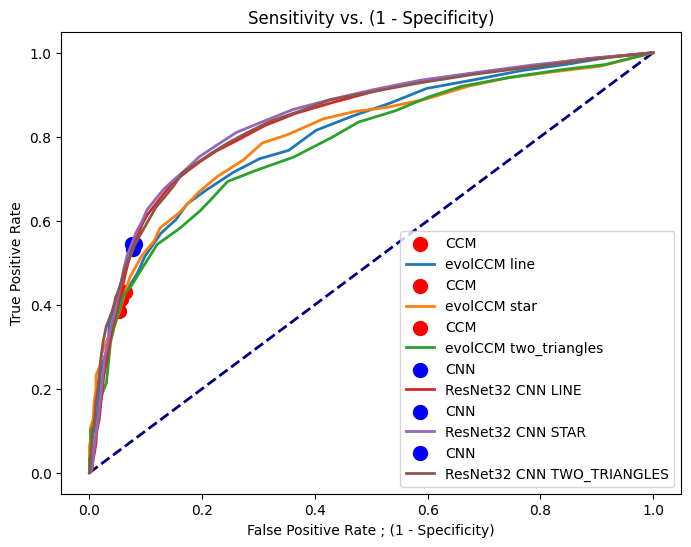

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


    # z_score = [1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)

        if np.round(z,2) == 1.92:
            plt.scatter(1 - specificity, sensitivity, color = 'red', label = 'CCM', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


# evolCCM_select = network_all_types[0]
predictions_array = []
for evolCCM_select in network_all_types[:3]:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    shape_index = 0
    x_axis = []
    y_axis = []
    SEs_df_mle = (predictions - truth).std()
    for z in z_score:
        predictions_edge = np.abs(predictions.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        # print(np.round(z,2))
        # if np.round(z,2) == 1.92:
            # plt.scatter(1 - specificity, sensitivity, color = 'blue',label = 'CNN', s=100)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')
    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    
plt.show()

LINE
STAR
TWO_TRIANGLES


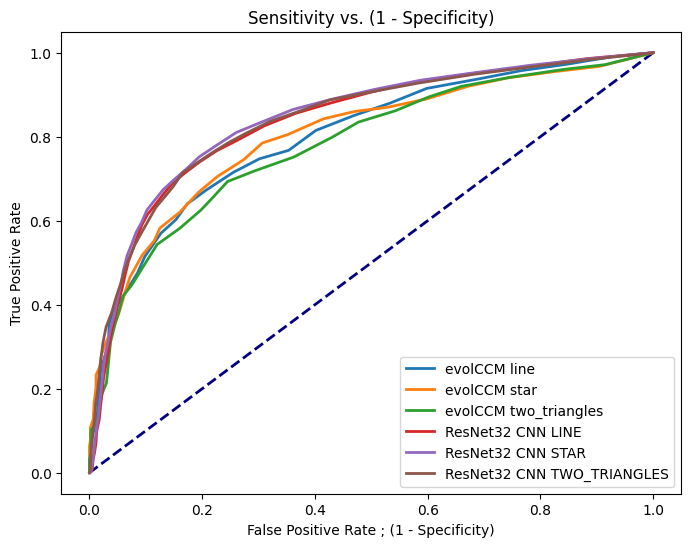

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

plt.figure(figsize=(8, 6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
z_score = np.linspace(0, 10, 100)
shape_index = 0

directory ='/home/eeepc/Documents/image_genes/'

for evolCCM_select in network_all_types[:3]:
    if evolCCM_select == 'star':
        star_mle = pd.read_csv(f"{directory}MLE_Method/star/predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'two_triangles':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/two_triangles_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]
    elif evolCCM_select == 'line':
        star_mle = pd.read_csv("/home/eeepc/Documents/image_genes/MLE_Method/line_predicted_data.csv")
        star_mle = star_mle.iloc[:, -10:]
        y_test = pd.read_csv(f'{directory}/test_data/{evolCCM_select}_rates_data.csv').iloc[:, 10:]

    predictions = star_mle
    truth_mle = pd.DataFrame(y_test.iloc[:100,], columns = predictions.columns)

    SEs_df_mle = (star_mle - y_test.iloc[:100,]).std()
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import roc_curve, auc


    shapes = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']


    # z_score = [0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.036, 1.150, 1.282, 1.440, 1.645, 1.96, 2.23,10]
    z_score = np.linspace(0, 10, 100)
    shape_index = 0
    x_axis = []
    y_axis = []

    for z in z_score:
        predictions_edge = np.abs(star_mle.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth_mle*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)
        
    plt.plot(x_axis, y_axis, lw=2, label=f'evolCCM {evolCCM_select}')


evolCCM_select = network_all_types[0]
predictions_array = []
for evolCCM_select in network_all_types[:3]:
    predictions, truth, network_type = get_network_result(evolCCM_select, model, device, criterion, table_columns, batch_size)
    predictions_array.append(predictions)
    shape_index = 0
    x_axis = []
    y_axis = []
    SEs_df_mle = (predictions - truth).std()
    for z in z_score:
        predictions_edge = np.abs(predictions.divide(SEs_df_mle.values)) > z
        truth_edge = pd.melt(truth*2)
        predictions_edge = pd.melt(predictions_edge)
        conf_matrix = confusion_matrix(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])
        # Extract values from the confusion matrix
        TN, FP, FN, TP = conf_matrix.ravel()

        # Calculate sensitivity and specificity
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(truth_edge.iloc[:, 1], predictions_edge.iloc[:, 1])

        # Calculate Area Under the Curve (AUC)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        x_axis.append(1 - specificity)
        y_axis.append(sensitivity)

    plt.plot(x_axis, y_axis, lw=2, label=f'ResNet32 CNN {network_type.upper()}')


    plt.xlabel('False Positive Rate ; (1 - Specificity)')
    plt.ylabel('True Positive Rate')
    plt.title(f'Sensitivity vs. (1 - Specificity)')
    plt.legend(loc='lower right')
    
plt.show()

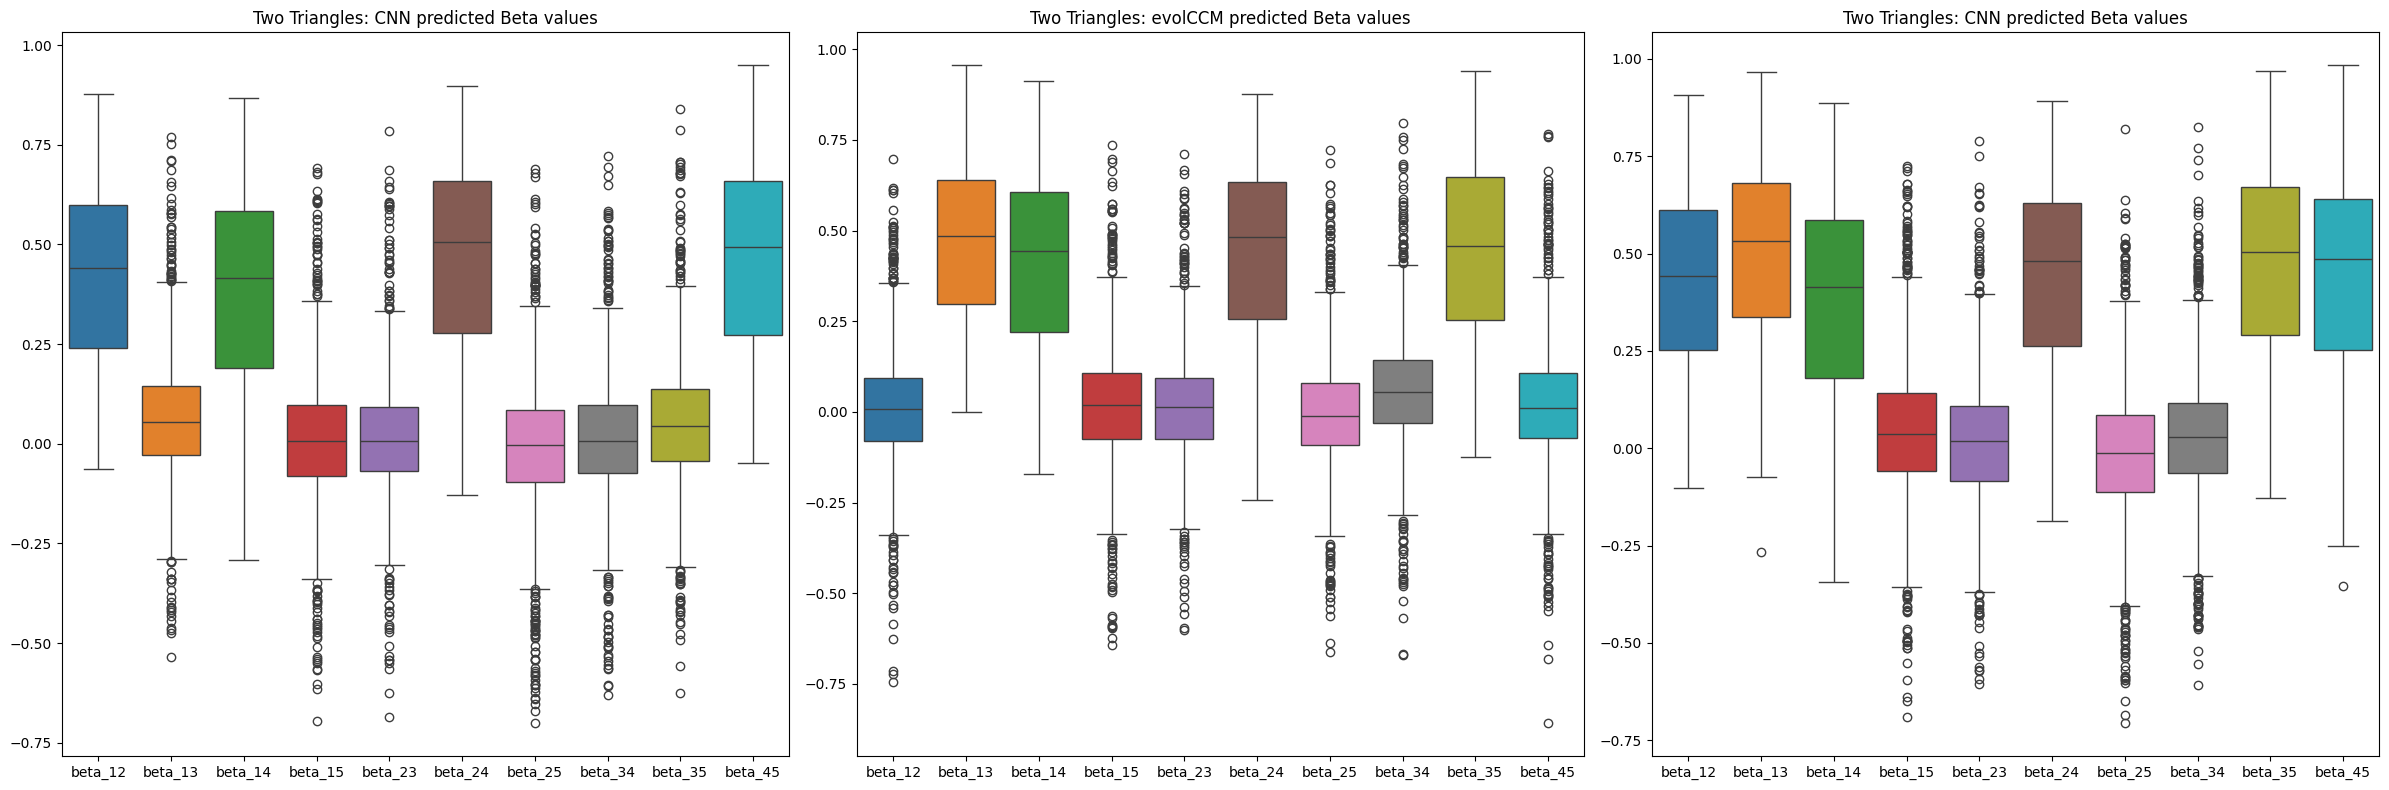

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)

# Plot the second boxplot in the second subplot
sns.boxplot(predictions_array[1], ax=axes[1])
axes[1].set_title('Two Triangles: evolCCM predicted Beta values')

# Plot the first boxplot in the first subplot
sns.boxplot(predictions_array[0], ax=axes[0])
axes[0].set_title('Two Triangles: CNN predicted Beta values')

sns.boxplot(predictions_array[2], ax=axes[2])
axes[2].set_title('Two Triangles: CNN predicted Beta values')
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


STAR


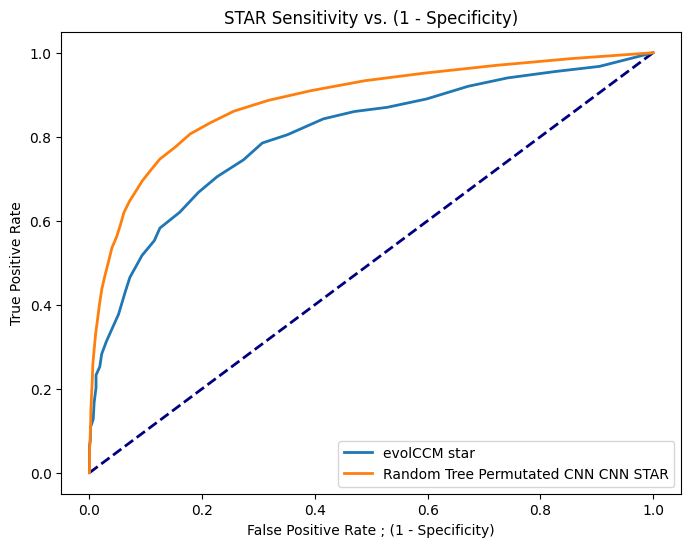

In [51]:
network_types = ['line', 'two_triangles', 'star', 'fully_connected']
evolCCM_select = network_types[2]
star_x_axis, star_y_axis = get_compare_result(evolCCM_select, [model], ['Random Tree Permutated CNN'],  device, criterion, table_columns, batch_size)

TWO_TRIANGLES


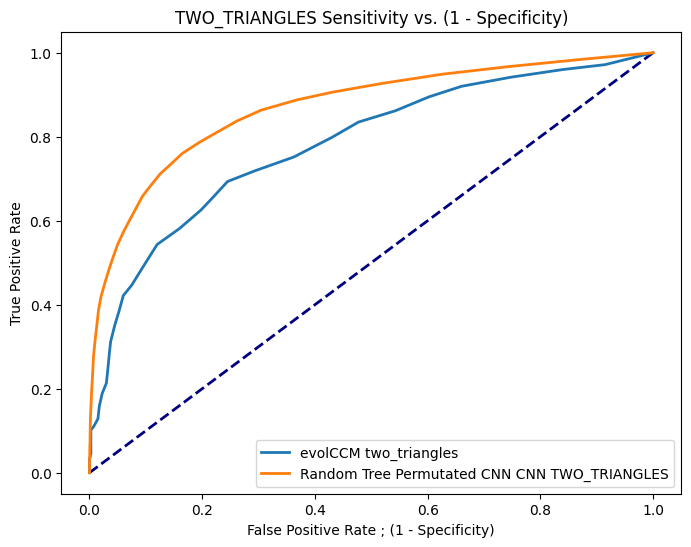

In [52]:
network_types = ['line', 'two_triangles', 'star', 'fully_connected']
evolCCM_select = network_types[1]
star_x_axis, star_y_axis = get_compare_result(evolCCM_select, [model], ['Random Tree Permutated CNN'], device, criterion, table_columns, batch_size)

LINE


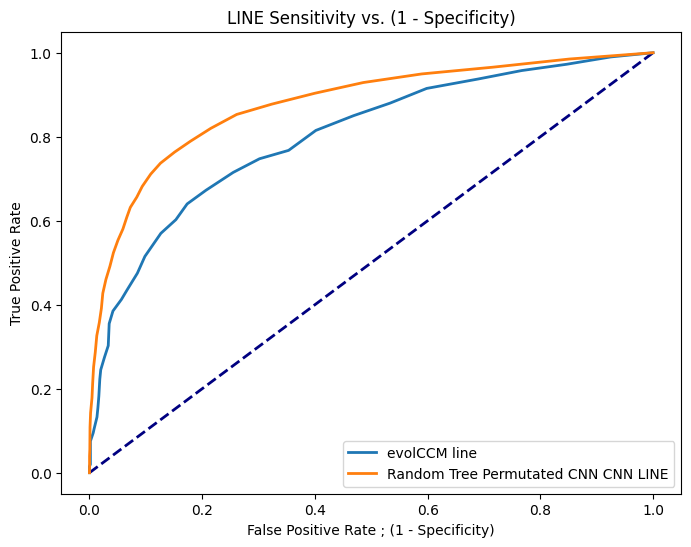

In [53]:
network_types = ['line', 'two_triangles', 'star', 'fully_connected']
evolCCM_select = network_types[0]
star_x_axis, star_y_axis = get_compare_result(evolCCM_select, [model], ['Random Tree Permutated CNN'], device, criterion, table_columns, batch_size)